<div style="display: flex; background-color: #196f3d;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Consumption Requirements of Seattle Building - P4</h1>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Cleaning notebook |</h3>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 30px 30px 0px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Baptiste LEDESERT</h4>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 0px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [249]:
import io
import gc
import ast
import datetime
import itertools
import operator
import math
from math import prod
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
import folium
import folium.plugins
import haversine as hs
from haversine import Unit


from statsmodels.graphics.gofplots import qqplot

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

from functions_BL import *

%matplotlib inline
sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Constants declaration</h3>
</div>

In [250]:
map_seattle_enable = True

In [251]:
map_seattle_enable

True

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.3. Functions declaration</h3>
</div>

In [252]:
# from functions_BL import df_analysis

In [253]:
# def df_analysis(df, name_df, *args, **kwargs):
#     """
#     Method used to analyze on the DataFrame.

#     Parameters:
#     -----------------
#         df (pandas.DataFrame): Dataset to analyze
#         name_df (str): Dataset name
        
#         *args, **kwargs:
#         -----------------
#             columns (list): Dataframe keys in list format
#             flag (str): Flag to show complete information about the dataset to analyse
#                         "complete" shows all information about the dataset

#     Returns:
#     -----------------
#         None. 
#         Print the analysis on the Dataset. 
#     """
    
#     # Getting the variables
#     columns = kwargs.get("columns", None)
#     type_analysis = kwargs.get("type_analysis", None)
    
#     ORDERING_COMPLETE = [
#         "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
#     ]
    
#     # Calculating the memory usage based on dataframe.info()
#     buf = io.StringIO()
#     df.info(buf=buf)
#     memory_usage = buf.getvalue().split('\n')[-2]
    
#     if df.empty:
#         print("The", name_df, "dataset is empty. Please verify the file.")
#     else:
#         empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
#         df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
#         # Creating a dataset based on Type object and records by columns
#         type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
#         df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
#         df_resume["records"] = list(df.count())
#         df_resume["# NaN"] = list(df.isnull().sum())
#         df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
#         print("\nAnalysis of", name_df, "dataset")
#         print("--------------------------------------------------------------------")
#         print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
#         print("- Total of NaN values:           ", df.isna().sum().sum())
#         print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
#         print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
#         print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
#                     print("- Total of empty rows:            0")
#         print("- Total of empty columns:        ", len(empty_cols))
#         print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
#                     print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
#         print("- Unique indexes:                ", df.index.is_unique)
        
#         if columns is not None:
#             print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
#                 print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
#         if type_analysis == "summarized":
#             print("\n")
        
#         if type_analysis is None or type_analysis != "summarized":
#             pd.set_option("display.max_rows", None) # show full of showing rows
#             pd.set_option("display.max_columns", None) # show full of showing cols
#             pd.set_option("display.max_colwidth", None) # show full width of showing cols
#             pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
#             if type_analysis is None or type_analysis != "complete":
#                 print("\n- Type object and records by columns      (",memory_usage,")")
#                 print("--------------------------------------------------------------------")
#             elif type_analysis == "complete":
#                 df_resume["unique"] = list(df.nunique())
#                 df_desc = pd.DataFrame(df.describe().T).reset_index()
#                 df_desc = df_desc.rename(columns={"index": "name"})
#                 df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
#                 df_resume = df_resume[ORDERING_COMPLETE]
#                 print("\n- Type object and records by columns      (",memory_usage,")")
#                 print("--------------------------------------------------------------------")
                
#             display(df_resume.sort_values("records", ascending=False))
            
#             pd.reset_option("display.max_rows") # reset max of showing rows
#             pd.reset_option("display.max_columns") # reset max of showing cols
#             pd.reset_option("display.max_colwidth") # reset width of showing cols
#             pd.reset_option("display.float_format") # reset show full content in cell
            
#         # deleting dataframe to free memory
#         if type_analysis == "complete":
#             del [[df_resume, df_desc]]
#             gc.collect()
#             df_resume, df_desc = (pd.DataFrame() for i in range(2))
#         else:
#             del df_resume
#             gc.collect()
#             df_resume = pd.DataFrame()


# def comparing_columns_df():
#     """
#     Method used to identify columns that do not match between datasets

#     Returns:
#     -----------------
#         df (pandas.DataFrame): Dataframe with columns that do not match
#     """

#     LIST_COL, LIST_ORIGIN = ([] for i in range(2))

#     for col in data_2015.columns:
#         if col not in list(data_2016.columns):
#             LIST_COL.append(col)
#             LIST_ORIGIN.append("data_2015")

#     for col in data_2016.columns:
#         if col not in list(data_2015.columns):
#             LIST_COL.append(col)
#             LIST_ORIGIN.append("data_2016")

#     df = pd.DataFrame({
#         "column": LIST_COL,
#         "origin": LIST_ORIGIN
#     })
    
#     display(df.sort_values("column"))
    
#     return df


# def types_different():
#     """
#     Method used to identify the same columns with different dtypes

#     Returns:
#     -----------------
#         None. 
#         Print the tests on a new Dataset. 
#     """
    
#     COLS_2015, COLS_2016, LIST_COL_DIFFERENT, LIST_DTYPE_2015, LIST_DTYPE_2016 = [[] for i in range(5)]
    
#     for col in data_2015.columns:
#         if col not in list(df_columns_not_matches.loc[df_columns_not_matches["origin"]=="data_2015", "column"]):         
#             COLS_2015.append(col)
#     for col in data_2016.columns:
#         if col not in list(df_columns_not_matches.loc[df_columns_not_matches["origin"]=="data_2016", "column"]):
#             COLS_2016.append(col)
    
#     for col_2015, col_2016 in zip(COLS_2015, COLS_2016):
#         if data_2015[col_2015].dtype != data_2016[col_2016].dtype:
#             LIST_COL_DIFFERENT.append(col_2015)
#             LIST_DTYPE_2015.append(str(data_2015[col_2015].dtype))
#             LIST_DTYPE_2016.append(str(data_2016[col_2016].dtype))
            
#     df_types_different = pd.DataFrame({
#                             "column": LIST_COL_DIFFERENT,
#                             "2015": LIST_DTYPE_2015,
#                             "2016": LIST_DTYPE_2016
#                         })
    
#     return display(df_types_different.sort_values("column"))
            
            
def normality_test(df):
    """
    Method used to make the normality test.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze

    Returns:
    -----------------
        None. 
        Print the tests on a new Dataset. 
    """
    
    list_test = {
        "Shapiro-Wilk":stats.shapiro, "D’Agostino’s K^2":stats.normaltest,
        "Kolmogorov-Smirnov":stats.kstest
    }
    
    
    alpha = 0.05
    fail_to_reject_H = "Sample looks Gaussian (fail to reject H0)"
    reject_H = "Sample does not look Gaussian (reject H0)"
    
    variable, test_name, result, hypothesis = [[] for i in range(4)]
    
    for key, value in list_test.items():
    
        for col in df.columns:
            
            if df[col].dtypes == "float64" or df[col].dtypes == "int64":
                variable.append(col)
                test_name.append(key)
                
                if key == "Kolmogorov-Smirnov":
                    stat, p_value = value(df[col], cdf="norm")
                else:
                    stat, p_value = value(df[col])
                    
                result.append("Statistics=%.3f, p-value=%.3f" % (stat, p_value))
                hypothesis.append(fail_to_reject_H.translate(SUB)) if p_value > alpha else hypothesis.append(reject_H.translate(SUB))
                
    df_normality_test = pd.DataFrame({
                            "variable": variable,
                            "normality test": test_name, 
                            "result": result,
                            "hypothesis": hypothesis})
    
    display(df_normality_test)
    

class GroupImputer(BaseEstimator, TransformerMixin):
    """ 
    Class used for imputing missing values in a pd.DataFrame using either mean or median of a group.
    
    Parameters:
    -----------------  
        group_cols (list) : List of columns used for calculating the aggregated value 
        strategy (str) : The strategy to be used for remplacement, can be one of ["mean", "median", "mode"]
        
    Returns:
    -----------------
        X (array-like) : The array with imputed values in the target column
   """    
    
    def __init__(self, group_cols, target, strategy="mean"):
        
        assert strategy in ["mean", "median"], "Unrecognized value for metric, should be mean/median"
        assert type(group_cols) == list, "group_cols should be a list of columns"
        assert type(target) == list, "target should be a string"
        
        self.group_cols = group_cols
        self.target = target
        self.strategy = strategy
    
    def fit(self, X, y=None):
        
        assert pd.isnull(X[self.group_cols]).any(axis=None) == False, "There are missing values in group_cols"
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.strategy) \
                                                            .reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, "impute_map_")
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
        return X.values
    

def highlight_max(data, color="yellow"):
    """ 
    highlight the maximum in a Series or DataFrame
    
    Parameters:
    -----------------  
        data (pandas.DataFrame): Dataset to analyze
        color (str) : color to highlight into the dataset
        
    Returns:
    -----------------
        data (pandas.DataFrame): Dataset analyzed
   """  
    
    #attr = 'background-color: {}'.format(color) + 'color: black'
    attr = "background-color: yellow; color: black"
    
    #remove % and cast to float
    data = data.replace("%","", regex=True).astype(float)
    
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else "" for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        
        return pd.DataFrame(np.where(is_max, attr, ""),
                            index=data.index, columns=data.columns)

    
def df_imputations(training_df, test_df, imputation, scaler):
    """
    Method used for making imputations ("SimpleImputer", "KNNImputer", ""IterativeImputer"")

    Parameters:
    -----------------
        training_df : pandas.DataFrame
        Training dataset.
        
        test_df : pandas.DataFrame
        Dataset to impute.
        
        imputation : str
        Imputation's method.
        
        scaler : obj
        Object StandardScaler().
        
    Returns:
    -----------------
        df_to_impute : pandas.DataFrame
        Dataset imputed.
        
    """
    
    # Initializing the imputer
    if imputation == "SimpleImputer":
        impute = SimpleImputer(missing_values=np.nan, strategy="mean")
    elif imputation == "KNNImputer":
        impute = KNNImputer()
    elif imputation == "IterativeImputer":
        impute = IterativeImputer(estimator=BayesianRidge(), 
                                  imputation_order="ascending", 
                                  initial_strategy="mean")
        
    # Making the imputation fit() in train set
    impute.fit(training_df)
    
    # Making the imputation transform() in test set
    temp_imputed = impute.transform(test_df)
    
    # Rebuilding the dataset as original 
    df_imputed = pd.DataFrame(temp_imputed, index=test_df.index, columns=test_df.columns)
    
    # Desnormalizing and formatting data to DataFrame
    df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), index=df_imputed.index, columns=df_imputed.columns)
    
    return df_imputed

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

In [254]:
data = pd.read_csv('Dataset/2016_Building_Energy_Benchmarking.csv', sep=',')  #, dtype = dict_type_import)


In [255]:
# # data_2015 = pd.read_csv(r"Dataset\2015-building-energy-benchmarking.csv")
# data_2016 = pd.read_csv('Dataset/2016_Building_Energy_Benchmarking.csv', sep=',')

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Initial analysis</h3>
</div>

<div class="alert alert-block alert-info">
Making <b>the initial analysis</b>
</div>

In [256]:
df_analysis(data, "data")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  3376 rows and 46 columns
- Total of NaN values:            19952
- Percentage of NaN:              12.85 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         1
  + The empty column is:          ['Comments']
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 1.2+ MB )
--------------------------------------------------------------------


name     type  records  # NaN     % NaN
0                     OSEBuildingID    int64     3376      0   0.00000
11                     Neighborhood   object     3376      0   0.00000
1                          DataYear    int64     3376      0   0.00000
40                      DefaultData     bool     3376      0   0.00000
42                 ComplianceStatus   object     3376      0   0.00000
19           PropertyGFABuilding(s)    int64     3376      0   0.00000
18               PropertyGFAParking    int64     3376      0   0.00000
17                 PropertyGFATotal    int64     3376      0   0.00000
14                        YearBuilt    int64     3376      0   0.00000
13                        Longitude  float64     3376      0   0.00000
12                         Latitude  float64     3376      0   0.00000
16                   NumberofFloors    int64     3376      0   0.00000
10              CouncilDistrictCode    int64     3376      0   0.00000
4                      PropertyName   object     3376      0   0.00000
2                      BuildingType   object     3376      0   0.00000
9     TaxParcelIdentificationNumber   object     3376      0   0.00000
3               PrimaryPropertyType   object     3376      0   0.00000
7                             State   object     3376      0   0.00000
6                              City   object     3376      0   0.00000
5                           Address   object     3376      0   0.00000
33              SiteEnergyUse(kBtu)  float64     3371      5   0.15000
34            SiteEnergyUseWN(kBtu)  float64     3370      6   0.18000
30               SiteEUIWN(kBtu/sf)  float64     3370      6   0.18000
29                 SiteEUI(kBtu/sf)  float64     3369      7   0.21000
15                NumberofBuildings  float64     3368      8   0.24000
32             SourceEUIWN(kBtu/sf)  float64     3367      9   0.27000
44                TotalGHGEmissions  float64     3367      9   0.27000
38               NaturalGas(therms)  float64     3367      9   0.27000
37                Electricity(kBtu)  float64     3367      9   0.27000
36                 Electricity(kWh)  float64     3367      9   0.27000
35                   SteamUse(kBtu)  float64     3367      9   0.27000
39                 NaturalGas(kBtu)  float64     3367      9   0.27000
45            GHGEmissionsIntensity  float64     3367      9   0.27000
31               SourceEUI(kBtu/sf)  float64     3367      9   0.27000
20        ListOfAllPropertyUseTypes   object     3367      9   0.27000
8                           ZipCode  float64     3360     16   0.47000
22        LargestPropertyUseTypeGFA  float64     3356     20   0.59000
21           LargestPropertyUseType   object     3356     20   0.59000
28                  ENERGYSTARScore  float64     2533    843  24.97000
24  SecondLargestPropertyUseTypeGFA  float64     1679   1697  50.27000
23     SecondLargestPropertyUseType   object     1679   1697  50.27000
26   ThirdLargestPropertyUseTypeGFA  float64      596   2780  82.35000
25      ThirdLargestPropertyUseType   object      596   2780  82.35000
27         YearsENERGYSTARCertified   object      119   3257  96.48000
43                          Outlier   object       32   3344  99.05000
41                         Comments  float64        0   3376 100.00000

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Cleaning</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Identifying and formatting categorical columns</h3>
</div>

<div class="alert alert-block alert-info">
    <b>First of all</b>, we are going to concat both dataset to easily work with all data
</div>

In [257]:
df_temp = data.copy().reset_index(drop=True)
df_temp.drop(columns=["State", "City", "Comments"],inplace=True,  axis=1)

In [258]:
df_temp.shape

(3376, 43)

<div class="alert alert-block alert-info">
    List of <b>categorical</b> columns
</div>

In [259]:
list(set(df_temp.columns) - set(df_temp._get_numeric_data()))

['TaxParcelIdentificationNumber',
 'Address',
 'YearsENERGYSTARCertified',
 'ListOfAllPropertyUseTypes',
 'Neighborhood',
 'BuildingType',
 'PropertyName',
 'LargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'PrimaryPropertyType',
 'Outlier',
 'ComplianceStatus',
 'SecondLargestPropertyUseType']

In [260]:
df_temp[list(set(df_temp.columns) - set(df_temp._get_numeric_data()))].head(5)

TaxParcelIdentificationNumber          Address YearsENERGYSTARCertified  \
0                    0659000030    405 Olive way                      NaN   
1                    0659000220  724 Pine street                      NaN   
2                    0659000475  1900 5th Avenue                      NaN   
3                    0659000640   620 STEWART ST                      NaN   
4                    0659000970    401 LENORA ST                      NaN   

       ListOfAllPropertyUseTypes Neighborhood    BuildingType  \
0                          Hotel     DOWNTOWN  NonResidential   
1     Hotel, Parking, Restaurant     DOWNTOWN  NonResidential   
2                          Hotel     DOWNTOWN  NonResidential   
3                          Hotel     DOWNTOWN  NonResidential   
4  Hotel, Parking, Swimming Pool     DOWNTOWN  NonResidential   

                  PropertyName LargestPropertyUseType  \
0         Mayflower park hotel                  Hotel   
1              Paramount Hotel                  Hotel   
2      5673-The Westin Seattle                  Hotel   
3                    HOTEL MAX                  Hotel   
4  WARWICK SEATTLE HOTEL (ID8)                  Hotel   

  ThirdLargestPropertyUseType PrimaryPropertyType Outlier ComplianceStatus  \
0                         NaN               Hotel     NaN        Compliant   
1                  Restaurant               Hotel     NaN        Compliant   
2                         NaN               Hotel     NaN        Compliant   
3                         NaN               Hotel     NaN        Compliant   
4               Swimming Pool               Hotel     NaN        Compliant   

  SecondLargestPropertyUseType  
0                          NaN  
1                      Parking  
2                          NaN  
3                          NaN  
4                      Parking

<div class="alert alert-block alert-warning">
    <b>TaxParcelIdentificationNumber</b> is a <b>numeric</b> column instead of <b>categorical</b> column
</div>

<div class="alert alert-block alert-info">
    Analyzing <b>numeric columns</b> that really could <b>be categorical</b> columns
</div>

In [261]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
df_temp[df_temp.select_dtypes(exclude=['object']).columns.tolist()].head(5)

OSEBuildingID  DataYear  ZipCode  CouncilDistrictCode  Latitude  Longitude  \
0              1      2016  98101.0                    7  47.61220 -122.33799   
1              2      2016  98101.0                    7  47.61317 -122.33393   
2              3      2016  98101.0                    7  47.61393 -122.33810   
3              5      2016  98101.0                    7  47.61412 -122.33664   
4              8      2016  98121.0                    7  47.61375 -122.34047   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                1.0              12             88434   
1       1996                1.0              11            103566   
2       1969                1.0              41            956110   
3       1926                1.0              10             61320   
4       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   0                   88434                    88434.0   
1               15064                   88502                    83880.0   
2              196718                  759392                   756493.0   
3                   0                   61320                    61320.0   
4               62000                  113580                   123445.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              NaN                             NaN   
1                          15064.0                          4622.0   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0      2003882.00      1.156514e+06          3946027.0         12764.52930   
1            0.00      9.504252e+05          3242851.0         51450.81641   
2     21566554.00      1.451544e+07         49526664.0         14938.00000   
3      2214446.25      8.115253e+05          2768924.0         18112.13086   
4            0.00      1.573449e+06          5368607.0         88039.98438   

   NaturalGas(kBtu)  DefaultData  TotalGHGEmissions  GHGEmissionsIntensity  
0         1276453.0        False             249.98                   2.83  
1         5145082.0        False             295.86                   2.86  
2         1493800.0        False            2089.28                   2.19  
3         1811213.0        False             286.43                   4.67  
4         8803998.0        False             505.01                   2.88

In [262]:
LIST_CAT_AS_NUM = {}
for col in df_temp.select_dtypes(exclude=["object"]).columns.tolist():
    LIST_CAT_AS_NUM[col] = df_temp[col].nunique()
    
sorted_LIST_CAT_AS_NUM = sorted(LIST_CAT_AS_NUM.items(), key=operator.itemgetter(1))
sorted_LIST_CAT_AS_NUM

[('DataYear', 1),
 ('DefaultData', 2),
 ('CouncilDistrictCode', 7),
 ('NumberofBuildings', 17),
 ('NumberofFloors', 50),
 ('ZipCode', 55),
 ('ENERGYSTARScore', 100),
 ('YearBuilt', 113),
 ('SteamUse(kBtu)', 131),
 ('PropertyGFAParking', 496),
 ('ThirdLargestPropertyUseTypeGFA', 501),
 ('GHGEmissionsIntensity', 511),
 ('SiteEUI(kBtu/sf)', 1085),
 ('SiteEUIWN(kBtu/sf)', 1105),
 ('SecondLargestPropertyUseTypeGFA', 1352),
 ('SourceEUI(kBtu/sf)', 1648),
 ('SourceEUIWN(kBtu/sf)', 1694),
 ('NaturalGas(therms)', 2109),
 ('NaturalGas(kBtu)', 2109),
 ('Longitude', 2656),
 ('TotalGHGEmissions', 2818),
 ('Latitude', 2876),
 ('LargestPropertyUseTypeGFA', 3122),
 ('PropertyGFABuilding(s)', 3193),
 ('PropertyGFATotal', 3195),
 ('SiteEnergyUseWN(kBtu)', 3341),
 ('Electricity(kBtu)', 3351),
 ('Electricity(kWh)', 3352),
 ('SiteEnergyUse(kBtu)', 3354),
 ('OSEBuildingID', 3376)]

<div class="alert alert-block alert-success">
    Then we can see some numeric columns that really are categorical columns
    <ul style="list-style-type: square;">
        <li><b>DataYear</b></li>
        <li><b>CouncilDistrictCode</b></li>
        <li><b>ZipCode</b></li>
    </ul> 
       At the same time, we can identify some discrete values as numeric columns
    <ul style="list-style-type: square;">
        <li><b>YearBuilt</b></li>
        <li><b>ZipCode</b></li>
    </ul> 
</div>

<div class="alert alert-block alert-info">
    Now, we are going to verify the data in <b>categorical</b> columns
</div>

In [263]:
for col in list(set(df_temp.columns) - set(df_temp._get_numeric_data())):
    print(col)
    display(df_temp[col].unique())

TaxParcelIdentificationNumber


array(['0659000030', '0659000220', '0659000475', ..., '1624049080',
       '7883603155', '7857002030'], dtype=object)

Address


array(['405 Olive way', '724 Pine street', '1900 5th Avenue', ...,
       '1920 1st Ave W', '8319 8th Ave S', '2820 S Myrtle St'],
      dtype=object)

YearsENERGYSTARCertified


array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

ListOfAllPropertyUseTypes


array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Multifamily Housing',
       'Hotel, Parking', 'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
       'Non-Refrigerated Warehouse, Office', 'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, 

Neighborhood


array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

BuildingType


array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

PropertyName


array(['Mayflower park hotel', 'Paramount Hotel',
       '5673-The Westin Seattle', ..., 'Queen Anne Pool',
       'South Park Community Center', 'Van Asselt Community Center'],
      dtype=object)

LargestPropertyUseType


array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indust

ThirdLargestPropertyUseType


array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'Other - Lodging/Residential', 'K-12 School',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Fast Food Restaurant', 'Bar/Nightclub',
       'Manufacturing/Industrial Plant', 'Food Sales',
       'Supermarket/Grocery Store', 'Other/Specialty Hospital',
       'Worship Facility', 'Stri

PrimaryPropertyType


array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

Outlier


array([nan, 'High outlier', 'Low outlier'], dtype=object)

ComplianceStatus


array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

SecondLargestPropertyUseType


array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Food Service', 'Worship Facility',


<div class="alert alert-block alert-success">
    At this point, we get that all <b>categorical</b> columns have more than one type of value
</div>

<div class="alert alert-block alert-info">
    <b>Cleaning</b> data in the features
</div>

In [264]:
# df_temp["ComplianceStatus"].replace("Non-Compliant", "Not Compliant", inplace=True)
df_temp["ComplianceStatus"].replace("Missing Data", np.nan, inplace=True)
df_temp["ComplianceStatus"].replace("Error - Correct Default Data", np.nan, inplace=True)

df_temp["Neighborhood"].replace("Ballard", "BALLARD", inplace=True)
df_temp["Neighborhood"].replace("Central", "CENTRAL", inplace=True)
df_temp["Neighborhood"].replace("North", "NORTH", inplace=True)
df_temp["Neighborhood"].replace("Delridge", "DELRIDGE", inplace=True)
df_temp["Neighborhood"].replace("DELRIDGE NEIGHBORHOODS", "DELRIDGE", inplace=True)
df_temp["Neighborhood"].replace("Northwest", "NORTHWEST", inplace=True)

# df_temp["PrimaryPropertyType"].replace("Restaurant\n", "Restaurant", inplace=True)
# df_temp["PrimaryPropertyType"].replace("Self-Storage Facility\n", "Self-Storage Facility", inplace=True)
# df_temp["PrimaryPropertyType"].replace("Distribution Center\n", "Distribution Center", inplace=True)
df_temp["PrimaryPropertyType"].replace("Small- and Mid-Sized Office", "Small and Mid-Sized Office", inplace=True)
# df_temp["PrimaryPropertyType"].replace("Supermarket / Grocery Store", "Supermarket/Grocery Store", inplace=True)

<div class="alert alert-block alert-info">
    <b>Changing</b> the type of data <b>Neighborhood</b>
</div>

In [265]:
for col in list(set(df_temp.columns) - set(df_temp._get_numeric_data())):
    if col != "TaxParcelIdentificationNumber":
        df_temp[col] = df_temp[col].astype("category")

In [266]:
df_analysis(df_temp, "df_temp")


Analysis of df_temp dataset
--------------------------------------------------------------------
- Dataset shape:                  3376 rows and 43 columns
- Total of NaN values:            16704
- Percentage of NaN:              11.51 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 1.2+ MB )
--------------------------------------------------------------------


name      type  records  # NaN    % NaN
0                     OSEBuildingID     int64     3376      0  0.00000
10                         Latitude   float64     3376      0  0.00000
1                          DataYear     int64     3376      0  0.00000
38                      DefaultData      bool     3376      0  0.00000
17           PropertyGFABuilding(s)     int64     3376      0  0.00000
16               PropertyGFAParking     int64     3376      0  0.00000
15                 PropertyGFATotal     int64     3376      0  0.00000
12                        YearBuilt     int64     3376      0  0.00000
11                        Longitude   float64     3376      0  0.00000
14                   NumberofFloors     int64     3376      0  0.00000
9                      Neighborhood  category     3376      0  0.00000
8               CouncilDistrictCode     int64     3376      0  0.00000
7     TaxParcelIdentificationNumber    object     3376      0  0.00000
2                      BuildingType  category     3376      0  0.00000
5                           Address  category     3376      0  0.00000
4                      PropertyName  category     3376      0  0.00000
3               PrimaryPropertyType  category     3376      0  0.00000
31              SiteEnergyUse(kBtu)   float64     3371      5  0.15000
32            SiteEnergyUseWN(kBtu)   float64     3370      6  0.18000
28               SiteEUIWN(kBtu/sf)   float64     3370      6  0.18000
27                 SiteEUI(kBtu/sf)   float64     3369      7  0.21000
13                NumberofBuildings   float64     3368      8  0.24000
36               NaturalGas(therms)   float64     3367      9  0.27000
41                TotalGHGEmissions   float64     3367      9  0.27000
35                Electricity(kBtu)   float64     3367      9  0.27000
34                 Electricity(kWh)   float64     3367      9  0.27000
33                   SteamUse(kBtu)   float64     3367      9  0.27000
30             SourceEUIWN(kBtu/sf)   float64     3367      9  0.27000
37                 NaturalGas(kBtu)   float64     3367      9  0.27000
42            GHGEmissionsIntensity   float64     3367      9  0.27000
29               SourceEUI(kBtu/sf)   float64     3367      9  0.27000
18        ListOfAllPropertyUseTypes  category     3367      9  0.27000
6                           ZipCode   float64     3360     16  0.47000
20        LargestPropertyUseTypeGFA   float64     3356     20  0.59000
19           LargestPropertyUseType  category     3356     20  0.59000
39                 ComplianceStatus  category     3248    128  3.79000
26                  ENERGYSTARScore   float64     2533    843 24.97000
22  SecondLargestPropertyUseTypeGFA   float64     1679   1697 50.27000
21     SecondLargestPropertyUseType  category     1679   1697 50.27000
24   ThirdLargestPropertyUseTypeGFA   float64      596   2780 82.35000
23      ThirdLargestPropertyUseType  category      596   2780 82.35000
25         YearsENERGYSTARCertified  category      119   3257 96.48000
40                          Outlier  category       32   3344 99.05000

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Filtering information</h3>
</div>

<div class="alert alert-block alert-info">
    We continue to work with all data (2015 & 2016) to easily work with all data<br><br>
    Based on the mision, we are going to <b>filter</b> the <b>types of building</b> considering only <b>"non residential" buildings</b><br>
    First of all, we should know in which columns we must make focus
</div>

In [267]:
LIST_PROPERTY_COLS = []

for col in df_temp.columns:
    if "Property" in col or "Building" in col:
        LIST_PROPERTY_COLS.append(col)
        
LIST_PROPERTY_COLS

['OSEBuildingID',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'NumberofBuildings',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA']

In [268]:
df_temp[LIST_PROPERTY_COLS].head(5)

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName  NumberofBuildings  PropertyGFATotal  \
0         Mayflower park hotel                1.0             88434   
1              Paramount Hotel                1.0            103566   
2      5673-The Westin Seattle                1.0            956110   
3                    HOTEL MAX                1.0             61320   
4  WARWICK SEATTLE HOTEL (ID8)                1.0            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  
0                         NaN                             NaN  
1                  Restaurant                          4622.0  
2                         NaN                             NaN  
3                         NaN                             NaN  
4               Swimming Pool                             0.0

<div class="alert alert-block alert-info">
    Based on <b>the percentage of missing-values</b> or the <b>amount of data</b> in each <b>categorical column</b>, we make focus on the following columns: 
    <ul style="list-style-type: square;">
        <li><b>BuildingType</b></li>
        <li><b>PrimaryPropertyType</b></li>
        <li><b>LargestPropertyUseType</b></li>
    </ul> 
</div>

<div class="alert alert-block alert-info">
    Filtering by <b>BuildingType</b> and <b>"non residential"</b> buildings
</div>

In [269]:
list(df_temp["BuildingType"].unique())

['NonResidential',
 'Nonresidential COS',
 'Multifamily MR (5-9)',
 'SPS-District K-12',
 'Campus',
 'Multifamily LR (1-4)',
 'Multifamily HR (10+)',
 'Nonresidential WA']

In [270]:
df_temp = pd.DataFrame(df_temp[~df_temp["BuildingType"].str.contains("family", case=False, na=False)]) #.any(level=0)])

In [271]:
df_analysis(df_temp, "df_temp", type_analysis="summarized")


Analysis of df_temp dataset
--------------------------------------------------------------------
- Dataset shape:                  1668 rows and 43 columns
- Total of NaN values:            8214
- Percentage of NaN:              11.45 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True




<div class="alert alert-block alert-info">
    Filtering by <b>PrimaryPropertyType</b> and <b>"non residential"</b> buildings
</div>

In [272]:
list(df_temp["PrimaryPropertyType"].unique())

['Hotel',
 'Other',
 'Mixed Use Property',
 'K-12 School',
 'University',
 'Small and Mid-Sized Office',
 'Self-Storage Facility',
 'Warehouse',
 'Large Office',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Hospital',
 'Residence Hall',
 'Distribution Center',
 'Worship Facility',
 'Supermarket / Grocery Store',
 'Laboratory',
 'Refrigerated Warehouse',
 'Restaurant',
 'Low-Rise Multifamily',
 'Office']

In [273]:
df_temp = df_temp[~df_temp["PrimaryPropertyType"].isin(["Residence Hall", "Low-Rise Multifamily"])]

In [274]:
df_analysis(df_temp, "df_temp", type_analysis="summarized")


Analysis of df_temp dataset
--------------------------------------------------------------------
- Dataset shape:                  1644 rows and 43 columns
- Total of NaN values:            8089
- Percentage of NaN:              11.44 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True




<div class="alert alert-block alert-info">
    Filtering by <b>LargestPropertyUseType</b> and <b>"non residential"</b> buildings
</div>

In [275]:
list(df_temp["LargestPropertyUseType"].unique())

['Hotel',
 'Police Station',
 'Other - Entertainment/Public Assembly',
 'Library',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Courthouse',
 'Other',
 'K-12 School',
 'College/University',
 'Automobile Dealership',
 'Office',
 'Self-Storage Facility',
 'Non-Refrigerated Warehouse',
 'Other - Mall',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Hospital (General Medical & Surgical)',
 'Museum',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Other - Lodging/Residential',
 'Other/Specialty Hospital',
 'Financial Office',
 'Distribution Center',
 'Parking',
 'Multifamily Housing',
 'Worship Facility',
 'Restaurant',
 'Data Center',
 'Laboratory',
 'Supermarket/Grocery Store',
 'Convention Center',
 'Urgent Care/Clinic/Other Outpatient',
 nan,
 'Other - Services',
 'Strip Mall',
 'Wholesale Club/Supercenter',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Other - Recreation',
 'Lifestyle Center',
 'Other - Public Services',
 'Other 

In [276]:
df_temp = df_temp[~df_temp["LargestPropertyUseType"].isin(["Other - Lodging/Residential", "Multifamily Housing", "Residence Hall/Dormitory"])]

In [277]:
df_analysis(df_temp, "df_temp")


Analysis of df_temp dataset
--------------------------------------------------------------------
- Dataset shape:                  1629 rows and 43 columns
- Total of NaN values:            8031
- Percentage of NaN:              11.47 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 761.2+ KB )
--------------------------------------------------------------------


name      type  records  # NaN    % NaN
0                     OSEBuildingID     int64     1629      0  0.00000
10                         Latitude   float64     1629      0  0.00000
1                          DataYear     int64     1629      0  0.00000
17           PropertyGFABuilding(s)     int64     1629      0  0.00000
16               PropertyGFAParking     int64     1629      0  0.00000
15                 PropertyGFATotal     int64     1629      0  0.00000
14                   NumberofFloors     int64     1629      0  0.00000
12                        YearBuilt     int64     1629      0  0.00000
11                        Longitude   float64     1629      0  0.00000
38                      DefaultData      bool     1629      0  0.00000
9                      Neighborhood  category     1629      0  0.00000
8               CouncilDistrictCode     int64     1629      0  0.00000
7     TaxParcelIdentificationNumber    object     1629      0  0.00000
5                           Address  category     1629      0  0.00000
4                      PropertyName  category     1629      0  0.00000
3               PrimaryPropertyType  category     1629      0  0.00000
2                      BuildingType  category     1629      0  0.00000
29               SourceEUI(kBtu/sf)   float64     1627      2  0.12000
41                TotalGHGEmissions   float64     1627      2  0.12000
37                 NaturalGas(kBtu)   float64     1627      2  0.12000
36               NaturalGas(therms)   float64     1627      2  0.12000
35                Electricity(kBtu)   float64     1627      2  0.12000
34                 Electricity(kWh)   float64     1627      2  0.12000
33                   SteamUse(kBtu)   float64     1627      2  0.12000
31              SiteEnergyUse(kBtu)   float64     1627      2  0.12000
30             SourceEUIWN(kBtu/sf)   float64     1627      2  0.12000
42            GHGEmissionsIntensity   float64     1627      2  0.12000
18        ListOfAllPropertyUseTypes  category     1627      2  0.12000
13                NumberofBuildings   float64     1627      2  0.12000
27                 SiteEUI(kBtu/sf)   float64     1626      3  0.18000
28               SiteEUIWN(kBtu/sf)   float64     1626      3  0.18000
32            SiteEnergyUseWN(kBtu)   float64     1626      3  0.18000
20        LargestPropertyUseTypeGFA   float64     1623      6  0.37000
19           LargestPropertyUseType  category     1623      6  0.37000
6                           ZipCode   float64     1613     16  0.98000
39                 ComplianceStatus  category     1527    102  6.26000
26                  ENERGYSTARScore   float64     1071    558 34.25000
22  SecondLargestPropertyUseTypeGFA   float64      835    794 48.74000
21     SecondLargestPropertyUseType  category      835    794 48.74000
24   ThirdLargestPropertyUseTypeGFA   float64      340   1289 79.13000
23      ThirdLargestPropertyUseType  category      340   1289 79.13000
25         YearsENERGYSTARCertified  category       98   1531 93.98000
40                          Outlier  category       16   1613 99.02000

<div class="alert alert-block alert-success">
    At this point, we have <b>reduced the dataset</b> shape from <b>3376</b> to <b>1629 </b>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.3. Localization</h3>
</div>

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3.1 Map of buildings</h4>
</div>

<div class="alert alert-block alert-info">
    We use Longitude / Latitude to build a map of buildings of Seattle<br>
    <b>coordonnees du centre de Seattle: (47.622786127166194, -122.35181517179169)</b>
</div>

In [278]:
pntSeattle = (47.622786127166194, -122.35181517179169)

In [279]:
df_map= df_temp[['Longitude', 'Latitude','PrimaryPropertyType']].copy()

seattle_map = folium.Map(location=pntSeattle, zoom_start=11)

#Clusters
marker_cluster_PropertyType = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, pop in zip(df_map.Latitude, df_map.Longitude, df_map.PrimaryPropertyType):
    folium.Marker(location=[lat, lng], popup="Type: "+pop).add_to(marker_cluster_PropertyType)

# seattle_map
if map_seattle_enable:
    seattle_map


<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3.2 Distances</h4>
</div>

In [280]:
df_temp['Dist_Harv'] = [hs.haversine(pntSeattle,(x, y), unit=Unit.METERS) for x, y in zip(df_temp['Latitude'].astype(float), df_temp['Longitude'].astype(float))]

In [281]:
df_temp['Dist_Harv']
# nrj_drop['Dist_Harv'][226]

0        1568.261110
1        1714.763280
2        1423.556191
3        1490.740477
4        1316.309280
            ...     
3371     6877.281097
3372     3664.422145
3373     1583.950098
3374    10704.889730
3375    10194.304220
Name: Dist_Harv, Length: 1629, dtype: float64

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.4. Selecting the features</h3>
</div>

<div class="alert alert-block alert-info">
    Based on the <b>official site of Seattle Open Data</b>, we can see the dataset <b>metadata</b> to know all features
    <ul style="list-style-type: square;">
        <li><b>2016: https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy</b></li>
    </ul>  
    The <b>target variables</b> are:
    <ul style="list-style-type: square;">
        <li><b>SiteEnergyUse(kBtu):</b>The annual amount of energy consumed by the property from all sources of energy.</li>
        <li><b>TotalGHGEmissions:</b>The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.</li>
    </ul>  
    On the other hand, we get the means of <b>Energy Star Score</b>
<ul style="list-style-type: square;">
    <li><b>Energy Star Score: https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results</b></li>
</ul>  
</div>

In [282]:
TARGET_VARIABLES = [
    "SiteEnergyUse(kBtu)", "TotalGHGEmissions"
]

In [283]:
OTHER_VARIABLE = [
    "ENERGYSTARScore"
]

In [284]:
DECLARATIVE_DATA = [
    "OSEBuildingID", "PropertyName", "Address", "Neighborhood", "NumberofBuildings", "NumberofFloors", 
    "DataYear", "YearBuilt", "BuildingType", "PrimaryPropertyType", "LargestPropertyUseType", 
    "PropertyGFABuilding(s)", "PropertyGFAParking", "PropertyGFATotal", "Dist_Harv"
]

<div class="alert alert-block alert-info">
    The following features are being used to check the coherence of target variables
</div>

In [285]:
CONSUMPTION_VARIABLES = [
    "Electricity(kBtu)", "NaturalGas(kBtu)", "SteamUse(kBtu)"   
]

<div class="alert alert-block alert-info">
    Selecting the <b>features to work</b>
</div>

In [286]:
data = df_temp[DECLARATIVE_DATA + CONSUMPTION_VARIABLES + OTHER_VARIABLE + TARGET_VARIABLES].copy()

<div class="alert alert-block alert-info">
    We are going to <b>delete</b> the <b>target</b> variable observations with <b>missing-values</b>
</div>

In [287]:
data = pd.DataFrame(data[data[TARGET_VARIABLES].notnull().all(axis=1)]).reset_index(drop=True)

In [288]:
df_analysis(data, "data", columns=["OSEBuildingID"], type_analysis ="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  1627 rows and 21 columns
- Total of NaN values:            560
- Percentage of NaN:              1.64 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['OSEBuildingID'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 518.3 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN  \
0            OSEBuildingID     int64     1627    1627      0  0.00000   
1             PropertyName  category     1627    1623      0  0.00000   
19     SiteEnergyUse(kBtu)   float64     1627    1612      0  0.00000   
17          SteamUse(kBtu)   float64     1627     113      0  0.00000   
16        NaturalGas(kBtu)   float64     1627    1159      0  0.00000   
15       Electricity(kBtu)   float64     1627    1616      0  0.00000   
14               Dist_Harv   float64     1627    1559      0  0.00000   
13        PropertyGFATotal     int64     1627    1552      0  0.00000   
12      PropertyGFAParking     int64     1627     318      0  0.00000   
11  PropertyGFABuilding(s)     int64     1627    1547      0  0.00000   
20       TotalGHGEmissions   float64     1627    1557      0  0.00000   
9      PrimaryPropertyType  category     1627      20      0  0.00000   
8             BuildingType  category     1627       5      0  0.00000   
7                YearBuilt     int64     1627     113      0  0.00000   
6                 DataYear     int64     1627       1      0  0.00000   
5           NumberofFloors     int64     1627      44      0  0.00000   
4        NumberofBuildings   float64     1627      16      0  0.00000   
3             Neighborhood  category     1627      13      0  0.00000   
2                  Address  category     1627    1607      0  0.00000   
10  LargestPropertyUseType  category     1623      53      4  0.25000   
18         ENERGYSTARScore   float64     1071     100    556 34.17000   

            mean           min           25%           50%           75%  \
0    16109.33436       1.00000     576.50000   21117.00000   24553.50000   
1            NaN           NaN           NaN           NaN           NaN   
19 8546334.59497       0.00000 1222024.68750 2559461.75000 6979178.50000   
17  521787.93640       0.00000       0.00000       0.00000       0.00000   
16 1988956.05534       0.00000       0.00000  491090.00000 1517566.50000   
15 5921906.13896 -115417.00000  722853.50000 1618916.00000 4901001.50000   
14    4934.65923     132.59729    2270.24835    4240.54684    7137.09364   
13  119644.02090   11285.00000   29625.00000   49760.00000  106020.50000   
12   13064.51014       0.00000       0.00000       0.00000       0.00000   
11  106579.51076    3636.00000   28557.50000   47673.00000   94806.50000   
20     187.19316      -0.80000      19.84000      49.29000     144.60000   
9            NaN           NaN           NaN           NaN           NaN   
8            NaN           NaN           NaN           NaN           NaN   
7     1961.94960    1900.00000    1930.00000    1965.00000    1989.00000   
6     2016.00000    2016.00000    2016.00000    2016.00000    2016.00000   
5        4.10940       0.00000       1.00000       2.00000       4.00000   
4        1.17148       0.00000       1.00000       1.00000       1.00000   
3            NaN           NaN           NaN           NaN           NaN   
2            NaN           NaN           NaN           NaN           NaN   
10           NaN           NaN           NaN           NaN           NaN   
18      65.45938       1.00000      48.00000      73.00000      89.00000   

               max            std  
0      50226.00000    13777.83181  
1              NaN            NaN  
19 873923712.00000 30587128.06331  
17 134943456.00000  5578663.52533  
16 297909000.00000  9478920.34239  
15 657074389.00000 21030495.03750  
14     15273.86789     3271.48291  
13   9320156.00000   299927.21009  
12    512608.00000    42682.60015  
11   9320156.00000   286799.14950  
20     16870.98000      760.63823  
9              NaN            NaN  
8              NaN            NaN  
7       2015.00000       32.52135  
6       2016.00000        0.00000  
5         99.00000        6.57675  
4        111.00000        2.96444  
3              NaN            NaN  
2              NaN            NaN  
10             NaN    

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.1. Checking negatives values in the dataset</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to verify if the data is well distributed in the columns related to each other
</div>

In [35]:
print("Number of negative values into dataset is:", data[data._get_numeric_data() < 0].count().sum())

Number of negative values into dataset is: 2


In [36]:
pd.set_option("display.max_rows", None) # show full of showing rows
pd.set_option("display.max_columns", None) # show full of showing cols
pd.set_option("display.max_colwidth", None) # show full width of showing cols
data[(data._get_numeric_data() < 0).any(axis=1)]

OSEBuildingID    PropertyName              Address Neighborhood  \
1568          49784  Bullitt Center  1501 E. Madison St.      CENTRAL   

      NumberofBuildings  NumberofFloors  DataYear  YearBuilt    BuildingType  \
1568                1.0               6      2016       2013  NonResidential   

             PrimaryPropertyType LargestPropertyUseType  \
1568  Small and Mid-Sized Office                 Office   

      PropertyGFABuilding(s)  PropertyGFAParking  PropertyGFATotal  \
1568                   52000                   0             52000   

      Electricity(kBtu)  NaturalGas(kBtu)  SteamUse(kBtu)  ENERGYSTARScore  \
1568          -115417.0               0.0             0.0            100.0   

      SiteEnergyUse(kBtu)  TotalGHGEmissions  
1568          342726.0938               -0.8

<div class="alert alert-block alert-success">
    Despite there is only 2 negative values, we are going to <b>format</b> all dataframe with <b>absolute values</b>
</div>

In [37]:
for col in set(data._get_numeric_data()):
    data[col] = data[col].abs()

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.2. Checking coherence of the gross floor area fields</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to verify if the data is well distributed in the columns related to each other
</div>

In [38]:
data["checkingGFA"] = data["PropertyGFAParking"] + data["PropertyGFABuilding(s)"]

In [39]:
mask_GFA_out = ~data["checkingGFA"].between(data["PropertyGFATotal"]*0.90, data["PropertyGFATotal"]*1.1)

In [40]:
print(data[mask_GFA_out].shape[0], "of", data.shape[0], "do not have a correct PropertyGFATotal based on PropertyGFAParking and PropertyGFABuilding")

0 of 1627 do not have a correct PropertyGFATotal based on PropertyGFAParking and PropertyGFABuilding


In [41]:
data[mask_GFA_out]["DataYear"]

Series([], Name: DataYear, dtype: int64)

In [42]:
del data["checkingGFA"]

<div class="alert alert-block alert-info">
    In the case of <b>PropertyGFAParking</b> we can see that 75% of data is 0.<br>
    Due to that, we are going to work with <b>PropertyGFATotal</b> instead of details in fields <b>PropertyGFAParking</b> and <b>PropertyGFABuilding(s)</b>
</div>

In [43]:
data.drop(columns=["PropertyGFAParking", "PropertyGFABuilding(s)"], axis=1, inplace=True)

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.4.3. Checking coherence of energy fields</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to verify if the data is well distributed in the columns related to each other.<br>
</div>

In [44]:
data["checkingEnergy"] = data["Electricity(kBtu)"] + data["NaturalGas(kBtu)"] + data["SteamUse(kBtu)"]

In [45]:
mask_Energy_out = ~data["checkingEnergy"].between(data["SiteEnergyUse(kBtu)"]*0.95, data["SiteEnergyUse(kBtu)"]*1.05)

In [46]:
print(data[mask_Energy_out].shape[0], "of", data.shape[0], "do not have a correct SiteEnergyUse(kBtu) based on Electricity(kBtu), NaturalGas(kBtu), SteamUse(kBtu)")

30 of 1627 do not have a correct SiteEnergyUse(kBtu) based on Electricity(kBtu), NaturalGas(kBtu), SteamUse(kBtu)


<div class="alert alert-block alert-warning">
    <b>SiteEnergyUse(kBtu)</b> hasn't many inconsistencies based on their <b>related fields</b>
</div>

In [47]:
df_energy_out = data[mask_Energy_out].copy()

In [48]:
df_energy_out.groupby("DataYear")["OSEBuildingID"].count()

DataYear
2016    30
Name: OSEBuildingID, dtype: int64

In [49]:
data[(data["DataYear"]==2016) & (data["SiteEnergyUse(kBtu)"]==0)].count().sum()

289

In [50]:
del data["checkingEnergy"]

In [51]:
nrj = data.copy()
del nrj["DataYear"]

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.5.1. Deleting target features with value of 0</h4>
</div>

<div class="alert alert-block alert-info">
    <b>Deleting</b> taget features with value of 0 by index
</div>

In [52]:
print("number of both target features with value of 0 is:", nrj[(nrj["SiteEnergyUse(kBtu)"]==0) & (nrj["TotalGHGEmissions"]==0)]["OSEBuildingID"].count())

number of both target features with value of 0 is: 5


In [53]:
index_rows = nrj[(nrj["SiteEnergyUse(kBtu)"]==0) & (nrj["TotalGHGEmissions"]==0)].index

In [54]:
nrj.drop(index_rows, inplace=True)

<div class="alert alert-block alert-info">
    <b>Deleting</b> SiteEnergyUse target feature with value of 0 by index
</div>

In [55]:
print("number of SiteEnergyUse target feature with value of 0 is:", nrj[nrj["SiteEnergyUse(kBtu)"]==0]["OSEBuildingID"].count())

number of SiteEnergyUse target feature with value of 0 is: 11


In [56]:
index_rows = nrj[nrj["SiteEnergyUse(kBtu)"]==0].index

In [57]:
nrj.drop(index_rows, inplace=True)

<div class="alert alert-block alert-info">
    <b>Deleting</b> GHGEmissions target feature with value of 0 by index
</div>

In [58]:
print("number of GHGEmissions target feature with value of 0 is:", nrj[nrj["TotalGHGEmissions"]==0]["OSEBuildingID"].count())

number of GHGEmissions target feature with value of 0 is: 1


In [59]:
df_analysis(nrj, "nrj", columns=["OSEBuildingID"], type_analysis ="complete")


Analysis of nrj dataset
--------------------------------------------------------------------
- Dataset shape:                  1611 rows and 17 columns
- Total of NaN values:            545
- Percentage of NaN:              1.99 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['OSEBuildingID'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 478.4 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN  \
0            OSEBuildingID     int64     1611    1611      0  0.00000   
1             PropertyName  category     1611    1607      0  0.00000   
15     SiteEnergyUse(kBtu)   float64     1611    1611      0  0.00000   
13          SteamUse(kBtu)   float64     1611     113      0  0.00000   
12        NaturalGas(kBtu)   float64     1611    1155      0  0.00000   
11       Electricity(kBtu)   float64     1611    1609      0  0.00000   
10        PropertyGFATotal     int64     1611    1538      0  0.00000   
8      PrimaryPropertyType  category     1611      20      0  0.00000   
7             BuildingType  category     1611       5      0  0.00000   
6                YearBuilt     int64     1611     113      0  0.00000   
5           NumberofFloors     int64     1611      44      0  0.00000   
4        NumberofBuildings   float64     1611      16      0  0.00000   
3             Neighborhood  category     1611      13      0  0.00000   
2                  Address  category     1611    1591      0  0.00000   
16       TotalGHGEmissions   float64     1611    1546      0  0.00000   
9   LargestPropertyUseType  category     1607      52      4  0.25000   
14         ENERGYSTARScore   float64     1070     100    541 33.58000   

            mean         min           25%           50%           75%  \
0    16195.99069     1.00000     582.50000   21138.00000   24580.00000   
1            NaN         NaN           NaN           NaN           NaN   
15 8631214.39231 16808.90039 1255389.50000 2602213.75000 7211812.00000   
13  526970.18778     0.00000       0.00000       0.00000       0.00000   
12 2000344.84856     0.00000       0.00000  496361.00000 1522621.50000   
11 5973639.99323     0.00000  727151.50000 1633105.00000 4997103.00000   
10  119269.85289 11285.00000   29457.50000   49252.00000  105550.00000   
8            NaN         NaN           NaN           NaN           NaN   
7            NaN         NaN           NaN           NaN           NaN   
6     1961.81006  1900.00000    1930.00000    1965.00000    1989.00000   
5        4.12973     0.00000       1.00000       2.00000       4.00000   
4        1.17318     0.00000       1.00000       1.00000       1.00000   
3            NaN         NaN           NaN           NaN           NaN   
2            NaN         NaN           NaN           NaN           NaN   
16     188.55868     0.00000      20.23500      49.58000     144.95000   
9            NaN         NaN           NaN           NaN           NaN   
14      65.42710     1.00000      48.00000      73.00000      89.00000   

               max            std  
0      50226.00000    13750.44572  
1              NaN            NaN  
15 873923712.00000 30726811.52245  
13 134943456.00000  5606071.35134  
12 297909000.00000  9523793.40012  
11 657074389.00000 21128098.81711  
10   9320156.00000   299664.89824  
8              NaN            NaN  
7              NaN            NaN  
6       2015.00000       32.59945  
5         99.00000        6.60491  
4        111.00000        2.97909  
3              NaN            NaN  
2              NaN            NaN  
16     16870.98000      764.23713  
9              NaN            NaN  
14       100.00000       28.52970

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.5.2. Checking coherence of the Number of Floors</h4>
</div>

<div class="alert alert-block alert-info">
    Count the amount of <b>NumberofFloors</b> with value of 0
</div>

In [60]:
print("Number of floors with 0 is:", nrj[nrj["NumberofFloors"]==0].shape[0])

Number of floors with 0 is: 12


<div class="alert alert-block alert-success">
    At this point, <b>we can notice</b> the following:<br/>
    <ul style="list-style-type: square;">
        <li>There are <b>NumberofFloors</b> with <b>0</b></li>
    </ul>  
    <b>To Do</b><br/>
    Due to that, we are going to consider the following <b>hypothesis</b>. 
    <ul style="list-style-type: square;">
        <li>There is not <b>NumberofFloors</b> with value of <b>0</b>.<br></li>
        <ul style="list-style-type: disc;">
            <li>We are going to try to <b>find</b> this information on <b>internet</b>. <b>If it is not possible</b>. So, we are going to <b>replace</b> these values <b>by 1</b></li>
        </ul>
    </ul>     
</div>

<div class="alert alert-block alert-info">
    There is not <b>NumberofBuildings</b> and <b>NumberofFloors</b> with value of <b>0</b>.<br>
    <ul style="list-style-type: square;">
        <li>For <b>NumberofFloors</b> we are going to try to find this information on internet.<br><b>If it is not possible</b>. So,we are going to fill them through <b>Simple Imputer</b> considering the <b>type of building</b>.</li>
    </ul>
</div>

In [61]:
nrj.loc[nrj["NumberofFloors"]==0, ["OSEBuildingID", "PrimaryPropertyType", "LargestPropertyUseType", "PropertyName", "Neighborhood", "Address", "NumberofFloors", "NumberofBuildings"]]

OSEBuildingID         PrimaryPropertyType      LargestPropertyUseType  \
161             267                       Hotel                       Hotel   
476             656              Medical Office              Medical Office   
477             657          Mixed Use Property                     Parking   
550             758                       Other                Other - Mall   
1061          23311              Medical Office              Medical Office   
1145          24086                       Other                       Other   
1538          40028                   Warehouse  Non-Refrigerated Warehouse   
1539          40031              Medical Office              Medical Office   
1540          40034  Small and Mid-Sized Office                      Office   
1555          49705                       Other          Other - Recreation   
1589          49966                       Other          Pre-school/Daycare   
1590          49967                  University          College/University   

                                           PropertyName      Neighborhood  \
161                                 Grand Hyatt Seattle          DOWNTOWN   
476                                     Arnold Pavilion              EAST   
477                                2200 Westlake - SEDO          DOWNTOWN   
550                                       Pacific Place          DOWNTOWN   
1061                                HART First Hill LLC              EAST   
1145  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...  GREATER DUWAMISH   
1538                                       Sandpoint #5         NORTHEAST   
1539                                      Sandpoint #25         NORTHEAST   
1540                                      Sandpoint #29         NORTHEAST   
1555                                           Magnuson         NORTHEAST   
1589             Smilow Rainier Vista Boys & Girls Club         SOUTHEAST   
1590          University of Washington - Seattle Campus         NORTHEAST   

                                Address  NumberofFloors  NumberofBuildings  
161                         721 Pine St               0                1.0  
476                 1221 Madison Street               0                1.0  
477                  2200 Westlake Ave.               0                0.0  
550                     600 Pine Street               0                1.0  
1061               1124 Columbia Street               0                1.0  
1145                 1333 AIRPORT WAY S               0               10.0  
1538                   7561 63rd Ave NE               0                1.0  
1539                    6222 NE 74th St               0                1.0  
1540                    6200 NE 74th ST               0                1.0  
1555             7400 Sand Point Way NE               0                8.0  
1589  4520 Martin Luther King Jr. Way S               0                1.0  
1590          NE 45th St & Brooklyn Ave               0              111.0

<div class="alert alert-block alert-success">
    <b>Details of buildings</b><br>
    We can find information for 7 buildings
    <ul style="list-style-type: square;">
        <li><b>Grand Hyatt Seattle</b> [https://www.hyatt.com/en-US/hotel/washington/grand-hyatt-seattle/seagh]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Buildings</b>: 1</li>
               <li><b>Number of Floors</b>: 30</li>
            </ul>
        <li><b>Arnold Pavilion</b> [https://seattle.medicaloffice.info/toc.cfm]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Buildings</b>: 1</li>
               <li><b>Number of Floors</b>: 8</li>
            </ul>
        <li><b>2200 Westlake - SEDO</b> [https://www.northstarmeetingsgroup.com/Meeting-Event-Venues/Seattle/Convention-Hotel/Pan-Pacific-Seattle-p52565030]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Buildings</b>: 4</li>
               <li><b>Number of Floors</b>: 11</li>
            </ul>
        <li><b>Pacific Place</b> [https://www.pacificplaceseattle.com/]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Buildings</b>: 1</li>
               <li><b>Number of Floors</b>: 5</li>
               <li>Other information: It is a mall</li>
            </ul>
        <li><b>HART First Hill LLC</b> [https://www.swedish.org/locations/first-hill-campus/locations?page=2]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Buildings</b>: 1</li>
               <li><b>Number of Floors</b>: 4</li>
            </ul>
        <li><b>University of Washington - Seattle Campus</b> [https://facilities.uw.edu/files/media/2019-04-02-uw-cmp-final-plan-reduced.pdf]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Floors</b>: 14 in average</li>
            </ul>  
        <li><b>Smilow Rainier Vista Boys & Girls Club</b> [https://positiveplace.org/clubs/rainier-vista/]</li>
            <ul style="list-style-type: disc;">
               <li><b>Number of Floors</b>: 2</li>
            </ul>  
    </ul> 
</div>

In [62]:
nrj.loc[nrj["PropertyName"]=="Grand Hyatt Seattle", "NumberofFloors"] = 30
nrj.loc[nrj["PropertyName"]=="Arnold Pavilion", "NumberofFloors"] = 8
nrj.loc[nrj["PropertyName"]=="2200 Westlake - SEDO", "NumberofFloors"] = 11
nrj.loc[nrj["PropertyName"]=="Pacific Place", "NumberofFloors"] = 5
nrj.loc[nrj["PropertyName"]=="HART First Hill LLC", "NumberofFloors"] = 4
nrj.loc[nrj["PropertyName"]=="University of Washington - Seattle Campus", "NumberofFloors"] = 14
nrj.loc[nrj["PropertyName"]=="Smilow Rainier Vista Boys & Girls Club", "NumberofFloors"] = 2

<div class="alert alert-block alert-info">
    Count the amount of <b>NumberofFloors</b> with value of 0
</div>

In [63]:
print("Number of floors with 0 is:", nrj[nrj["NumberofFloors"]==0].shape[0])

Number of floors with 0 is: 5


In [64]:
nrj.loc[nrj["NumberofFloors"]==0, ["OSEBuildingID", "PrimaryPropertyType", "LargestPropertyUseType", "PropertyName", "Neighborhood", "Address", "NumberofFloors", "NumberofBuildings"]]

OSEBuildingID         PrimaryPropertyType      LargestPropertyUseType  \
1145          24086                       Other                       Other   
1538          40028                   Warehouse  Non-Refrigerated Warehouse   
1539          40031              Medical Office              Medical Office   
1540          40034  Small and Mid-Sized Office                      Office   
1555          49705                       Other          Other - Recreation   

                                           PropertyName      Neighborhood  \
1145  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...  GREATER DUWAMISH   
1538                                       Sandpoint #5         NORTHEAST   
1539                                      Sandpoint #25         NORTHEAST   
1540                                      Sandpoint #29         NORTHEAST   
1555                                           Magnuson         NORTHEAST   

                     Address  NumberofFloors  NumberofBuildings  
1145      1333 AIRPORT WAY S               0               10.0  
1538        7561 63rd Ave NE               0                1.0  
1539         6222 NE 74th St               0                1.0  
1540         6200 NE 74th ST               0                1.0  
1555  7400 Sand Point Way NE               0                8.0

<div class="alert alert-block alert-warning">
    All buildings at least have 1 floor so, we are going to treat the above building as <b>np.nan</b>
</div>

In [63]:
nrj["NumberofFloors"].replace(0, np.nan, inplace=True)

In [64]:
print("Number of floors with 0 is:", nrj[nrj["NumberofFloors"]==0].shape[0])

Number of floors with 0 is: 0


In [65]:
nrj.loc[nrj["NumberofFloors"].isnull(), ["OSEBuildingID", "PrimaryPropertyType", "LargestPropertyUseType", "PropertyName", "Neighborhood", "Address", "NumberofFloors", "NumberofBuildings"]]

OSEBuildingID         PrimaryPropertyType      LargestPropertyUseType   
1145          24086                       Other                       Other  \
1538          40028                   Warehouse  Non-Refrigerated Warehouse   
1539          40031              Medical Office              Medical Office   
1540          40034  Small and Mid-Sized Office                      Office   
1555          49705                       Other          Other - Recreation   

                                           PropertyName      Neighborhood   
1145  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...  GREATER DUWAMISH  \
1538                                       Sandpoint #5         NORTHEAST   
1539                                      Sandpoint #25         NORTHEAST   
1540                                      Sandpoint #29         NORTHEAST   
1555                                           Magnuson         NORTHEAST   

                     Address  NumberofFloors  NumberofBuildings  
1145      1333 AIRPORT WAY S             NaN               10.0  
1538        7561 63rd Ave NE             NaN                1.0  
1539         6222 NE 74th St             NaN                1.0  
1540         6200 NE 74th ST             NaN                1.0  
1555  7400 Sand Point Way NE             NaN                8.0

<div class="alert alert-block alert-info">
    Now, we can <b>delete Address and PropertyName</b>
</div>

In [66]:
# del nrj["Address"]
del nrj["PropertyName"]

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Feature engineering I</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.1. Adding a building age variable </h3>
</div>

<div class="alert alert-block alert-success">
    At this point, <b>we can notice</b> the following:<br/>
    <ul style="list-style-type: square;">
        <li>We can <b>infer the age of the building</b> if we work with the fields <b>YearBuilt</b> and <b>DataYear</b></li>
    </ul>  
</div>

In [67]:
nrj["BuildingAge"] = datetime.datetime.now().year - nrj["YearBuilt"]

<div class="alert alert-block alert-info">
    Now, we can <b>delete</b> the following fields
    <ul style="list-style-type: square;">
        <li>YearBuilt</li>
        <li>DataYear</li>
    </ul>  
</div>

In [68]:
del nrj["YearBuilt"]

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.2. Transforming the consumptions variables </h3>
</div>

In [69]:
for var in CONSUMPTION_VARIABLES:
    
    # Identifying the name of the variable 
    if "sf" in var:
        nrj[var[:-9]] = nrj[var].astype(bool)
        display(nrj.groupby(var[:-9])["OSEBuildingID"].count())
        del nrj[var[:-9]]
        print("\n")
    else:
        nrj[var[:-6]] = nrj[var].astype(bool)
        display(nrj.groupby(var[:-6])["OSEBuildingID"].count())
        del nrj[var[:-6]]
        print("\n")

Electricity
False       2
True     1609
Name: OSEBuildingID, dtype: int64

NaturalGas
False     456
True     1155
Name: OSEBuildingID, dtype: int64

SteamUse
False    1499
True      112
Name: OSEBuildingID, dtype: int64

<div class="alert alert-block alert-success">
    <p>we can see that <b>electricity</b> have <b>only True values</b> (minus 2), because all of <b>building have energy consumptions</b>.</p>
    <p>So, we are going to <b>add the electricity ratio</b> of each building. At the same time, we are going to <b>add the types of energy used</b> by each building</p>
    But, to avoid <b>Data Leakage</b>, we can raised  the following <b>hypothesis</b>:
    <ul style="list-style-type: square;">
        <li>The <b>electricity ratio won't be change</b> for buildings into the sample</li>
        <li>The <b>types of energy used won't be change</b> for buildings into the sample</li>
    </ul> 
    Finally, we are going to <b>delete the CONSUMPTION_VARIABLES</b> because it is not part of the mission.
</div>

Delete 2 values with Electricity =0

In [70]:
mask_to_drop = nrj.loc[nrj["Electricity(kBtu)"]==0,['SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', "OSEBuildingID", "PrimaryPropertyType", "LargestPropertyUseType", "Neighborhood", "NumberofFloors", "NumberofBuildings"]]

In [71]:
nrj.drop(mask_to_drop.index,axis=0, inplace= True)

In [72]:
nrj["Electricity_ratio"] = round(nrj["Electricity(kBtu)"] / nrj["SiteEnergyUse(kBtu)"] * 100, 5)

In [73]:
for var in CONSUMPTION_VARIABLES:
    if var != "Electricity(kBtu)":
        nrj[var[:-6]] = nrj[var].astype(bool)
        
    del nrj[var]

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4.3. Checking categories with few observations</h3>
</div>

In [74]:
nrj.groupby("BuildingType")["OSEBuildingID"].count().sort_values(ascending=False)

BuildingType
NonResidential          1416
Nonresidential COS        85
SPS-District K-12         84
Campus                    23
Nonresidential WA          1
Multifamily HR (10+)       0
Multifamily LR (1-4)       0
Multifamily MR (5-9)       0
Name: OSEBuildingID, dtype: int64

In [75]:
nrj.groupby("PrimaryPropertyType")["OSEBuildingID"].count().sort_values(ascending=False)

PrimaryPropertyType
Small and Mid-Sized Office    291
Other                         243
Warehouse                     187
Large Office                  173
K-12 School                   125
Mixed Use Property            103
Retail Store                   91
Hotel                          76
Worship Facility               71
Distribution Center            53
Medical Office                 39
Supermarket/Grocery Store      39
Self-Storage Facility          28
University                     24
Senior Care Community          20
Refrigerated Warehouse         12
Restaurant                     11
Laboratory                     10
Hospital                       10
Office                          3
Mid-Rise Multifamily            0
High-Rise Multifamily           0
Residence Hall                  0
Low-Rise Multifamily            0
Name: OSEBuildingID, dtype: int64

In [76]:
nrj.groupby("LargestPropertyUseType")["OSEBuildingID"].count().sort_values(ascending=False)

LargestPropertyUseType
Office                                                  497
Non-Refrigerated Warehouse                              199
K-12 School                                             125
Retail Store                                             99
Other                                                    98
Hotel                                                    76
Worship Facility                                         71
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                40
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Other - Entertainment/Public Assembly                    21
Senior Care Community                                    20
Laboratory       

<div class="alert alert-block alert-success">
    There are <b>categories with 0 or a few observations</b>, so we are going to treat them to avoid this situation
</div>

<div class="alert alert-block alert-info">
    Groupinig by <b>PrimaryPropertyType</b> 
</div>

In [77]:
PROPERTY_TYPE = nrj["PrimaryPropertyType"].unique().to_list()
PROPERTY_TYPE

['Hotel',
 'Other',
 'Mixed Use Property',
 'K-12 School',
 'University',
 'Small and Mid-Sized Office',
 'Self-Storage Facility',
 'Warehouse',
 'Large Office',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Hospital',
 'Distribution Center',
 'Worship Facility',
 'Supermarket/Grocery Store',
 'Laboratory',
 'Refrigerated Warehouse',
 'Restaurant',
 'Office']

In [78]:
RENAME_PROPERTY_TYPE = [
    "Hotel", "Other", "Store/Restaurant", "Education", "Education", "Office", "Warehouse",
    "Warehouse", "Office", "Health", "Health", "Retail Store", "Health", "Warehouse", 
    "Other", "Retail Store", "Other", "Warehouse", "Store/Restaurant", "Office"
]

In [79]:
df_property_type_rename = pd.DataFrame({
    "PrimaryPropertyType" : PROPERTY_TYPE,
    "renamed_PropertyType" : RENAME_PROPERTY_TYPE
})
df_property_type_rename

PrimaryPropertyType renamed_PropertyType
0                        Hotel                Hotel
1                        Other                Other
2           Mixed Use Property     Store/Restaurant
3                  K-12 School            Education
4                   University            Education
5   Small and Mid-Sized Office               Office
6        Self-Storage Facility            Warehouse
7                    Warehouse            Warehouse
8                 Large Office               Office
9        Senior Care Community               Health
10              Medical Office               Health
11                Retail Store         Retail Store
12                    Hospital               Health
13         Distribution Center            Warehouse
14            Worship Facility                Other
15   Supermarket/Grocery Store         Retail Store
16                  Laboratory                Other
17      Refrigerated Warehouse            Warehouse
18                  Restaurant     Store/Restaurant
19                      Office               Office

In [80]:
nrj = nrj.merge(right=df_property_type_rename[["PrimaryPropertyType", "renamed_PropertyType"]], on="PrimaryPropertyType", how="left")

In [81]:
nrj["renamed_PropertyType"] = nrj["renamed_PropertyType"].astype("category")

In [82]:
nrj.groupby("renamed_PropertyType")["OSEBuildingID"].count().sort_values(ascending=False)

renamed_PropertyType
Office              467
Other               324
Warehouse           280
Education           149
Retail Store        130
Store/Restaurant    114
Hotel                76
Health               69
Name: OSEBuildingID, dtype: int64

<div class="alert alert-block alert-success">
    Now, we have <b>reduced the categories</b> ensuring that there are several observations for each type<br>
    So, we can <b>delete</b> the following fields
    <ul style="list-style-type: square;">
        <li>PrimaryPropertyType</li>
        <li>BuildingType</li>
        <li>LargestPropertyUseType</li>
    </ul>  
</div>

In [83]:
del nrj["PrimaryPropertyType"]
del nrj["BuildingType"]
del nrj["LargestPropertyUseType"]

In [84]:
df_analysis(nrj, "nrj", columns=["OSEBuildingID"], type_analysis ="complete")


Analysis of df_bebcs dataset
--------------------------------------------------------------------
- Dataset shape:                  1609 rows and 13 columns
- Total of NaN values:            545
- Percentage of NaN:              2.61 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): ['OSEBuildingID'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns      ( memory usage: 120.5 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN   
0          OSEBuildingID     int64     1609    1609      0  0.00000  \
1           Neighborhood  category     1609      13      0  0.00000   
2      NumberofBuildings   float64     1609      16      0  0.00000   
4       PropertyGFATotal     int64     1609    1536      0  0.00000   
6    SiteEnergyUse(kBtu)   float64     1609    1609      0  0.00000   
7      TotalGHGEmissions   float64     1609    1544      0  0.00000   
8            BuildingAge     int64     1609     113      0  0.00000   
9      Electricity_ratio   float64     1609    1254      0  0.00000   
10            NaturalGas      bool     1609       2      0  0.00000   
11              SteamUse      bool     1609       2      0  0.00000   
12  renamed_PropertyType  category     1609       8      0  0.00000   
3         NumberofFloors   float64     1604      43      5  0.31000   
5        ENERGYSTARScore   float64     1069     100    540 33.56000   

            mean         min           25%           50%           75%   
0    16200.86203     1.00000     582.00000   21138.00000   24581.00000  \
1            NaN         NaN           NaN           NaN           NaN   
2        1.17340     0.00000       1.00000       1.00000       1.00000   
4   119355.39403 11285.00000   29417.00000   49252.00000  106000.00000   
6  8627006.32505 16808.90039 1253745.50000 2595783.50000 7070998.50000   
7      188.41321     0.12000      20.29000      49.58000     144.79000   
8       61.18024     8.00000      34.00000      58.00000      93.00000   
9       69.92588     0.00009      48.88467      70.35108      99.98700   
10           NaN         NaN           NaN           NaN           NaN   
11           NaN         NaN           NaN           NaN           NaN   
12           NaN         NaN           NaN           NaN           NaN   
3        4.19264     1.00000       1.00000       2.00000       4.00000   
5       65.45931     1.00000      48.00000      73.00000      89.00000   

               max            std  
0      50226.00000    13752.23977  
1              NaN            NaN  
2        111.00000        2.98093  
4    9320156.00000   299841.27071  
6  873923712.00000 30745676.96113  
7      16870.98000      764.62515  
8        123.00000       32.56291  
9        100.00113       26.20902  
10             NaN            NaN  
11             NaN            NaN  
12             NaN            NaN  
3         99.00000        6.64769  
5        100.00000       28.52359

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Treating Outliers</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.1. Analyzing Outliers</h3>
</div>

<div class="alert alert-block alert-info">
    Getting the columns by type
</div>

In [85]:
NUMERIC_COLS_APP = []
OTHER_COLS_APP = []

for col in nrj.columns:
    if col != "OSEBuildingID":
        if nrj[col].dtype == "float64" or nrj[col].dtype == "int64":
            NUMERIC_COLS_APP.append(col)
        else:
            OTHER_COLS_APP.append(col)

In [86]:
NUMERIC_COLS_APP

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge',
 'Electricity_ratio']

<div class="alert alert-block alert-info">
    Plotting  distribution for each feature based on property type
</div>

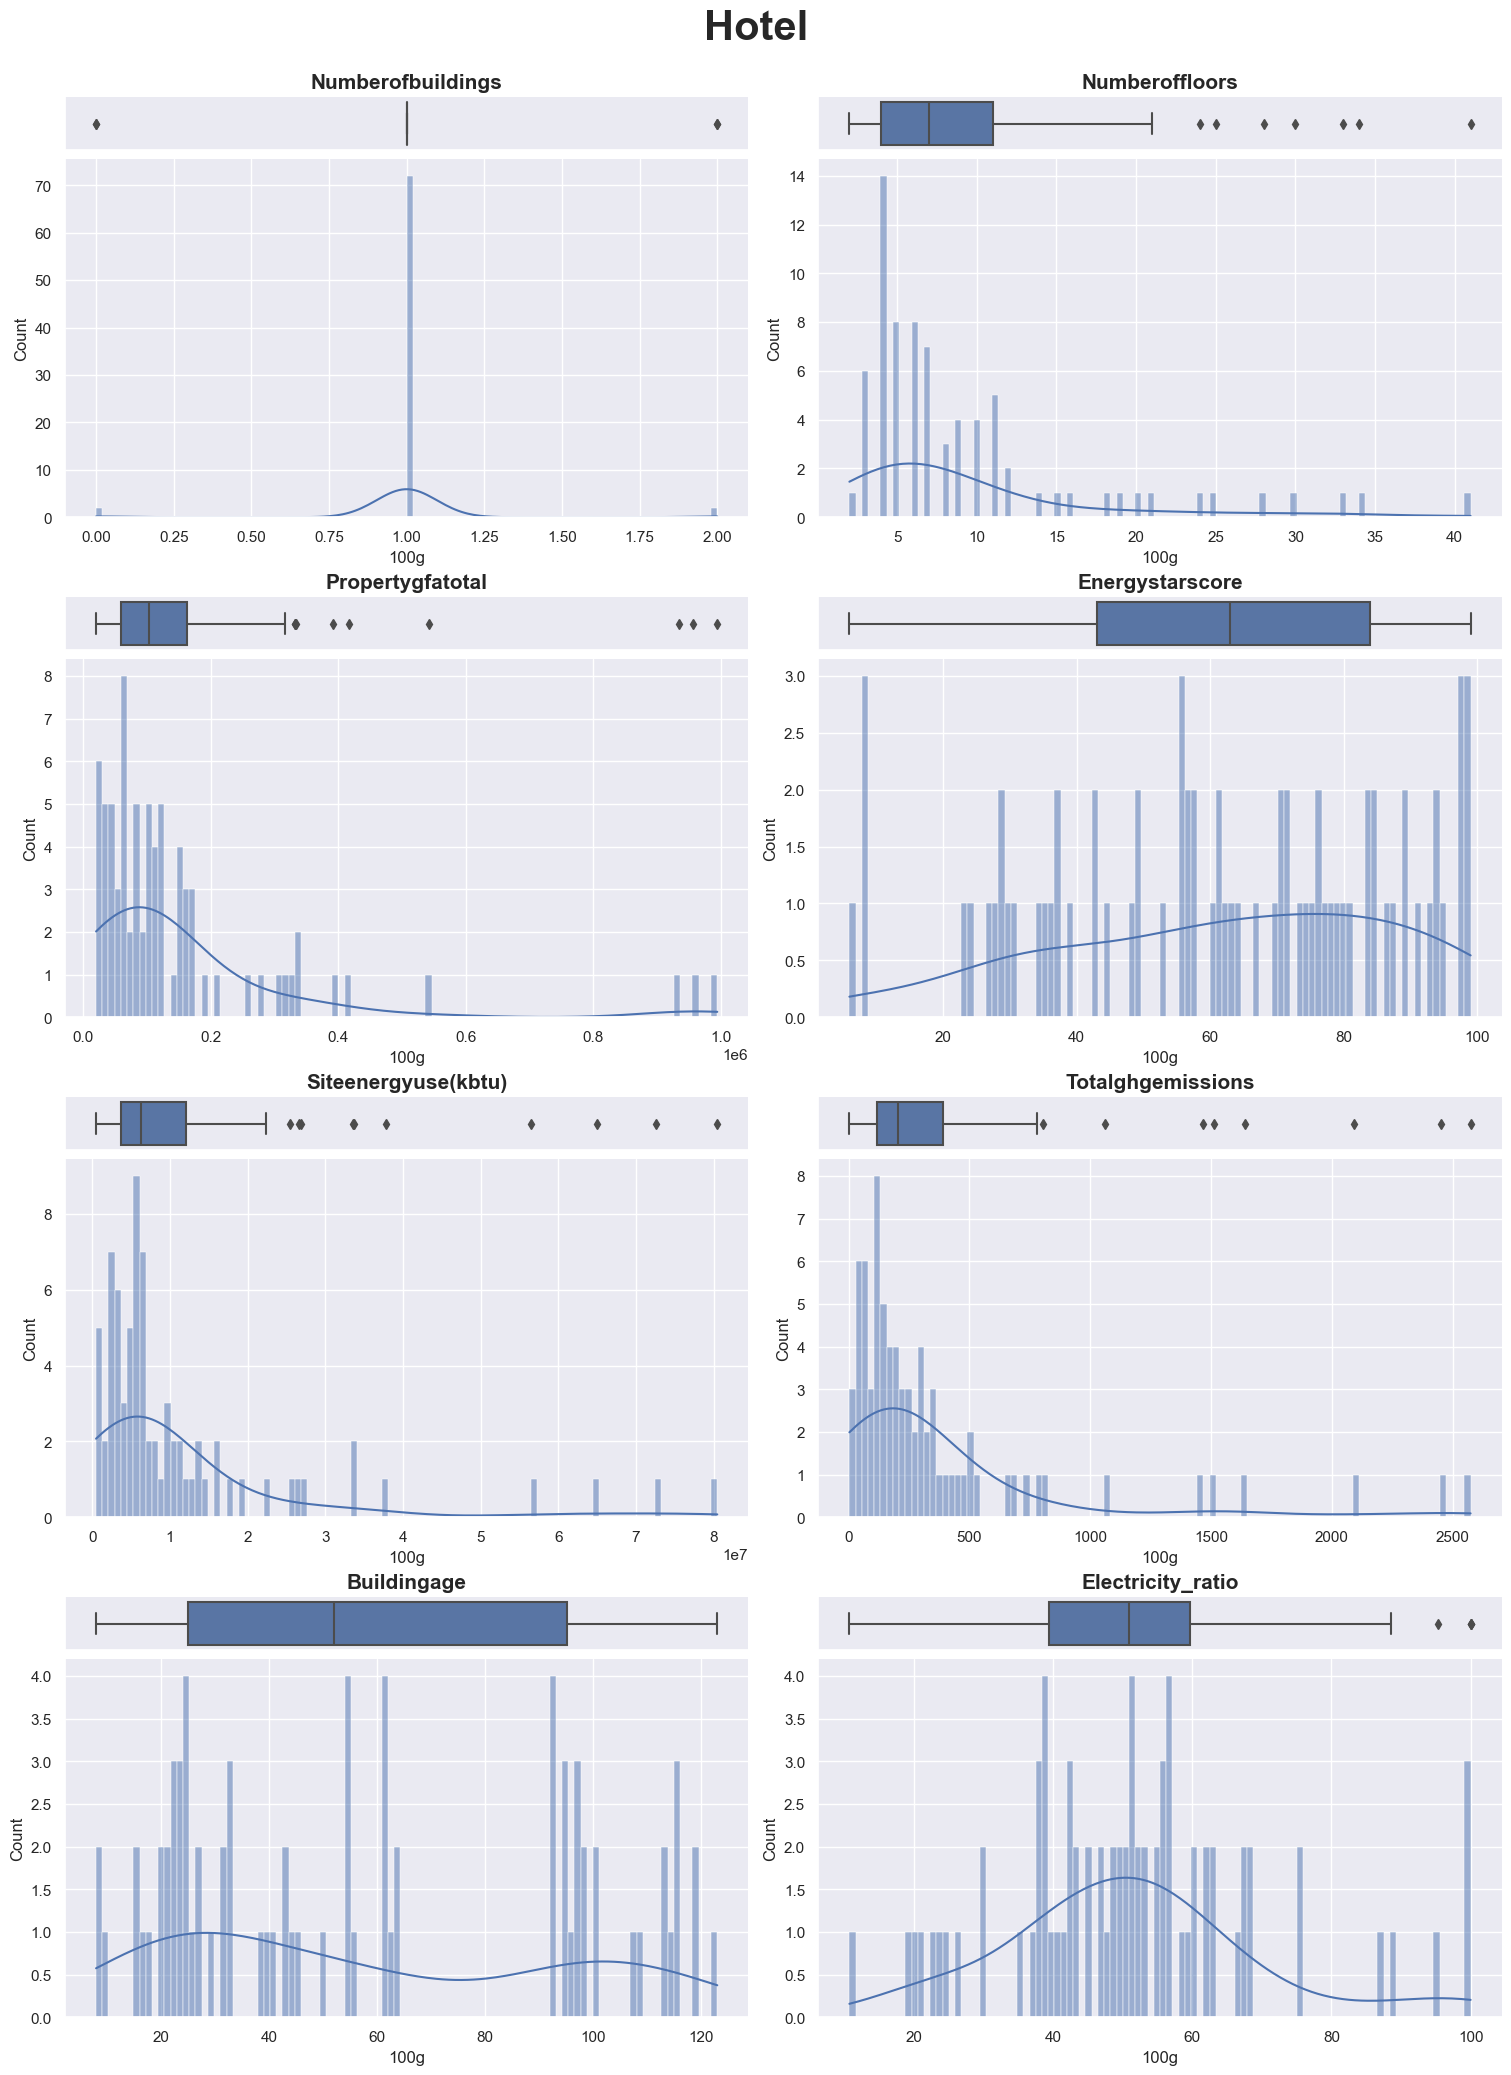

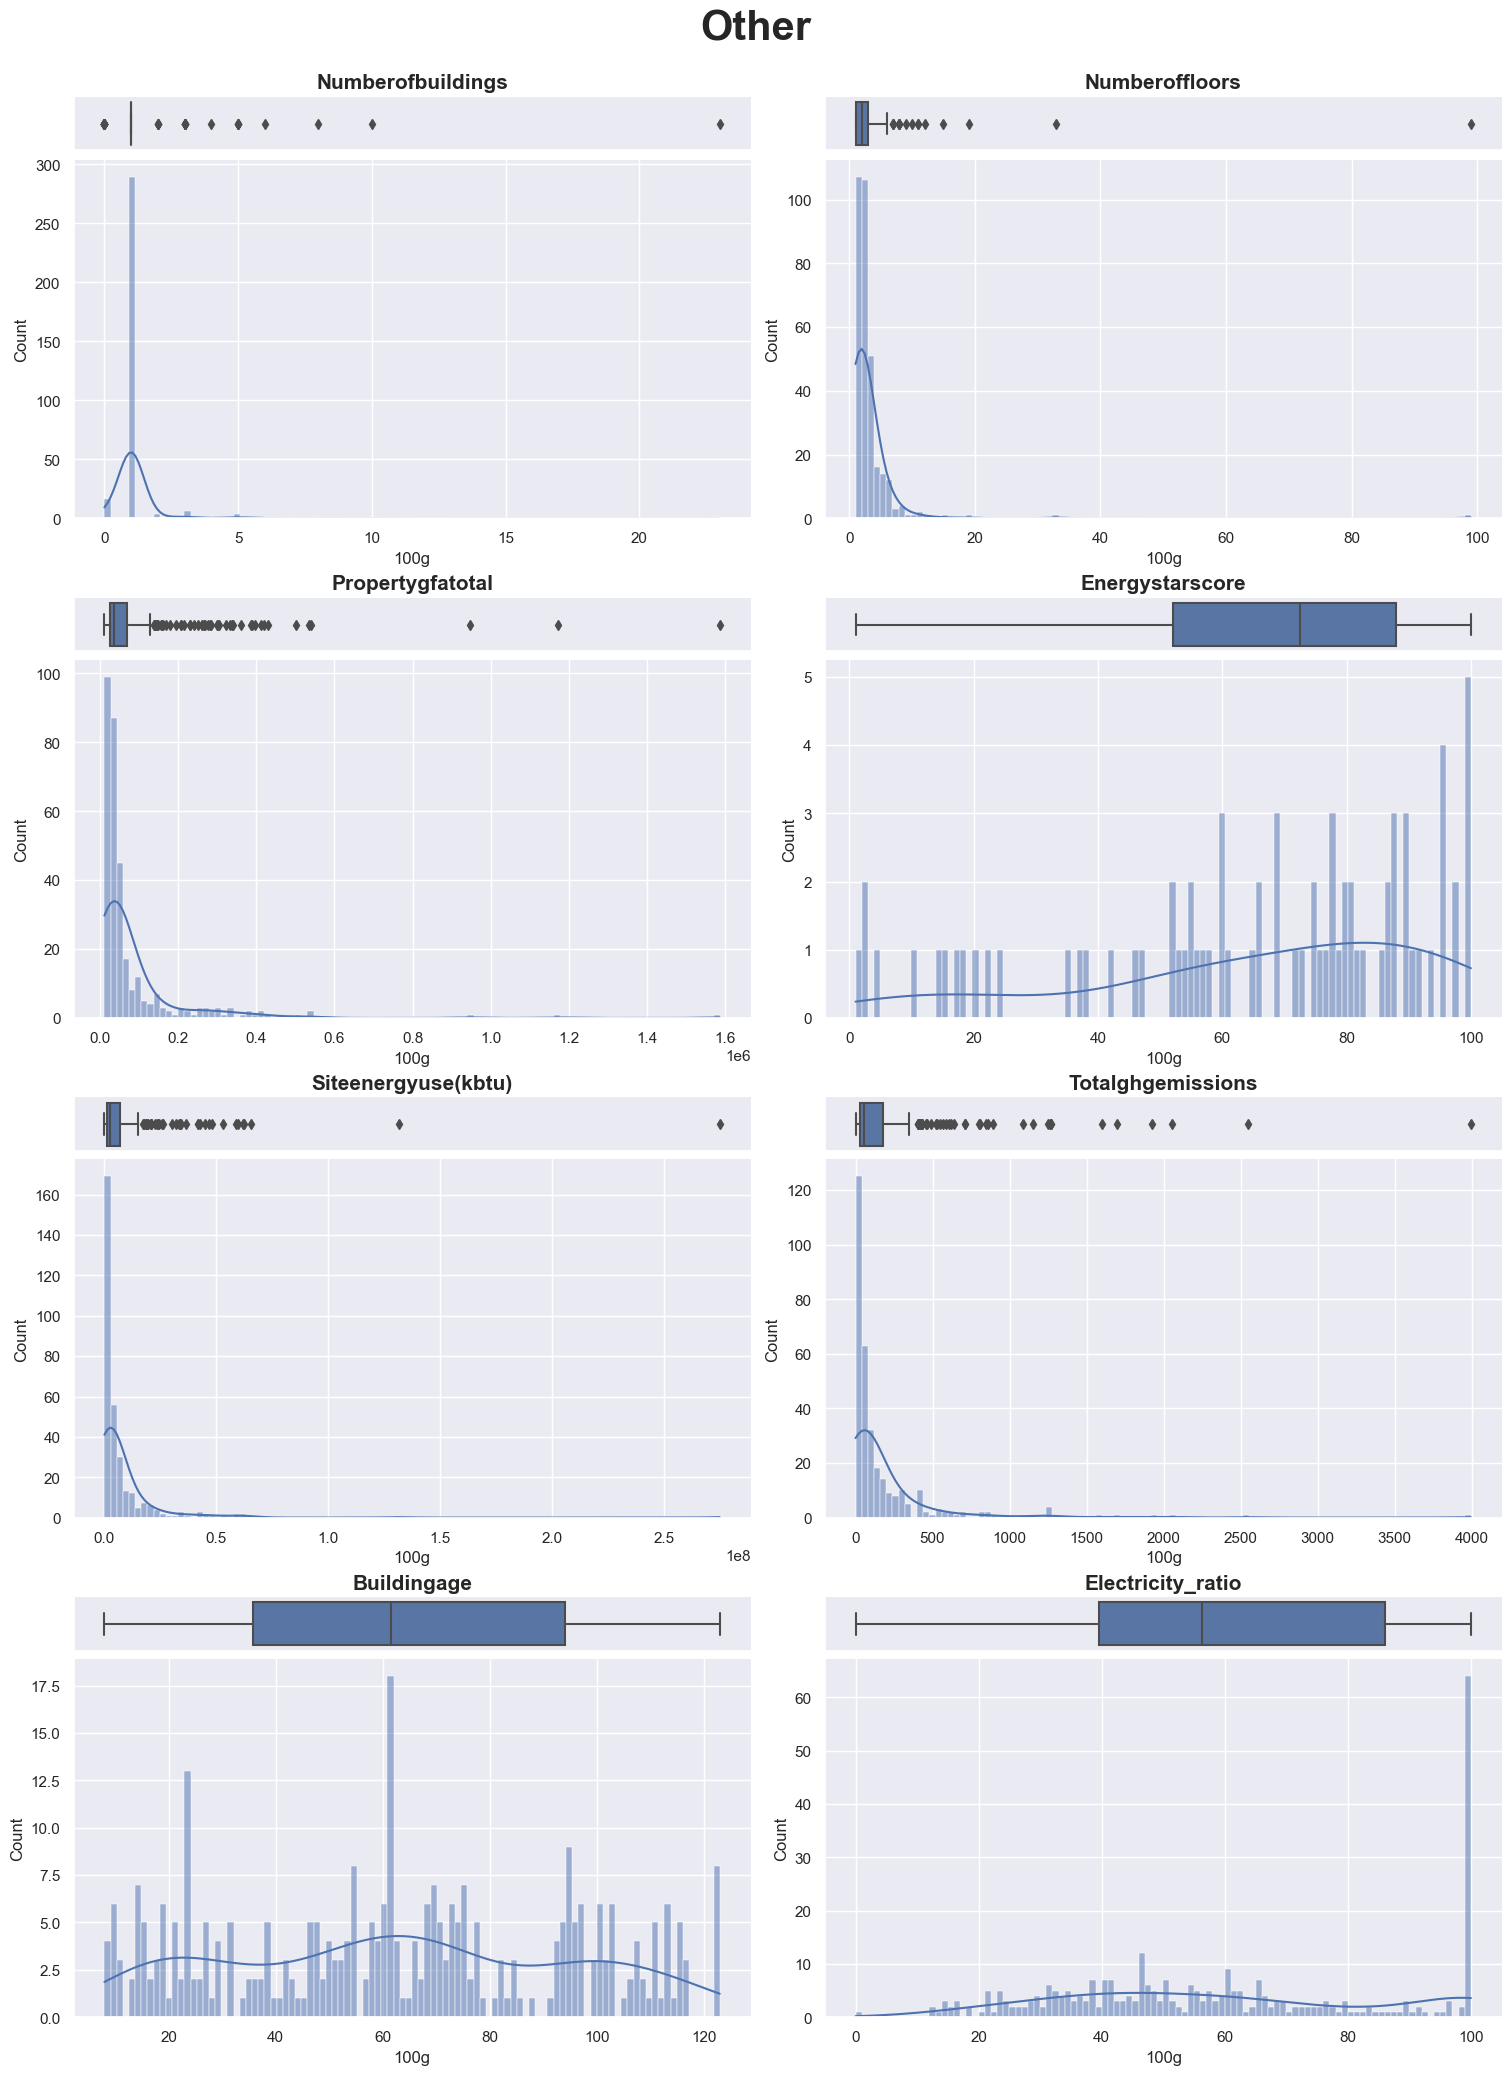

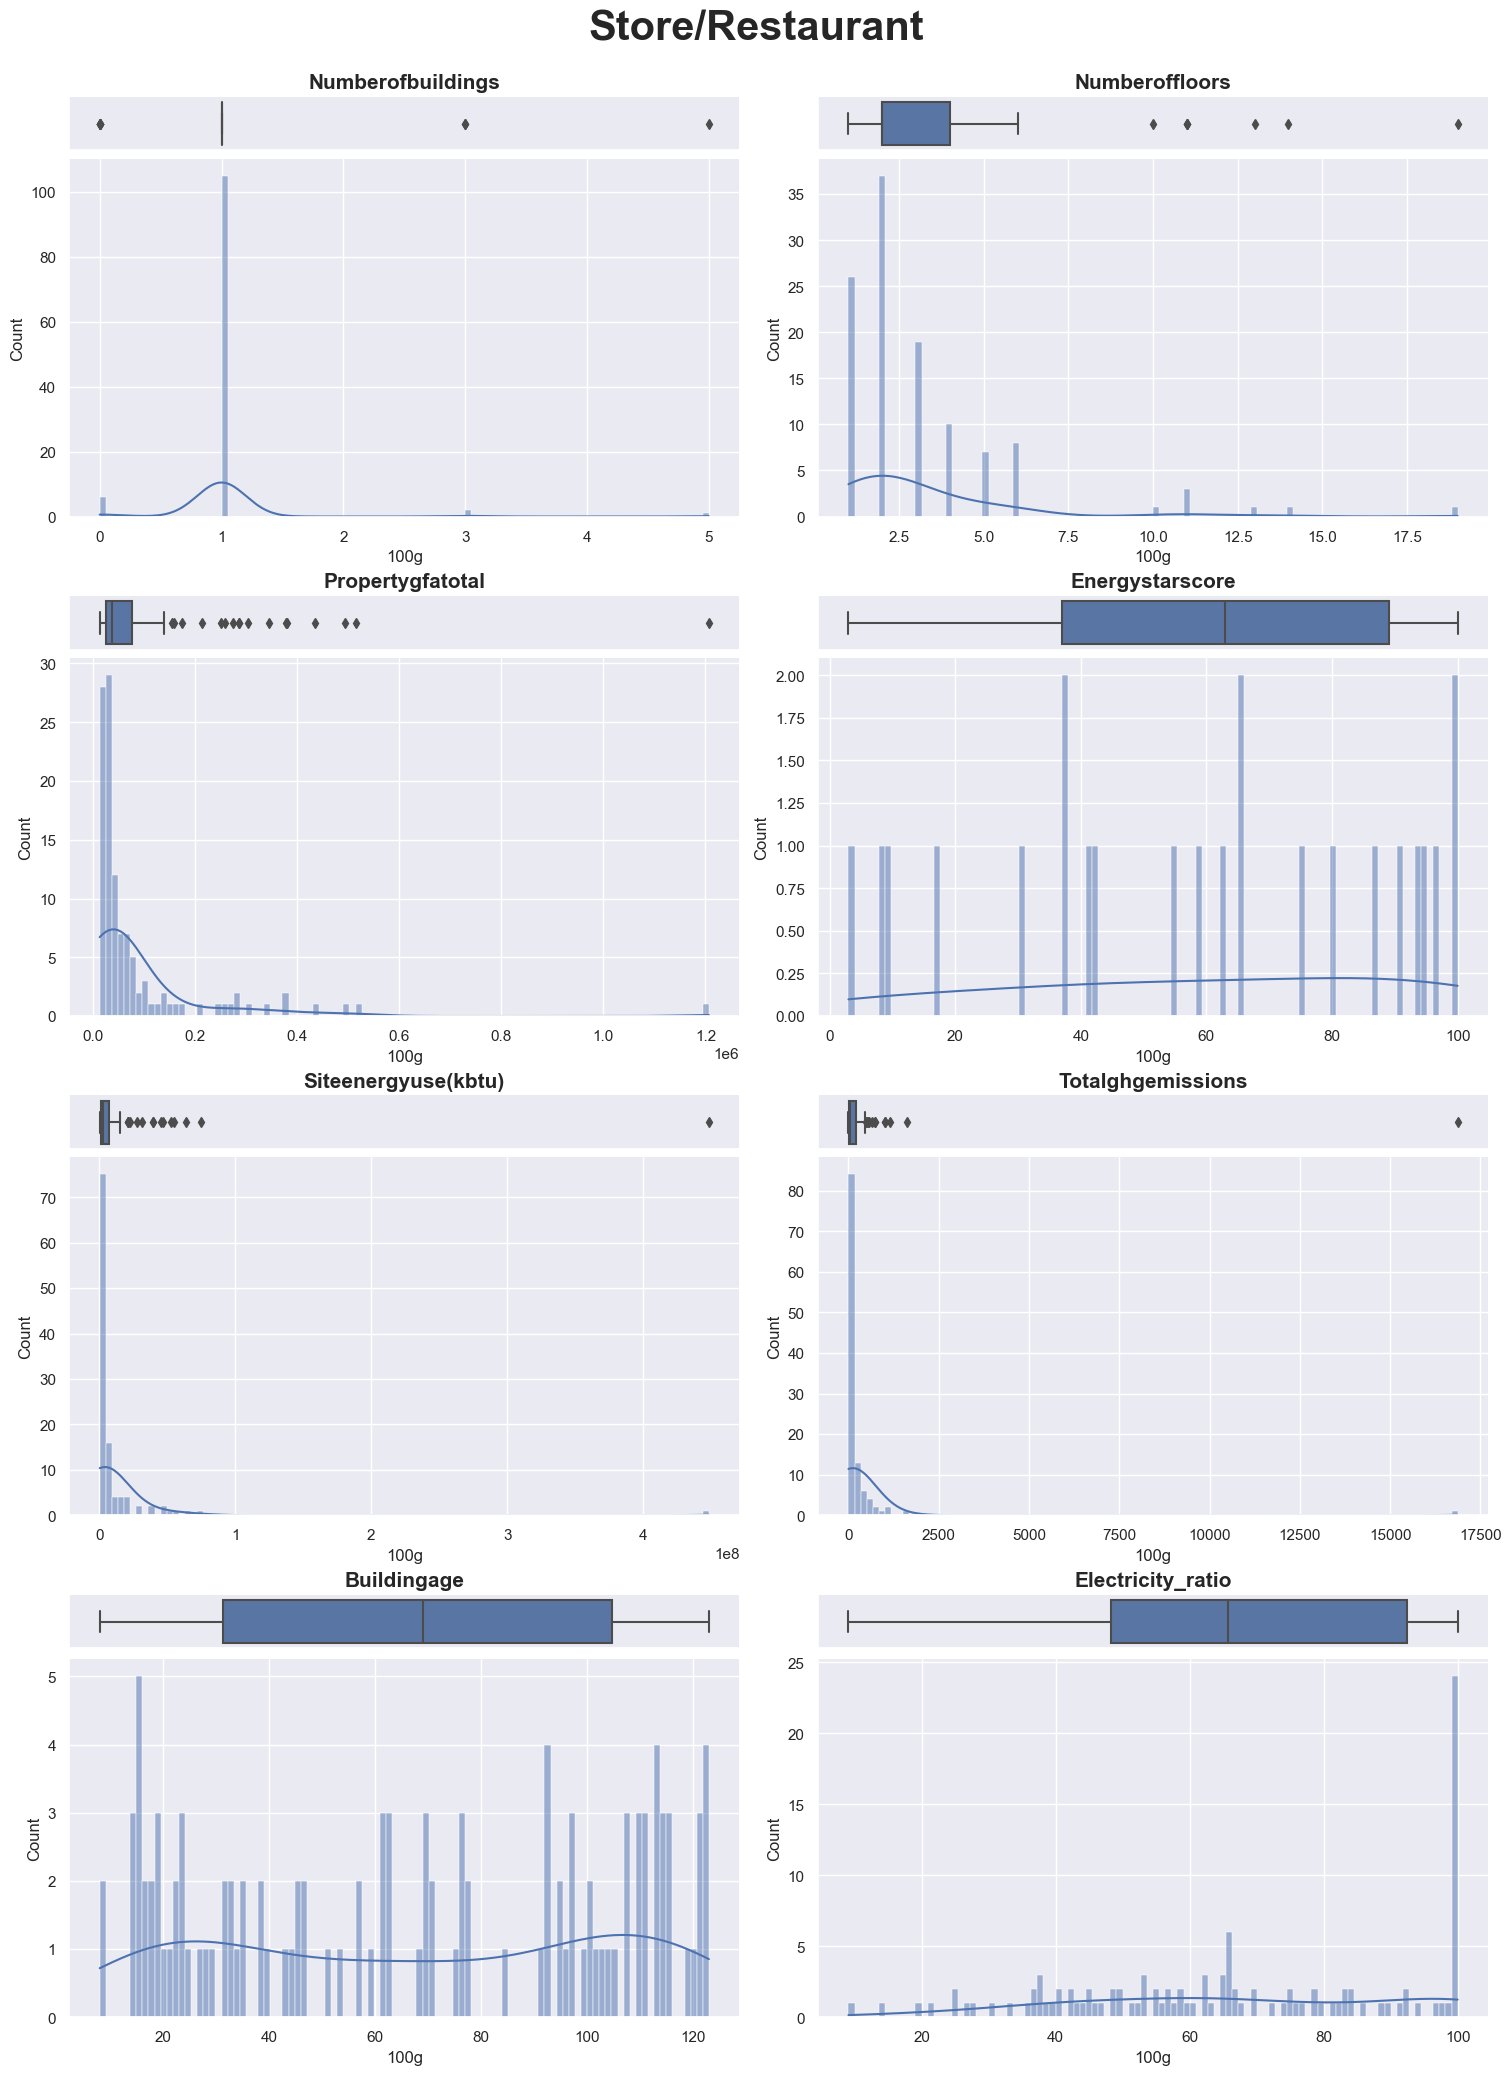

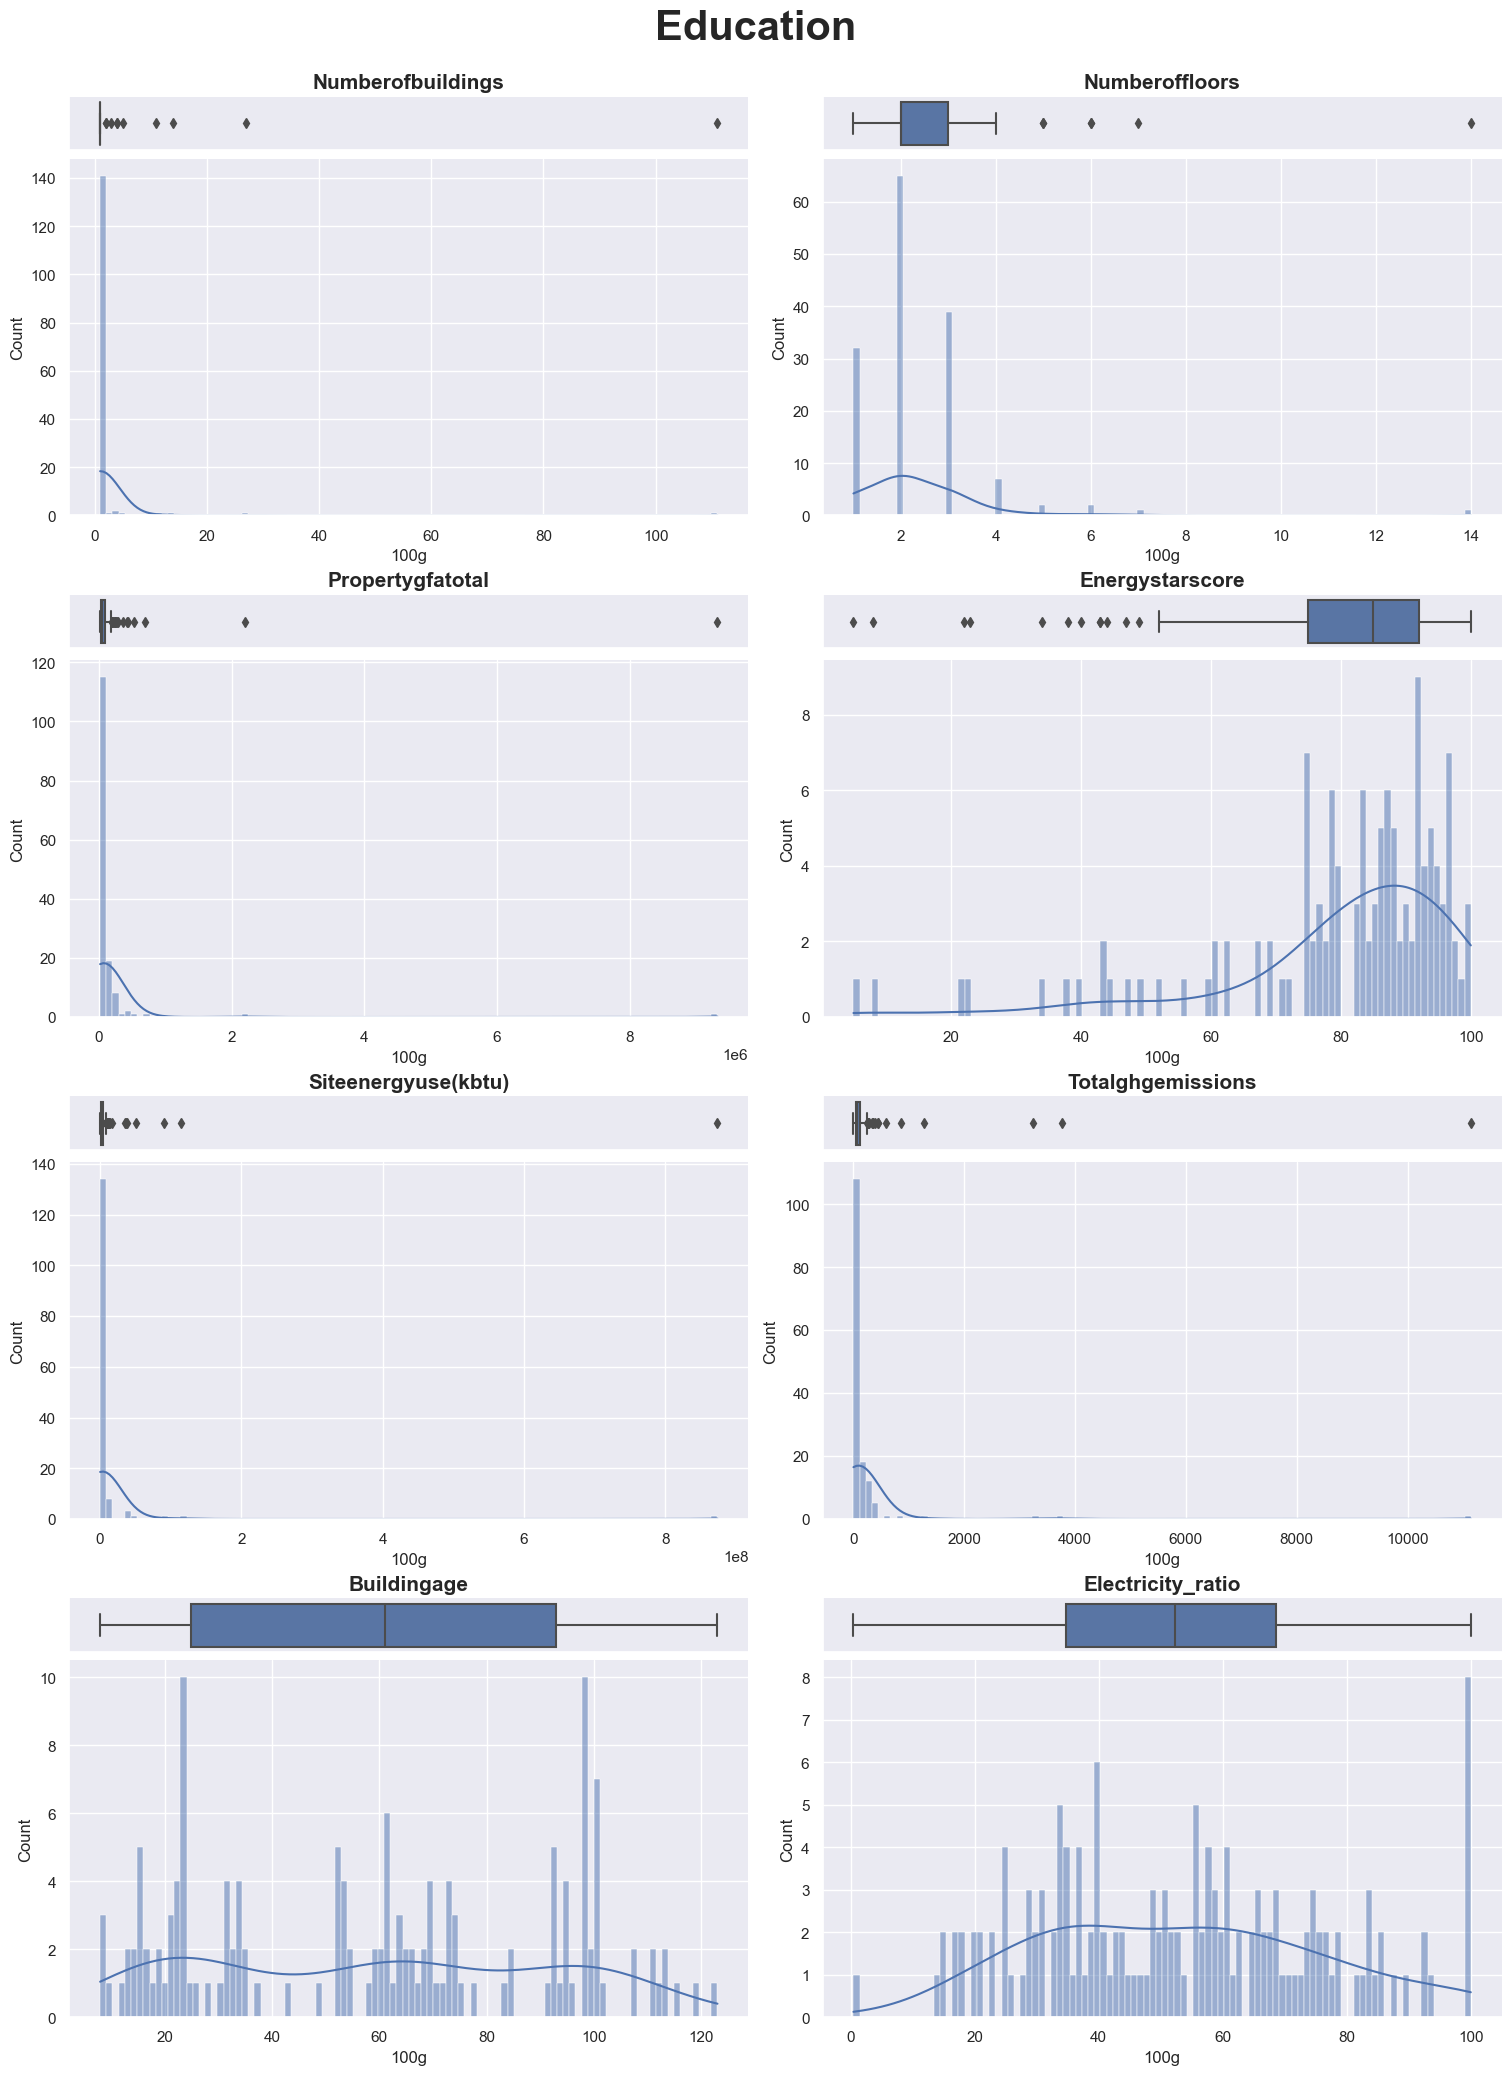

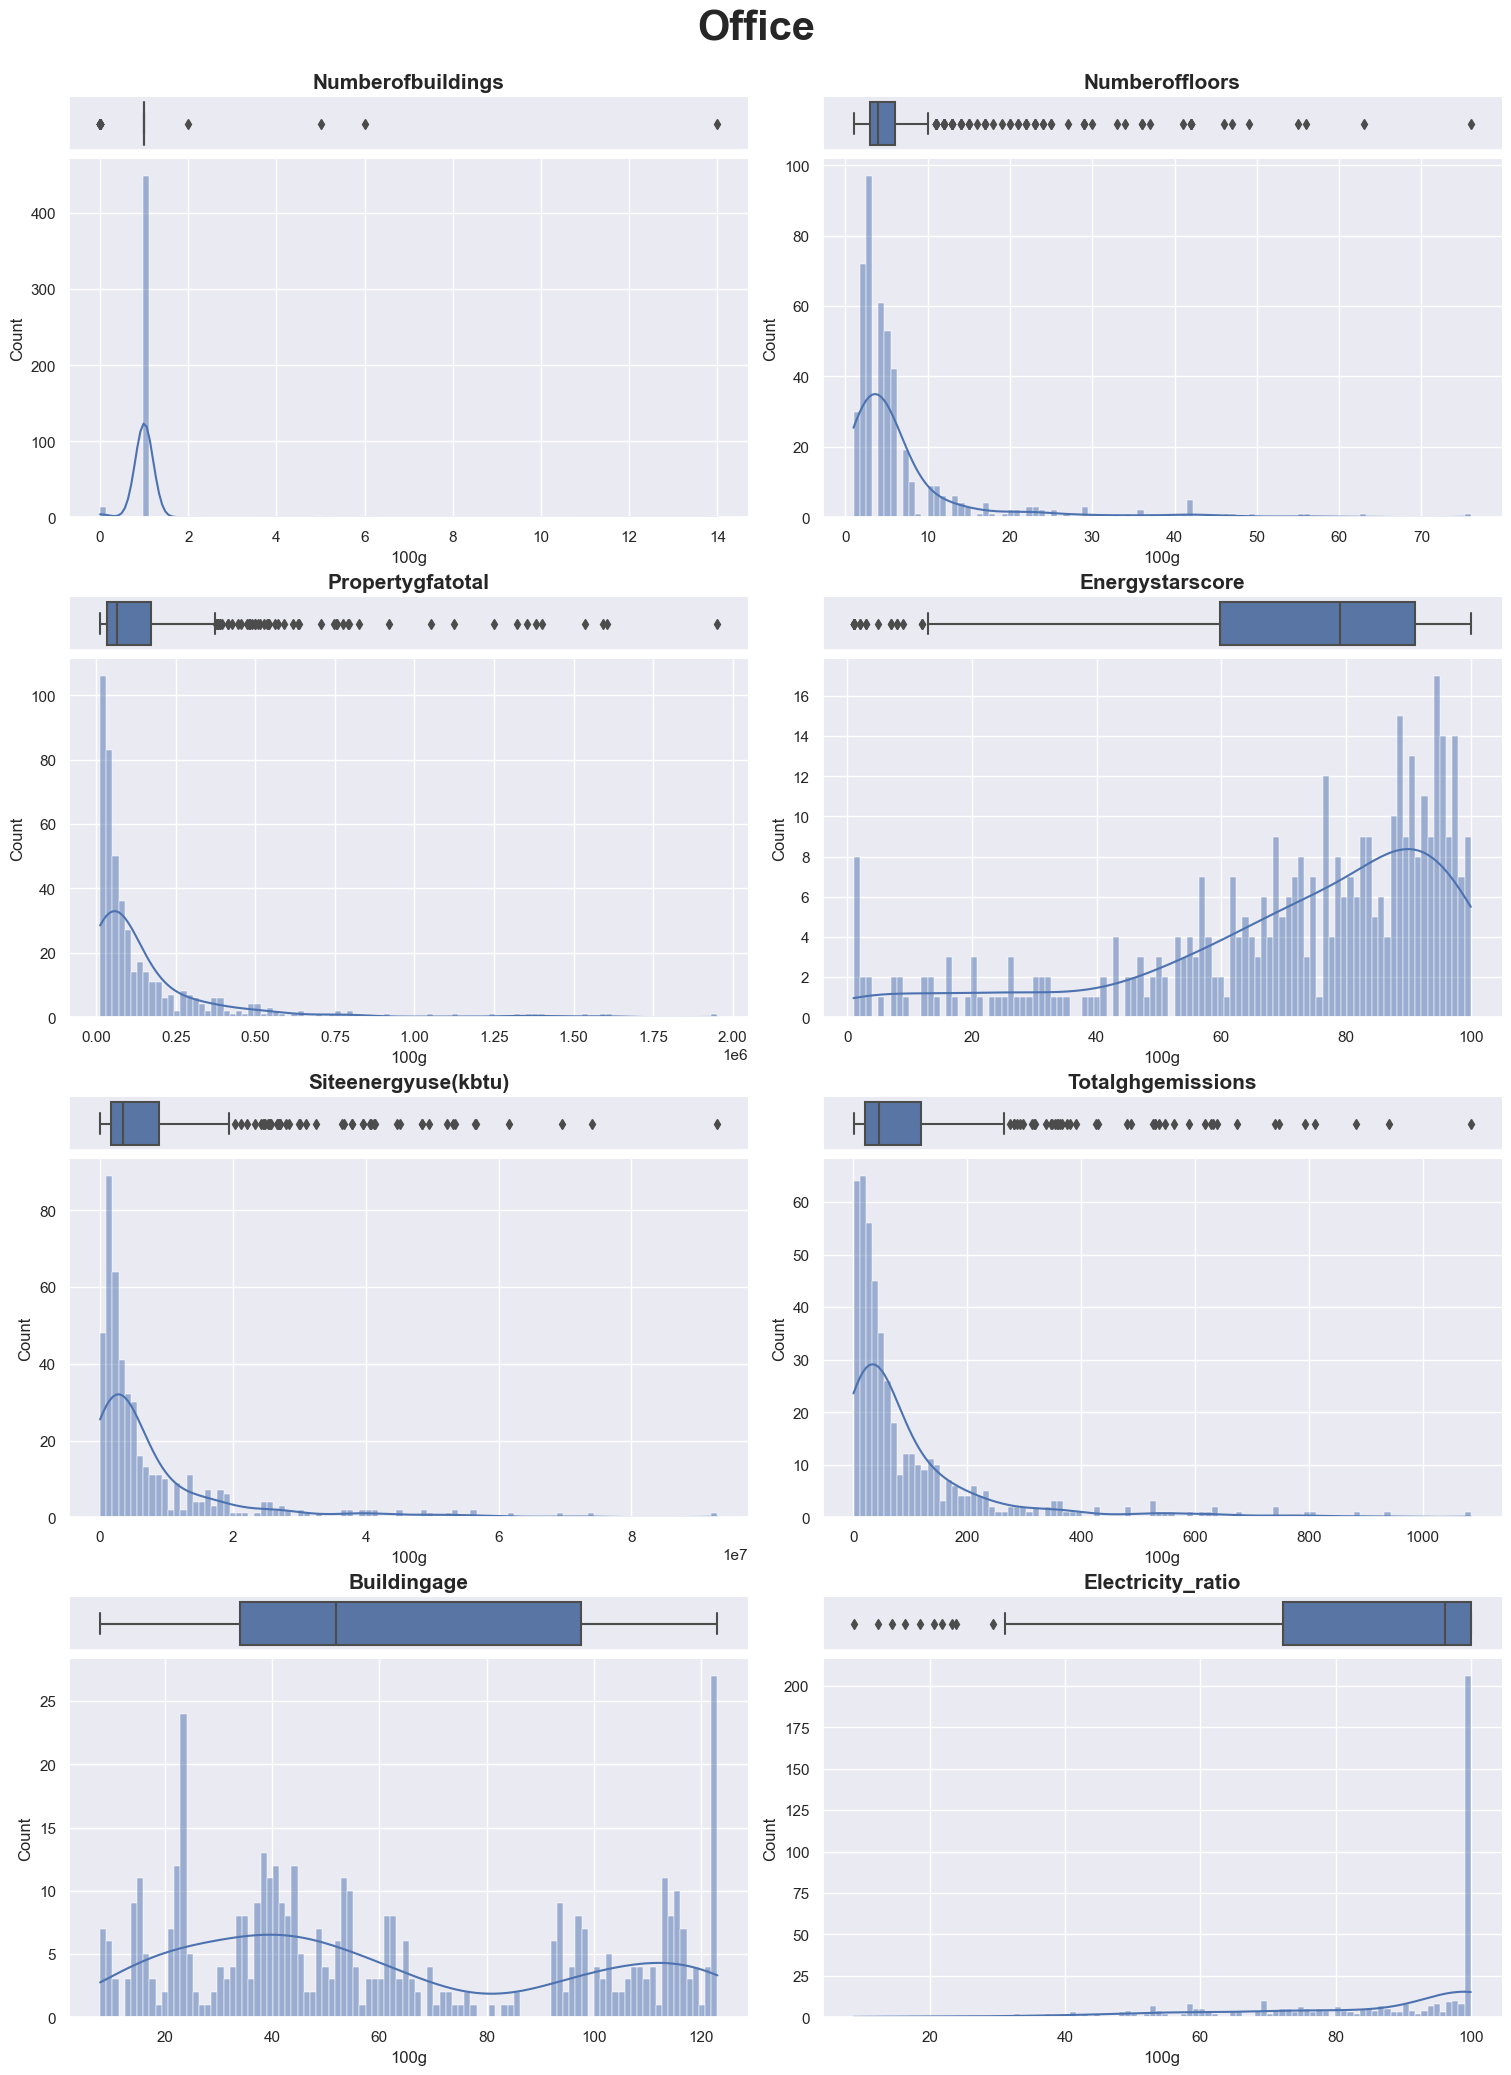

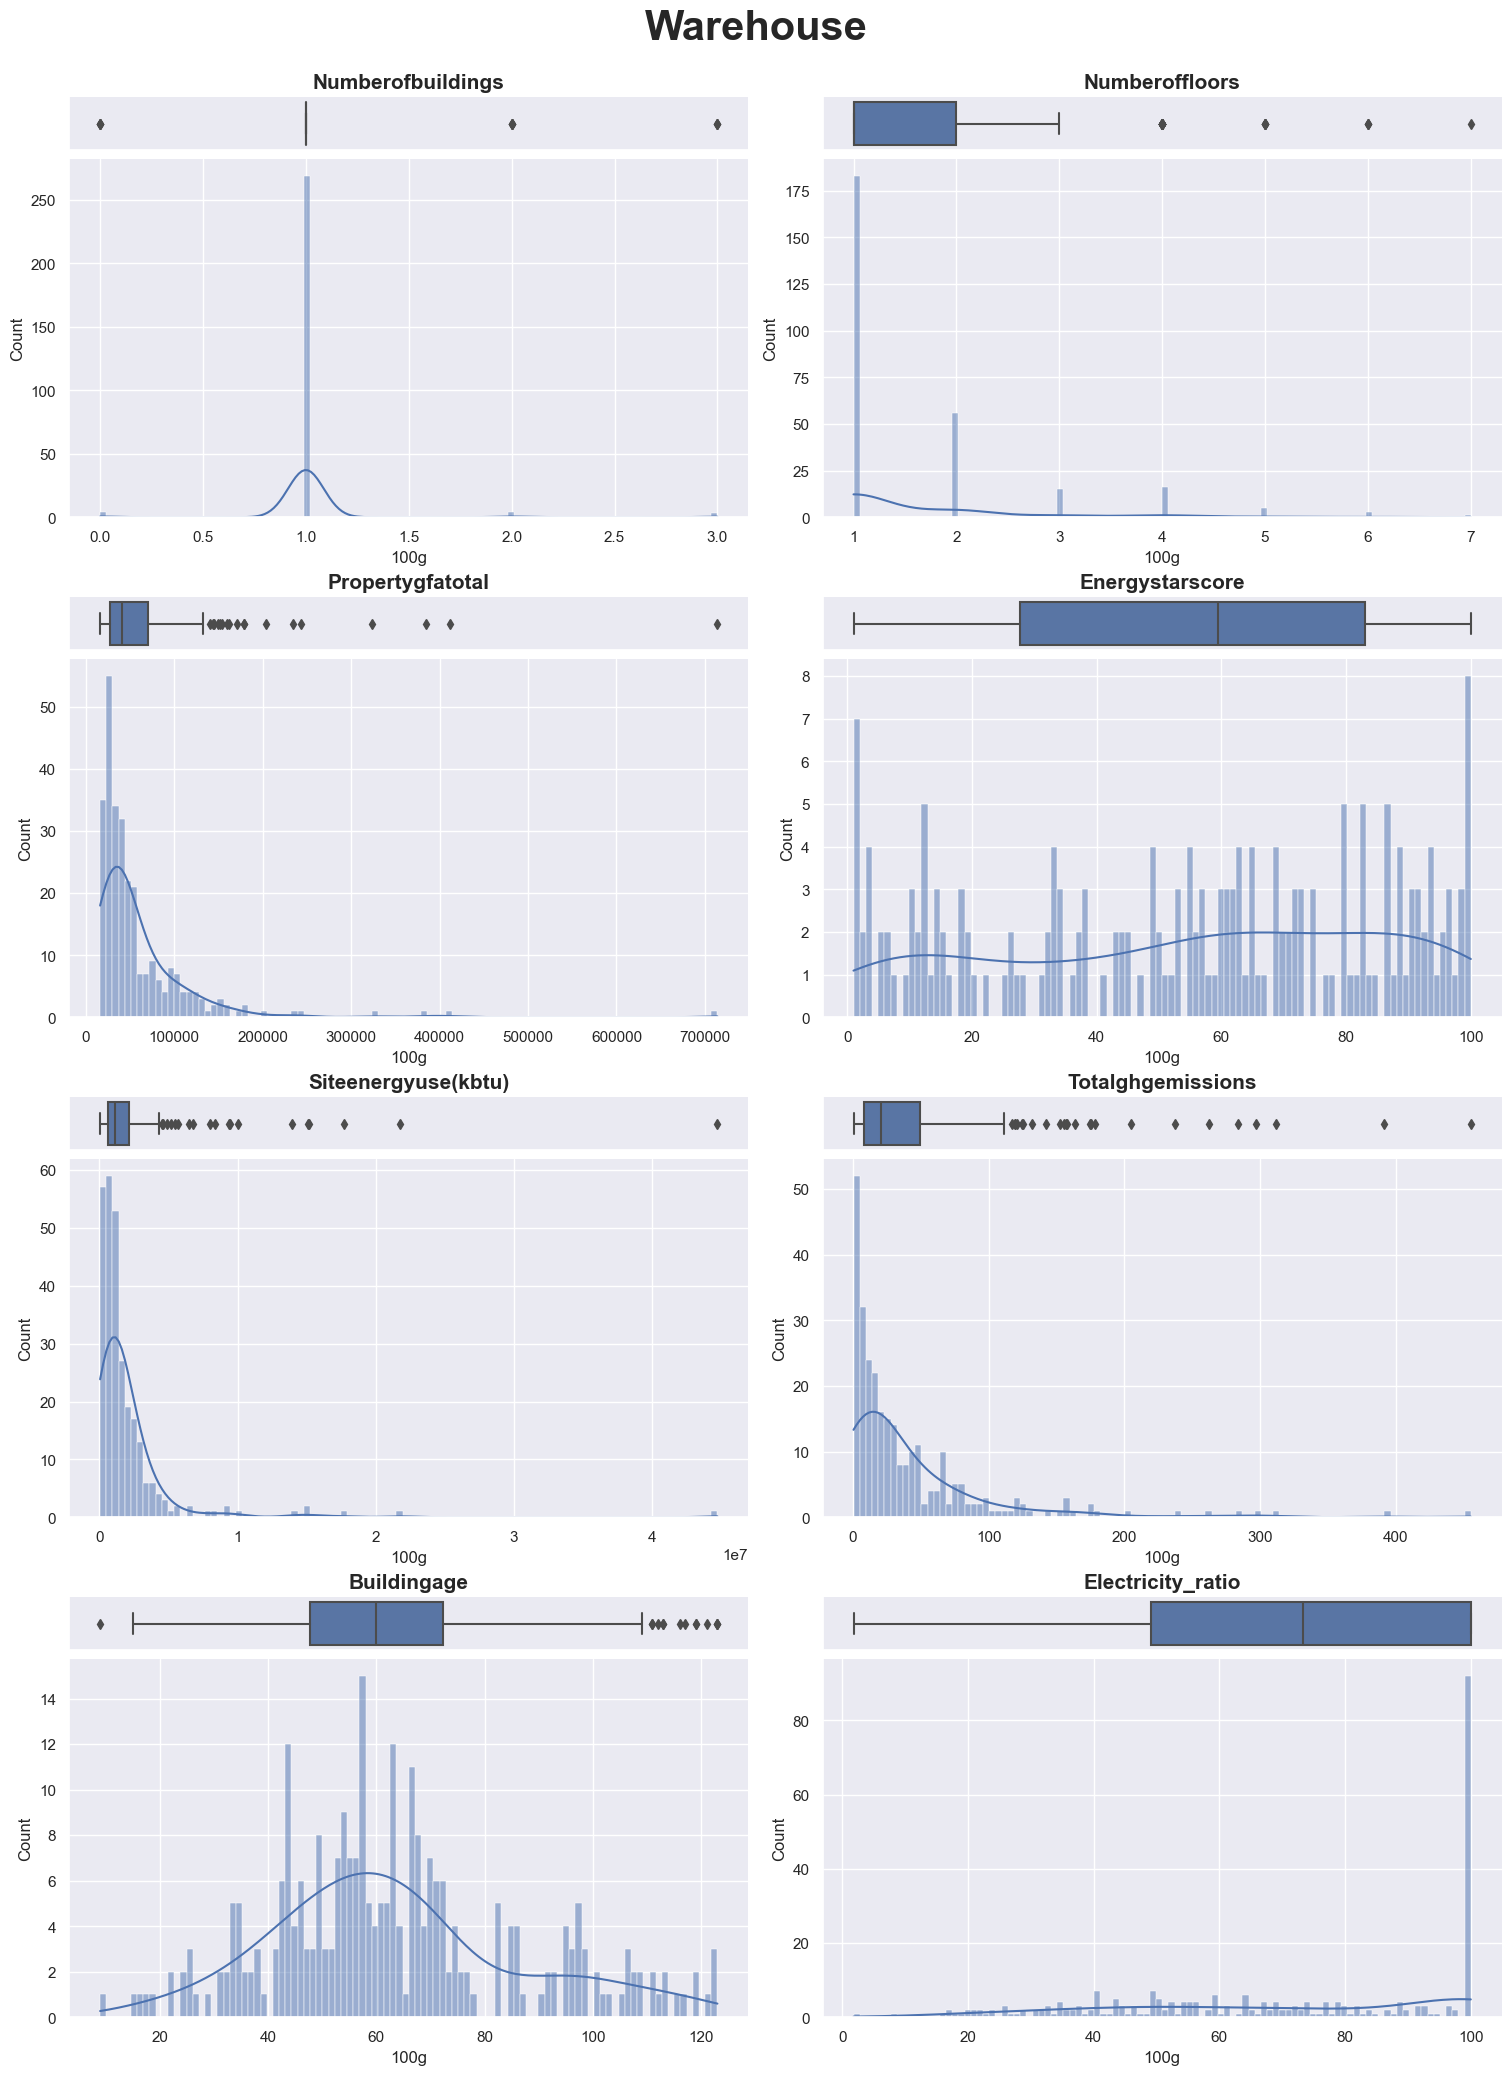

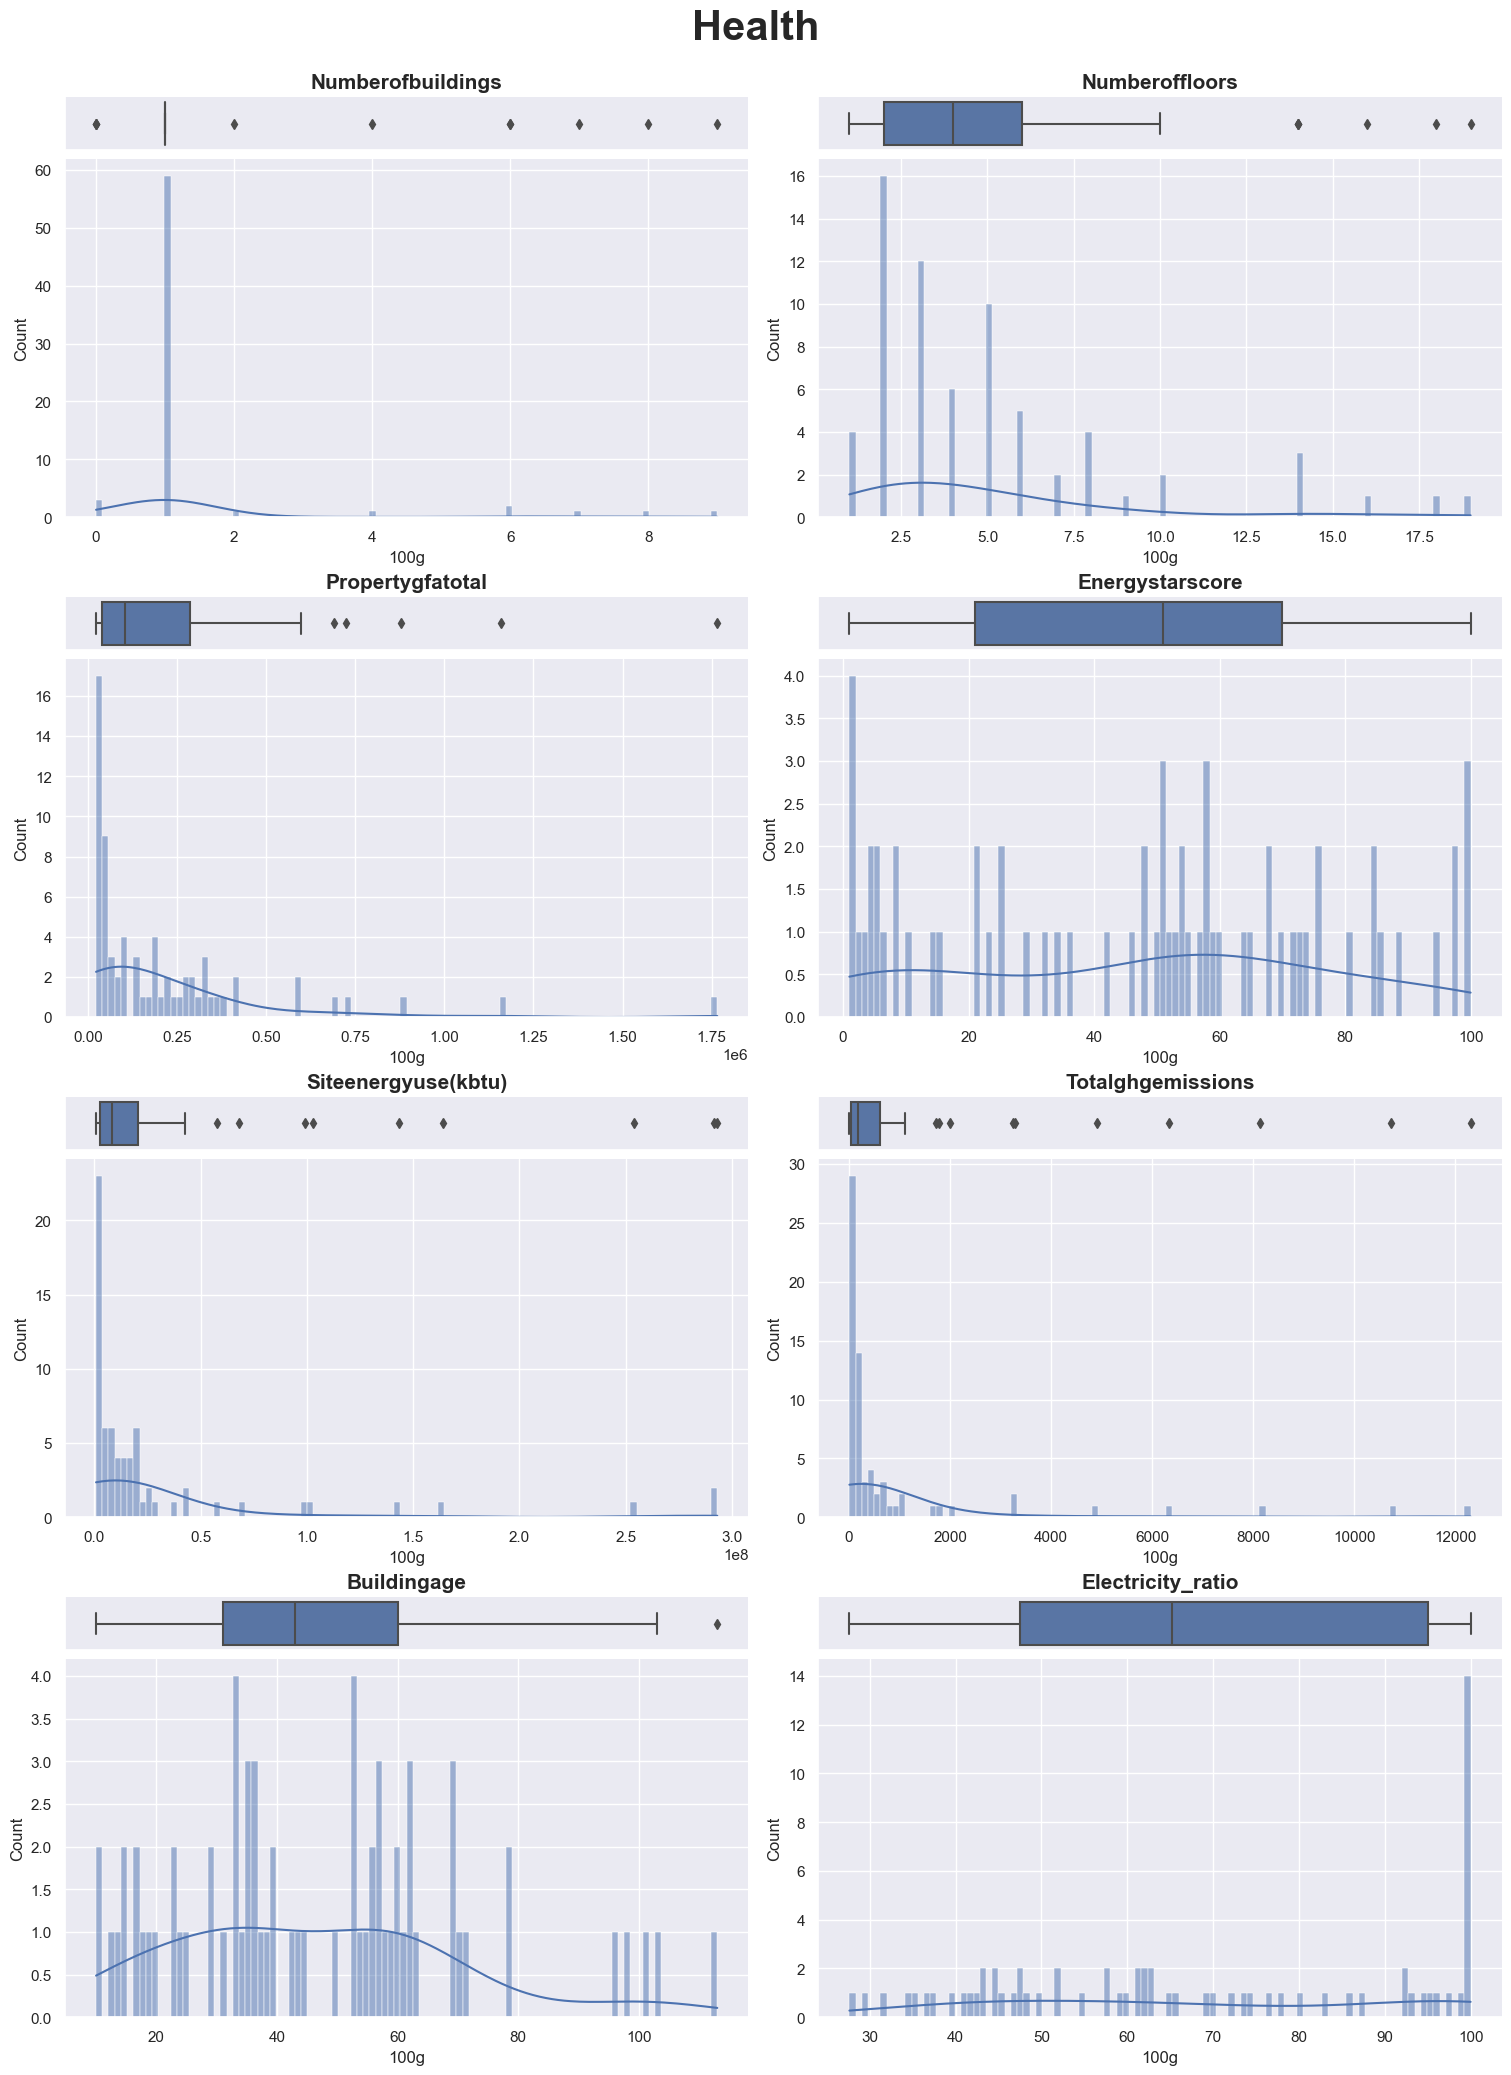

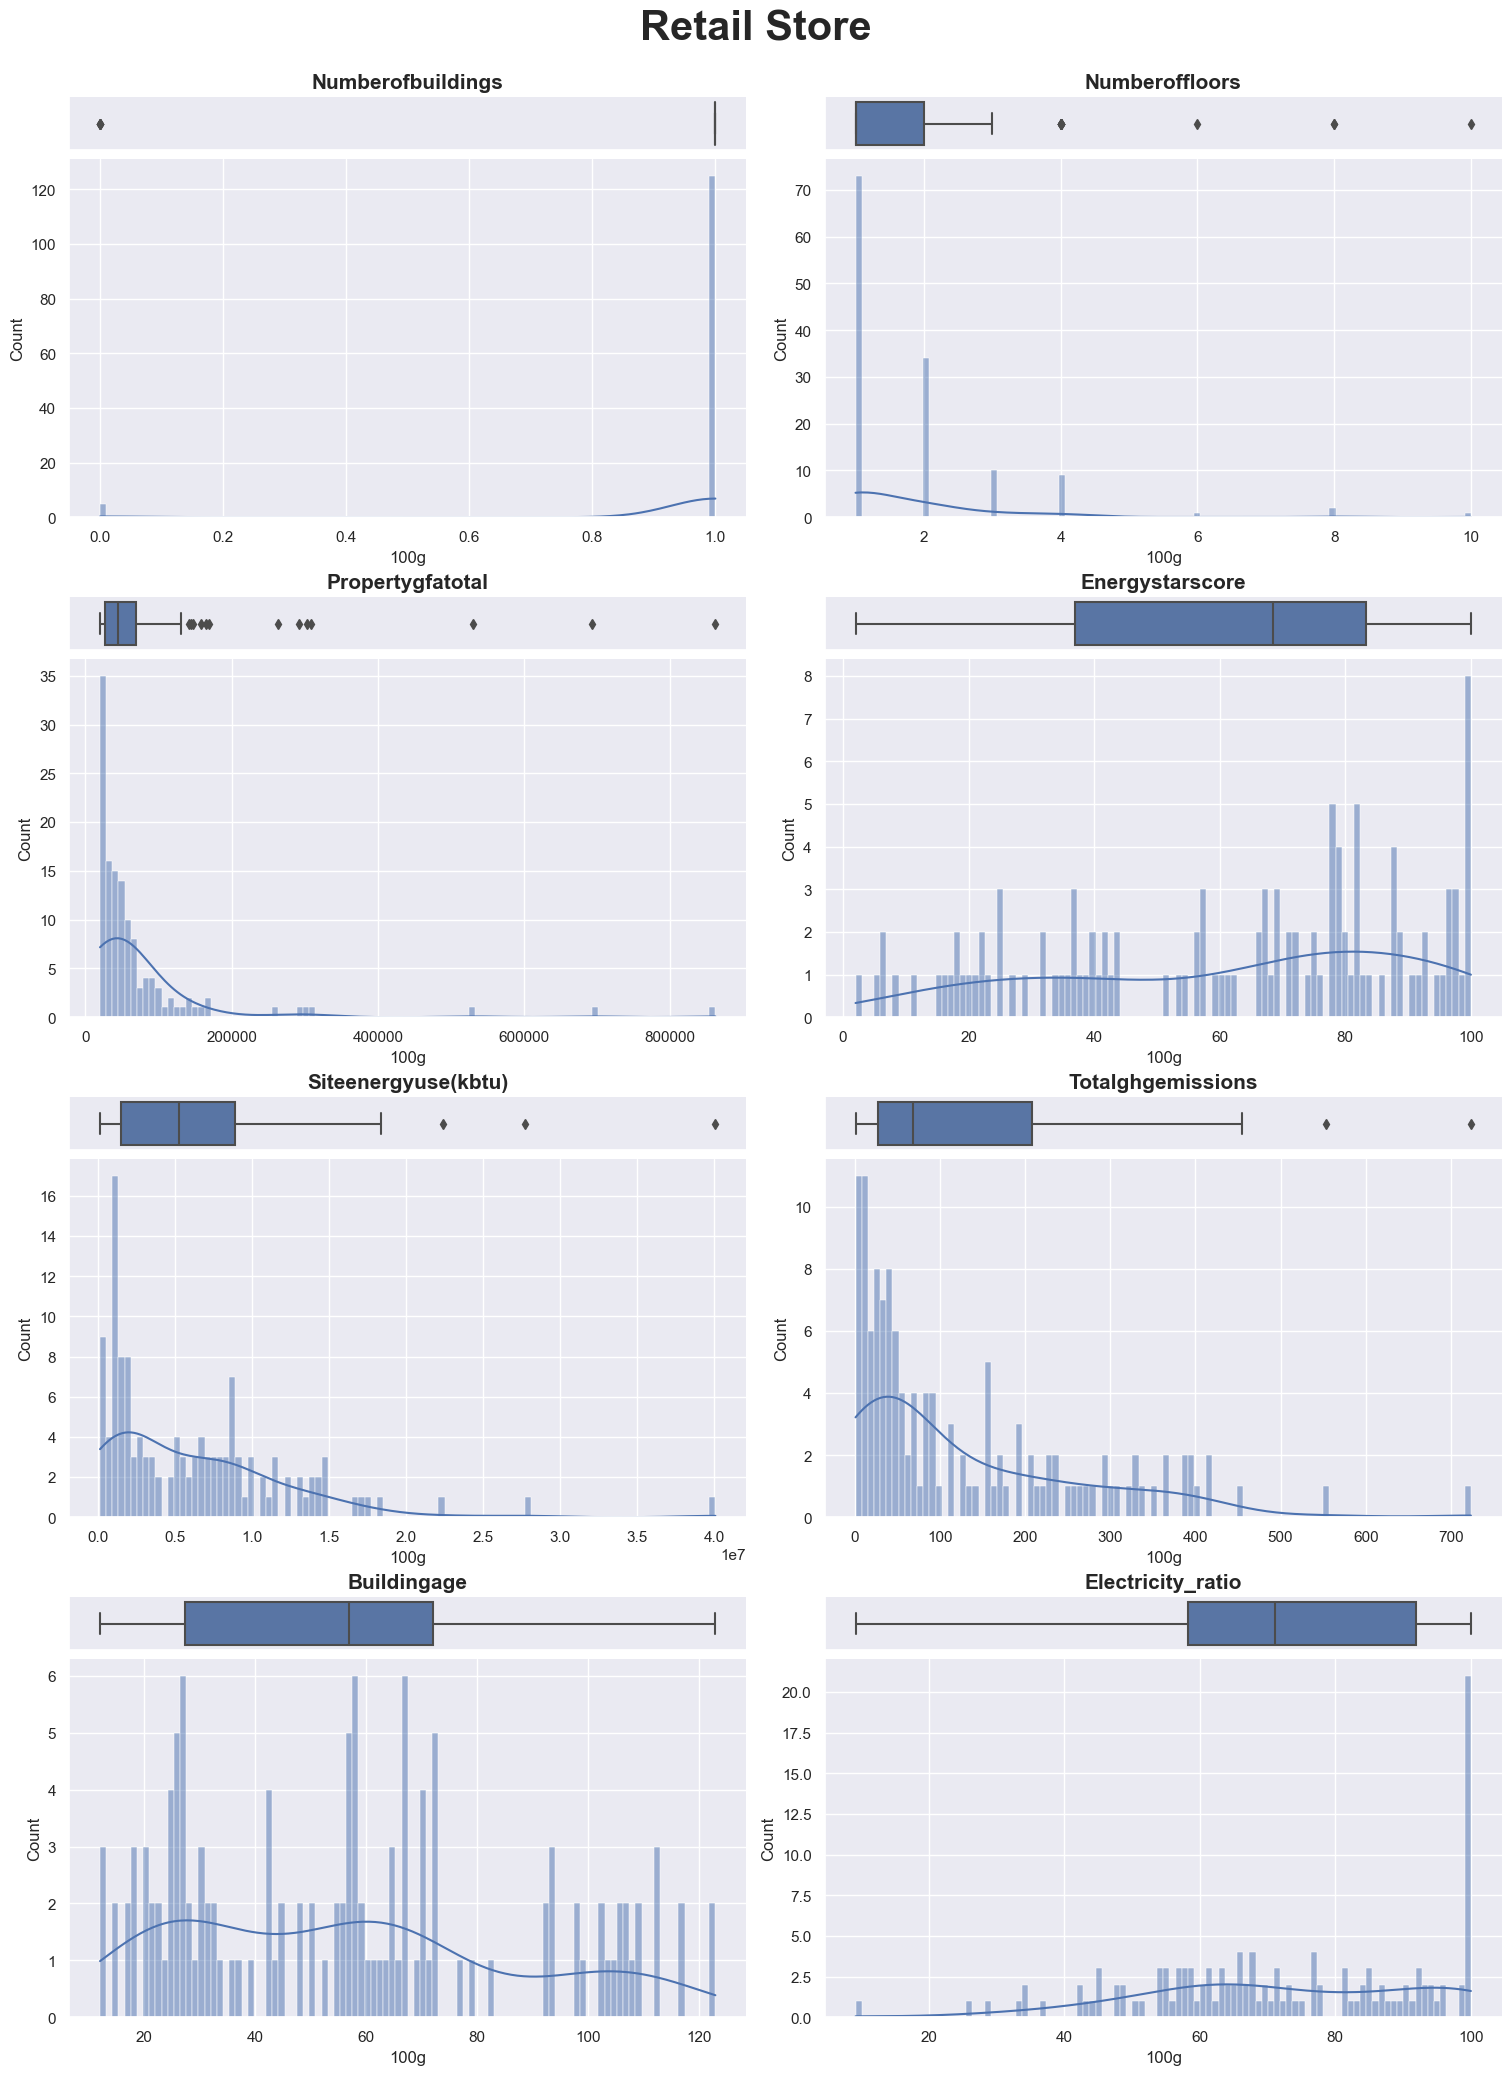

In [87]:
for property_type in nrj["renamed_PropertyType"].unique():
    
    df_temp_by_property_type = nrj[nrj["renamed_PropertyType"] == property_type].copy()
    
    fig = plt.figure(constrained_layout=True, figsize=[15,20])
    fig.suptitle(property_type, size=30, fontweight="bold", y=1.03)
    spec = fig.add_gridspec(ncols=2, nrows=8, width_ratios=[1,1], height_ratios=[0.3,2,0.3,2,0.3,2,0.3,2])
    
    # to cycle through the columns 
    col_boxplot, col_histplot = 0, 0
    
    for i in range(8):
        
        for j in range(2):
            
            if i % 2 == 0:
                
                if col_boxplot > len(NUMERIC_COLS_APP) - 1:
                    break
                    
                ax_box = fig.add_subplot(spec[i, j])
                boxplot = sns.boxplot(data=df_temp_by_property_type, x=NUMERIC_COLS_APP[col_boxplot], ax=ax_box)
                
                # Remove x axis name for the boxplot
                ax_box.set(xlabel="", xticks=[])
                ax_box.set(yticks=[])
                
                boxplot.set_title(NUMERIC_COLS_APP[col_boxplot].capitalize(), fontdict={ "fontsize": 15, "fontweight": "bold" })
                
                col_boxplot += 1
                
            elif i % 2 != 0:
                
                if col_histplot > len(NUMERIC_COLS_APP) - 1:
                    break
                
                ax_hist = fig.add_subplot(spec[i, j])
                sns.histplot(data=df_temp_by_property_type, x=NUMERIC_COLS_APP[col_histplot], bins=100,  kde=True,  ax=ax_hist)
                ax_hist.set(xlabel="100g")
                
                col_histplot += 1
    
#     plt.savefig("img/nan-" + property_type + ".png", bbox_inches="tight")
    sns.despine(fig)

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.2. Treating outliers wit Z-Score</h3>
</div>

In [88]:
df_without_outliers_by_zscore = pd.DataFrame()

In [89]:
for property_type in nrj["renamed_PropertyType"].unique():
    
    # for each property type, we are going to define the max and min threshold to replace outliers
    df_temp_outliers  = nrj[nrj["renamed_PropertyType"] == property_type].copy()
    
    for col in NUMERIC_COLS_APP:
        
        # Defining the Z Score
        df_temp_outliers[col + "_zscore"] = (df_temp_outliers[col] - df_temp_outliers[col].mean()) / df_temp_outliers[col].std()
        df_temp_outliers.loc[(df_temp_outliers[col + "_zscore"] > 3) | (df_temp_outliers[col + "_zscore"] < -3), col] = np.nan
        
        del df_temp_outliers[col + "_zscore"]
        
    df_without_outliers_by_zscore = pd.concat([df_without_outliers_by_zscore, df_temp_outliers])

<div class="alert alert-block alert-info">
     Analyzing the result
</div>

In [90]:
df_analysis(df_without_outliers_by_zscore, "df_without_outliers_by_zscore", type_analysis="complete")


Analysis of df_without_outliers_by_zscore dataset
--------------------------------------------------------------------
- Dataset shape:                  1609 rows and 13 columns
- Total of NaN values:            731
- Percentage of NaN:              3.49 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 133.0 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN   
0          OSEBuildingID     int64     1609    1609      0  0.00000  \
1           Neighborhood  category     1609      13      0  0.00000   
8            BuildingAge   float64     1609     113      0  0.00000   
10            NaturalGas      bool     1609       2      0  0.00000   
11              SteamUse      bool     1609       2      0  0.00000   
12  renamed_PropertyType  category     1609       8      0  0.00000   
9      Electricity_ratio   float64     1601    1246      8  0.50000   
4       PropertyGFATotal   float64     1579    1506     30  1.86000   
6    SiteEnergyUse(kBtu)   float64     1577    1577     32  1.99000   
2      NumberofBuildings   float64     1575      10     34  2.11000   
7      TotalGHGEmissions   float64     1570    1505     39  2.42000   
3         NumberofFloors   float64     1565      31     44  2.73000   
5        ENERGYSTARScore   float64     1065     100    544 33.81000   

            mean         min           25%           50%           75%   
0    16200.86203     1.00000     582.00000   21138.00000   24581.00000  \
1            NaN         NaN           NaN           NaN           NaN   
8       61.18024     8.00000      34.00000      58.00000      93.00000   
10           NaN         NaN           NaN           NaN           NaN   
11           NaN         NaN           NaN           NaN           NaN   
12           NaN         NaN           NaN           NaN           NaN   
9       70.19899     0.00009      49.13068      70.74125      99.99793   
4    95904.69348 11285.00000   29200.00000   48139.00000  100917.50000   
6  6400311.32467 16808.90039 1234095.50000 2502081.00000 6673138.00000   
2        1.04698     0.00000       1.00000       1.00000       1.00000   
7      128.75774     0.12000      19.81250      47.96000     130.50000   
3        3.56933     1.00000       1.00000       2.00000       4.00000   
5       65.65070     1.00000      49.00000      73.00000      89.00000   

               max            std  
0      50226.00000    13752.23977  
1              NaN            NaN  
8        123.00000       32.56291  
10             NaN            NaN  
11             NaN            NaN  
12             NaN            NaN  
9        100.00113       25.98515  
4    2200000.00000   130641.99880  
6  163945984.00000 11592230.42696  
2         27.00000        0.86677  
7       6330.91000      301.21298  
3         34.00000        4.08585  
5        100.00000       28.40086

<div class="alert alert-block alert-info">
    Selecting only the rows without missing-values on the target values
</div>

In [91]:
nrj = pd.DataFrame(df_without_outliers_by_zscore[df_without_outliers_by_zscore[["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].notnull().all(axis=1)]).reset_index(drop=True)

In [92]:
df_analysis(nrj, "nrj", type_analysis="complete")


Analysis of df_bebcs dataset
--------------------------------------------------------------------
- Dataset shape:                  1558 rows and 13 columns
- Total of NaN values:            603
- Percentage of NaN:              2.98 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 116.8 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN   
0          OSEBuildingID     int64     1558    1558      0  0.00000  \
1           Neighborhood  category     1558      13      0  0.00000   
6    SiteEnergyUse(kBtu)   float64     1558    1558      0  0.00000   
7      TotalGHGEmissions   float64     1558    1493      0  0.00000   
8            BuildingAge   float64     1558     113      0  0.00000   
10            NaturalGas      bool     1558       2      0  0.00000   
11              SteamUse      bool     1558       2      0  0.00000   
12  renamed_PropertyType  category     1558       8      0  0.00000   
4       PropertyGFATotal   float64     1550    1478      8  0.51000   
9      Electricity_ratio   float64     1550    1198      8  0.51000   
3         NumberofFloors   float64     1531      29     27  1.73000   
2      NumberofBuildings   float64     1529       9     29  1.86000   
5        ENERGYSTARScore   float64     1027     100    531 34.08000   

            mean         min           25%           50%           75%   
0    16570.11874     1.00000     609.25000   21218.50000   24599.75000  \
1            NaN         NaN           NaN           NaN           NaN   
6  6015828.60495 16808.90039 1219774.34375 2471496.12500 6417449.25000   
7      125.99421     0.12000      19.70000      47.32000     127.87500   
8       61.45122     8.00000      34.25000      58.00000      93.00000   
10           NaN         NaN           NaN           NaN           NaN   
11           NaN         NaN           NaN           NaN           NaN   
12           NaN         NaN           NaN           NaN           NaN   
4    89242.63161 11285.00000   28841.75000   47226.00000   96757.50000   
9       70.27322     0.00009      49.13222      70.97093      99.99980   
3        3.45460     1.00000       1.00000       2.00000       4.00000   
2        1.03728     0.00000       1.00000       1.00000       1.00000   
5       65.56475     1.00000      49.00000      73.00000      89.00000   

               max            std  
0      50226.00000    13619.98338  
1              NaN            NaN  
6  163945984.00000 10680949.19250  
7       6330.91000      298.95283  
8        123.00000       32.65890  
10             NaN            NaN  
11             NaN            NaN  
12             NaN            NaN  
4     824887.00000   109447.08793  
9        100.00113       26.04112  
3         34.00000        3.84772  
2         27.00000        0.80447  
5        100.00000       28.38912

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>At this point we've reduced the dataset from 1656 to 1551 rows</p>
    <p><b>Note</b></p>
    <p>We are not going to treat the missing-values for the target values</p>
</div>

<div class="alert alert-block alert-info">
    Now, we are going to save the dataframe without transformation to make all process through pipelines in the modeling notebook
</div>

In [93]:
nrj_without_transformation = nrj.copy()

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. Exploratory Data Analysis I</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. Univariate analysis for continous variables</h3>
</div>
<br>
<div class="alert alert-block alert-info">
    Before to make missing-values treating, we are going to analyse normal distribution for each continuous variable
</div>

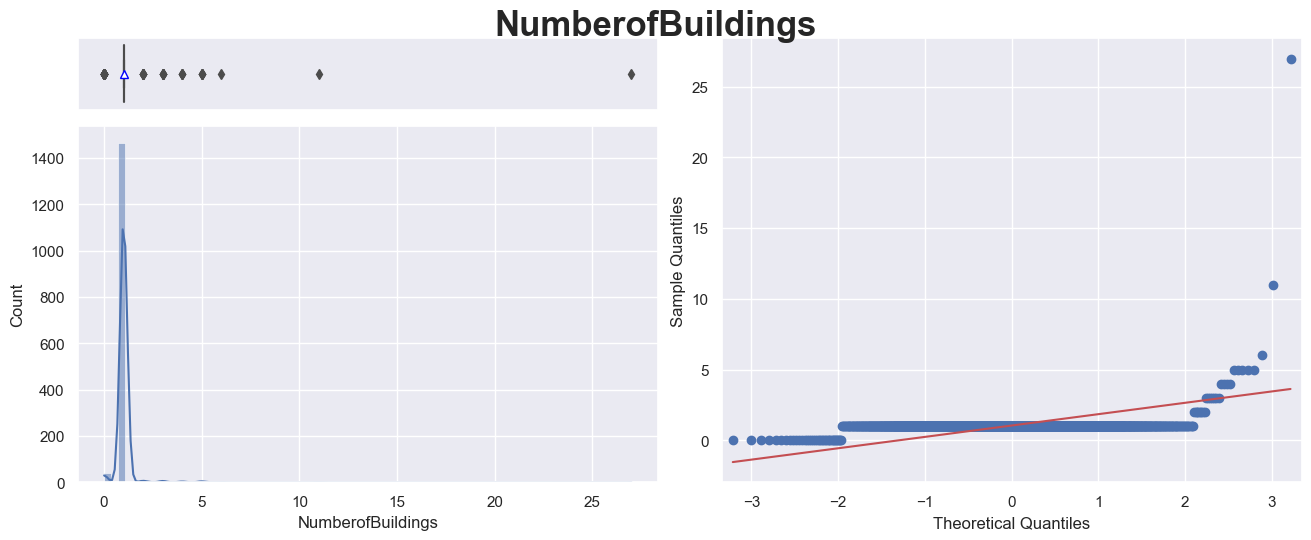


Making the Normality Test
---------------------------------


variable      normality test                              result   
0  NumberofBuildings        Shapiro-Wilk     Statistics=0.086, p-value=0.000  \
1  NumberofBuildings    D’Agostino’s K^2  Statistics=3701.656, p-value=0.000   
2  NumberofBuildings  Kolmogorov-Smirnov     Statistics=0.816, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

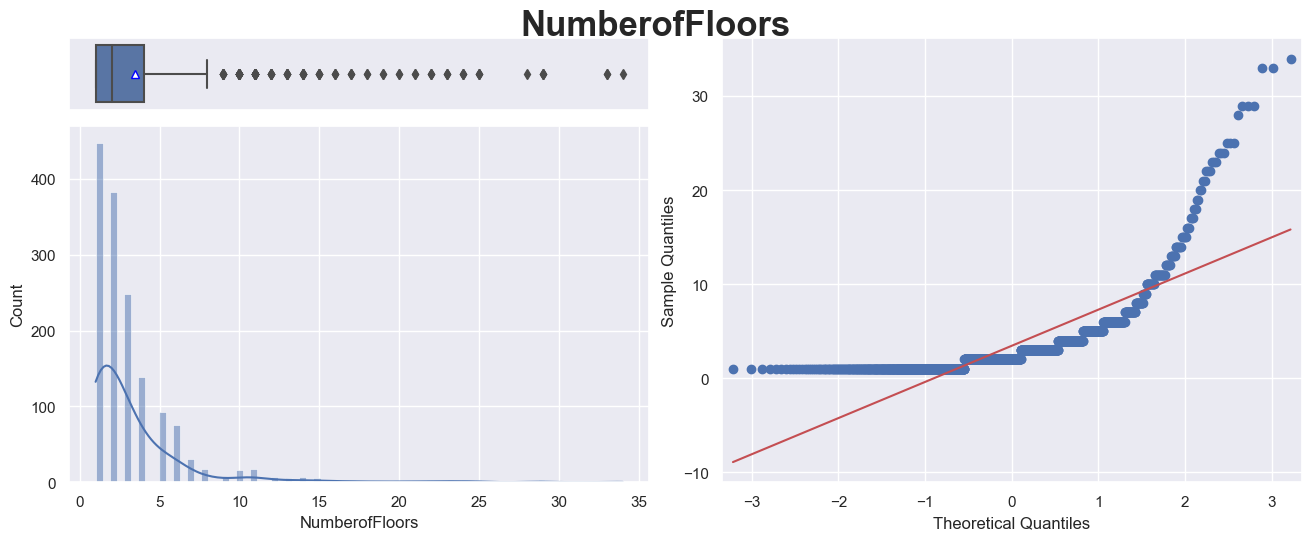


Making the Normality Test
---------------------------------


variable      normality test                              result   
0  NumberofFloors        Shapiro-Wilk     Statistics=0.600, p-value=0.000  \
1  NumberofFloors    D’Agostino’s K^2  Statistics=1231.675, p-value=0.000   
2  NumberofFloors  Kolmogorov-Smirnov     Statistics=0.841, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

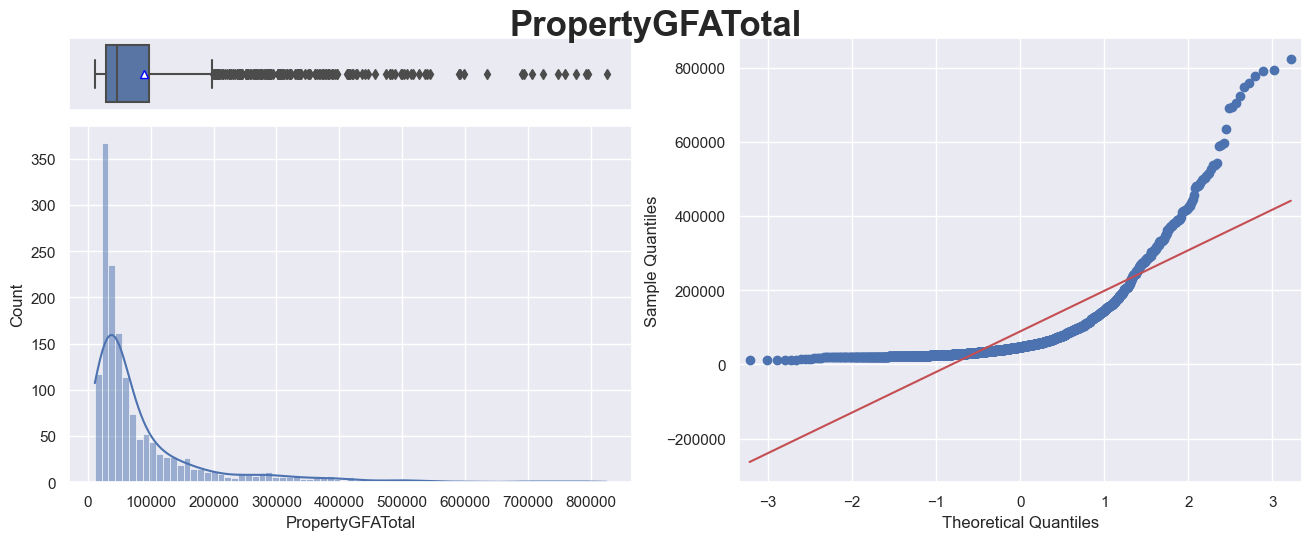


Making the Normality Test
---------------------------------


variable      normality test                              result   
0  PropertyGFATotal        Shapiro-Wilk     Statistics=0.624, p-value=0.000  \
1  PropertyGFATotal    D’Agostino’s K^2  Statistics=1021.209, p-value=0.000   
2  PropertyGFATotal  Kolmogorov-Smirnov     Statistics=1.000, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

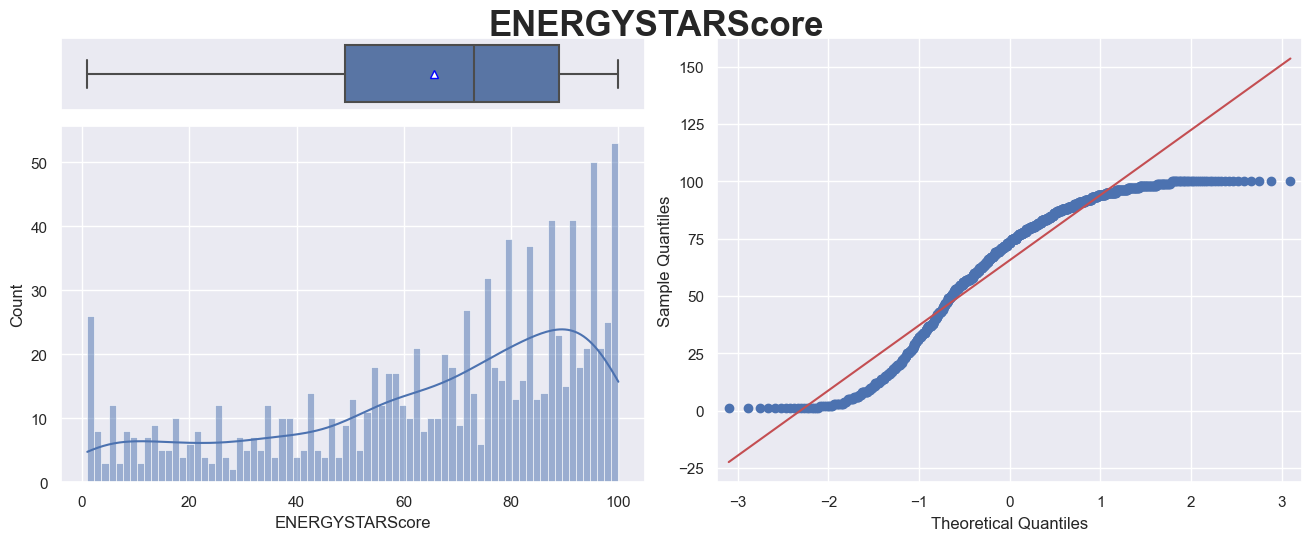


Making the Normality Test
---------------------------------


variable      normality test                             result   
0  ENERGYSTARScore        Shapiro-Wilk    Statistics=0.904, p-value=0.000  \
1  ENERGYSTARScore    D’Agostino’s K^2  Statistics=101.036, p-value=0.000   
2  ENERGYSTARScore  Kolmogorov-Smirnov    Statistics=0.973, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

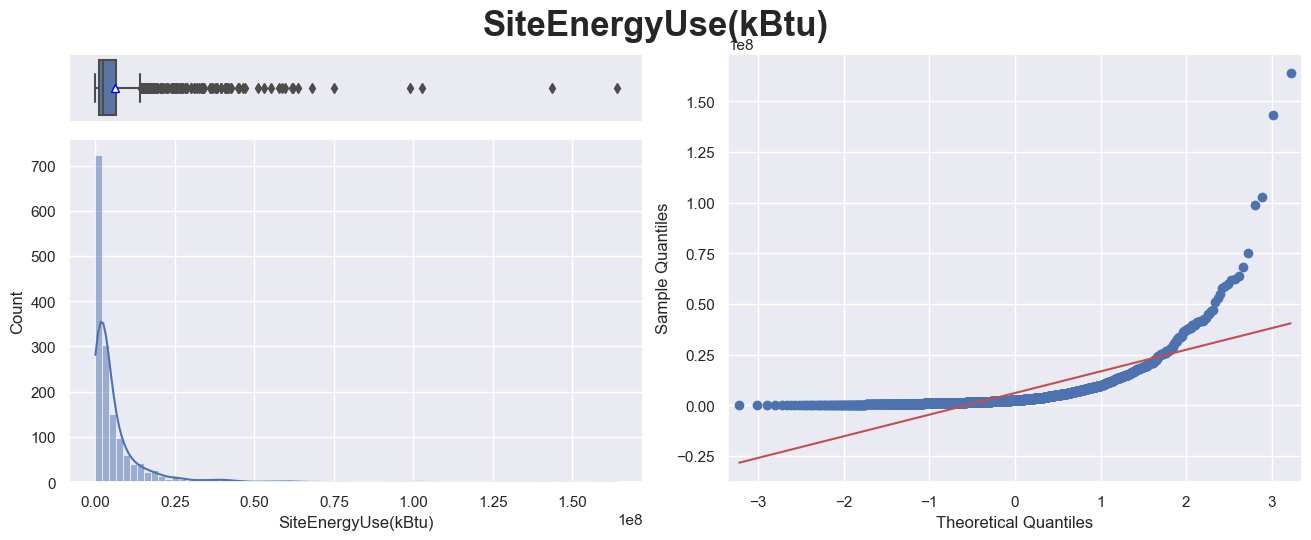


Making the Normality Test
---------------------------------


variable      normality test   
0  SiteEnergyUse(kBtu)        Shapiro-Wilk  \
1  SiteEnergyUse(kBtu)    D’Agostino’s K^2   
2  SiteEnergyUse(kBtu)  Kolmogorov-Smirnov   

                               result   
0     Statistics=0.489, p-value=0.000  \
1  Statistics=1865.047, p-value=0.000   
2     Statistics=1.000, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

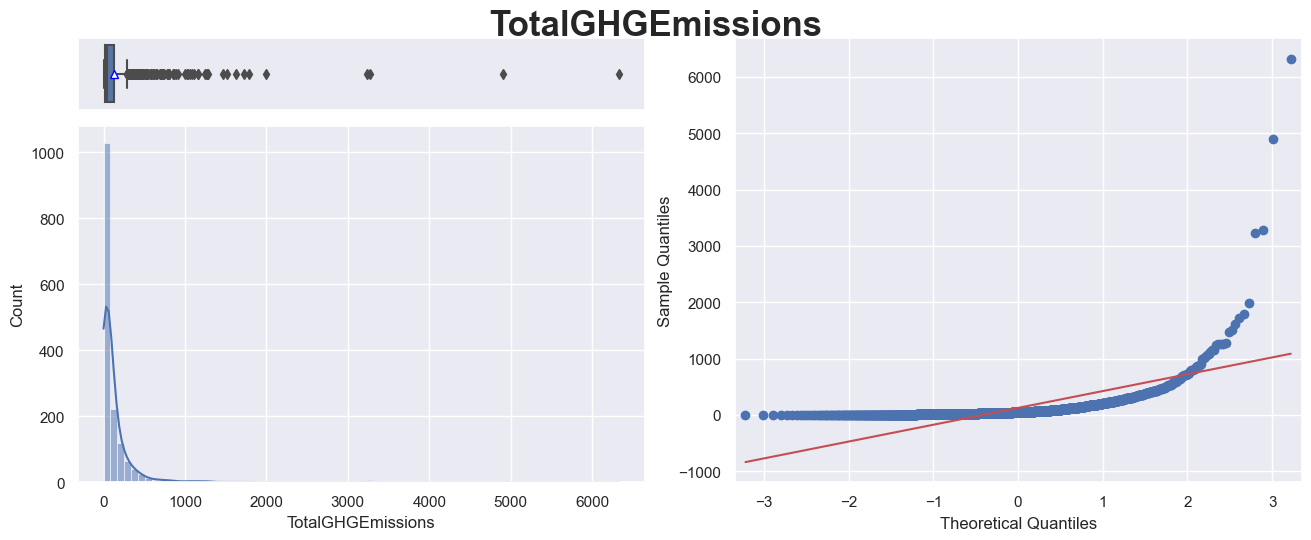


Making the Normality Test
---------------------------------


variable      normality test                              result   
0  TotalGHGEmissions        Shapiro-Wilk     Statistics=0.340, p-value=0.000  \
1  TotalGHGEmissions    D’Agostino’s K^2  Statistics=2619.080, p-value=0.000   
2  TotalGHGEmissions  Kolmogorov-Smirnov     Statistics=0.965, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

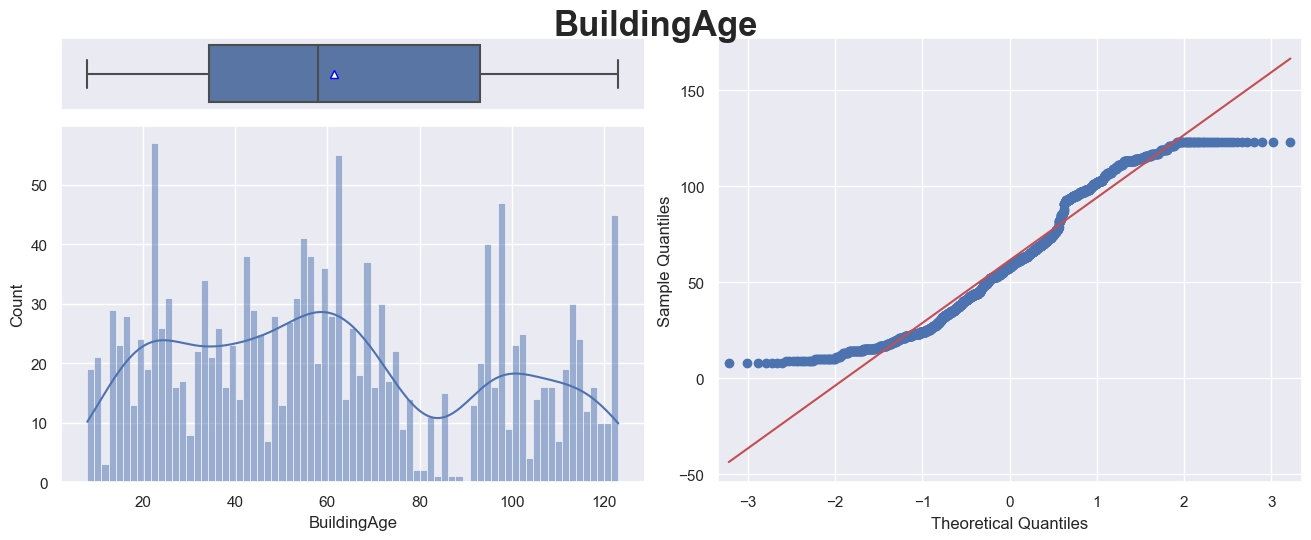


Making the Normality Test
---------------------------------


variable      normality test                             result   
0  BuildingAge        Shapiro-Wilk    Statistics=0.950, p-value=0.000  \
1  BuildingAge    D’Agostino’s K^2  Statistics=446.868, p-value=0.000   
2  BuildingAge  Kolmogorov-Smirnov    Statistics=1.000, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

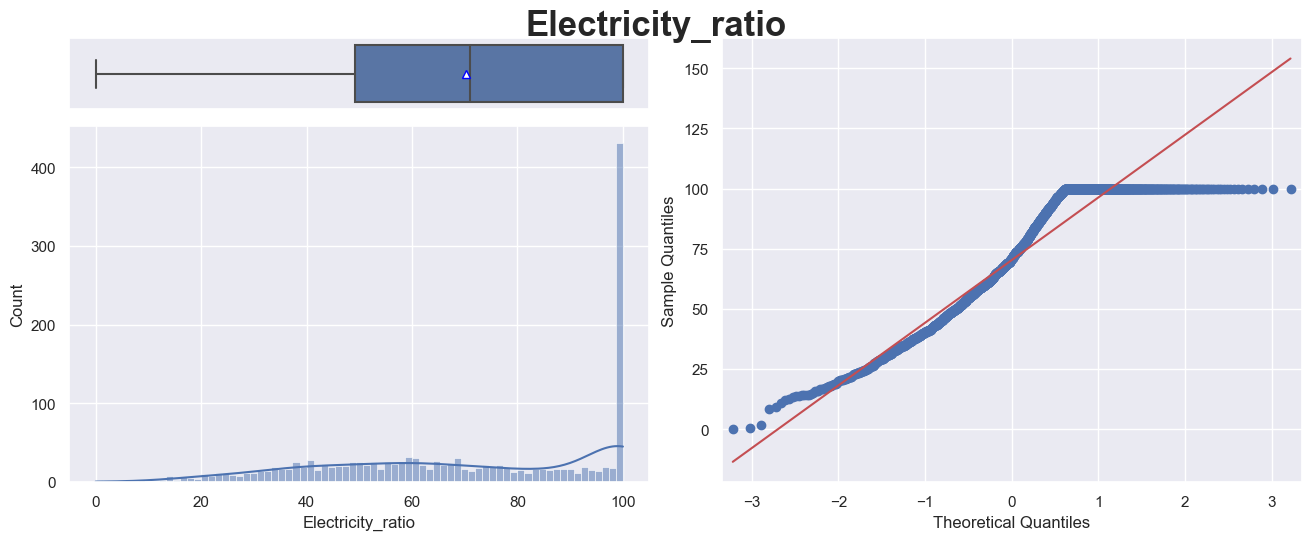


Making the Normality Test
---------------------------------


variable      normality test                             result   
0  Electricity_ratio        Shapiro-Wilk    Statistics=0.904, p-value=0.000  \
1  Electricity_ratio    D’Agostino’s K^2  Statistics=676.280, p-value=0.000   
2  Electricity_ratio  Kolmogorov-Smirnov    Statistics=0.998, p-value=0.000   

                                  hypothesis  
0  Sample does not look Gaussian (reject H₀)  
1  Sample does not look Gaussian (reject H₀)  
2  Sample does not look Gaussian (reject H₀)

In [94]:
for var in NUMERIC_COLS_APP:
    
    # We are going to work only with the rows without missing-values for the features
    df_subset = pd.DataFrame(nrj[nrj[[var]].notnull().all(axis=1)]).reset_index(drop=True)
    
    fig = plt.figure(constrained_layout=True, figsize=[13,5])
    fig.suptitle(var, size=25, fontweight="bold", y=1.05)
    spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1], height_ratios=[1, 5])

    ax_box = fig.add_subplot(spec[0, 0])
    ax_hist = fig.add_subplot(spec[1, 0])
    ax_qqplot = fig.add_subplot(spec[:, 1])

    # Boxplot
    boxplot = sns.boxplot(data=df_subset, x=df_subset[var], showmeans=True, ax=ax_box,
                          meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
    ax_box.set(xlabel="", xticks=[])
    ax_box.set(yticks=[])
    boxplot.set_title("")

    # Histplot
    sns.histplot(data=df_subset, x=df_subset[var], bins=75,  kde=True,  ax=ax_hist)
    ax_hist.set(xlabel=var)
    
    # QQplot
    qqplot(df_subset[var], line='s', ax=ax_qqplot)

    plt.savefig("img/qqplot-of-" + var + ".png")
    plt.show()

    print("\nMaking the Normality Test")
    print("---------------------------------")
    normality_test(df_subset[[var]])
    print("\n")

In [95]:
pd.reset_option("display.max_colwidth") # reset width of showing cols

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. Continuous Variables Transformation</h3>
</div>
<br>
<div class="alert alert-block alert-info">
     Based on the <b>Univariate analysis</b> where we note that <b>none</b> of the analyzed numeric variables have a <b>Normal distribution</b>
     and <b>all their values are very close</b> so, we are going to apply the <b>Logarithmic transformation</b> in these variables to get a <b>better Normal distribution</b> of these values
</div>

In [96]:
for col in NUMERIC_COLS_APP:
    nrj[col + "_log"] = np.log(nrj[col] + 1)
    nrj[col + "_log2"] = np.log2(nrj[col] + 1)
    nrj[col + "_log10"] = np.log10(nrj[col] + 1)

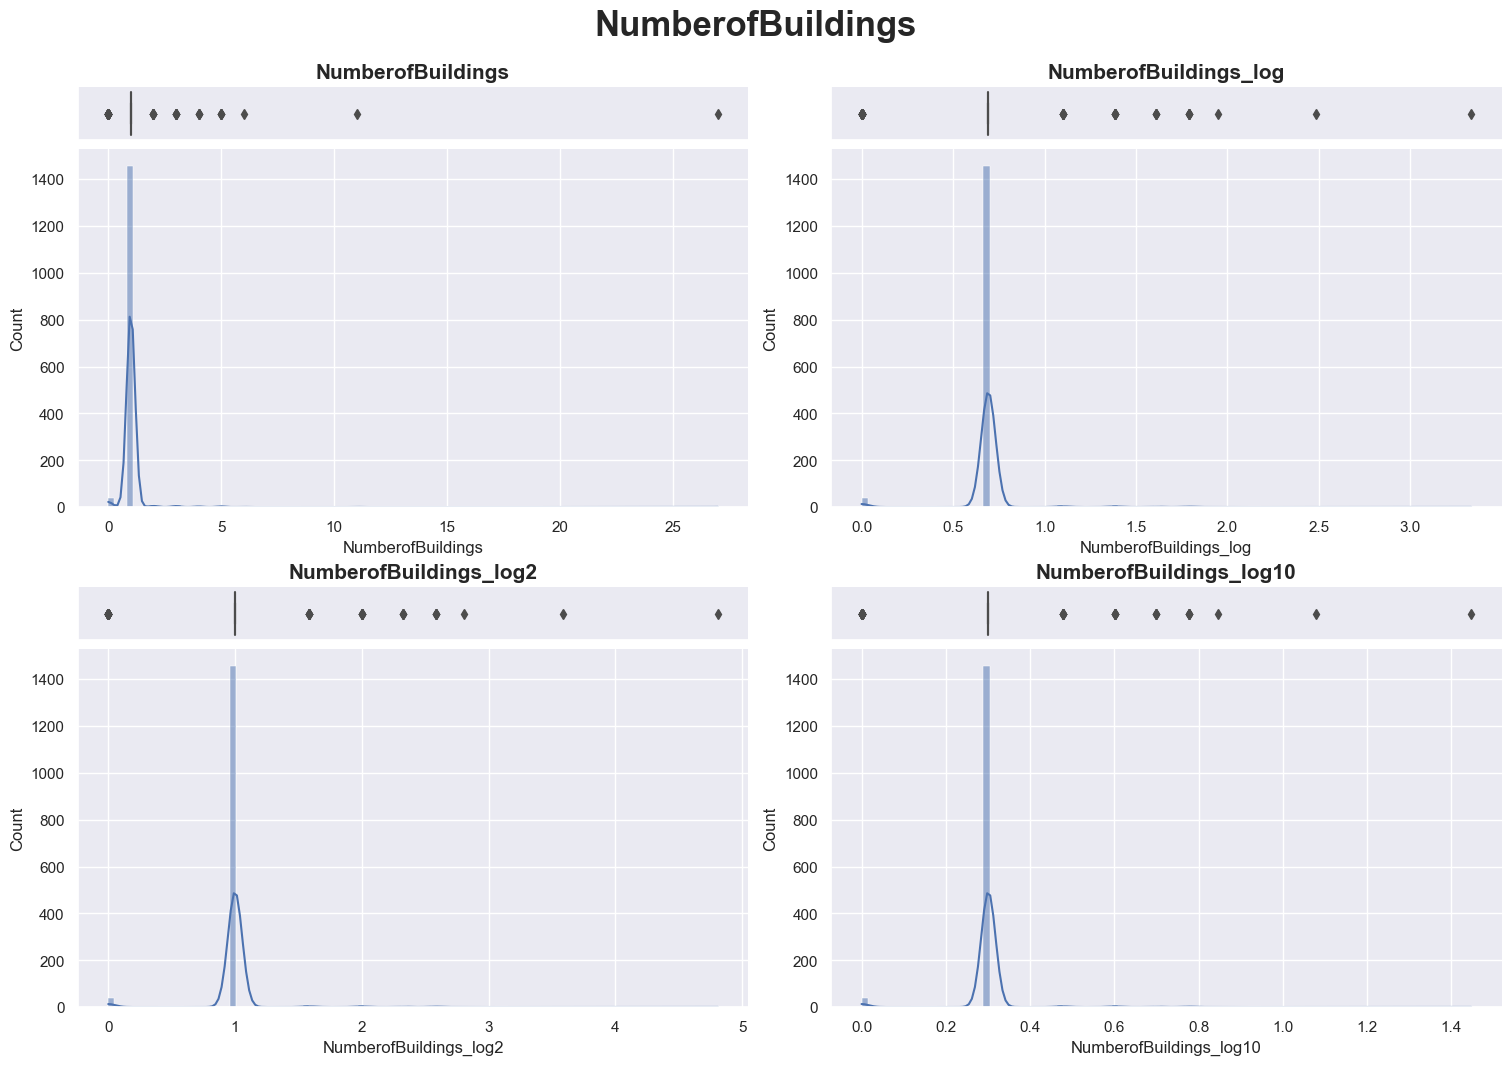


Variance of NumberofBuildings
------------------------------------


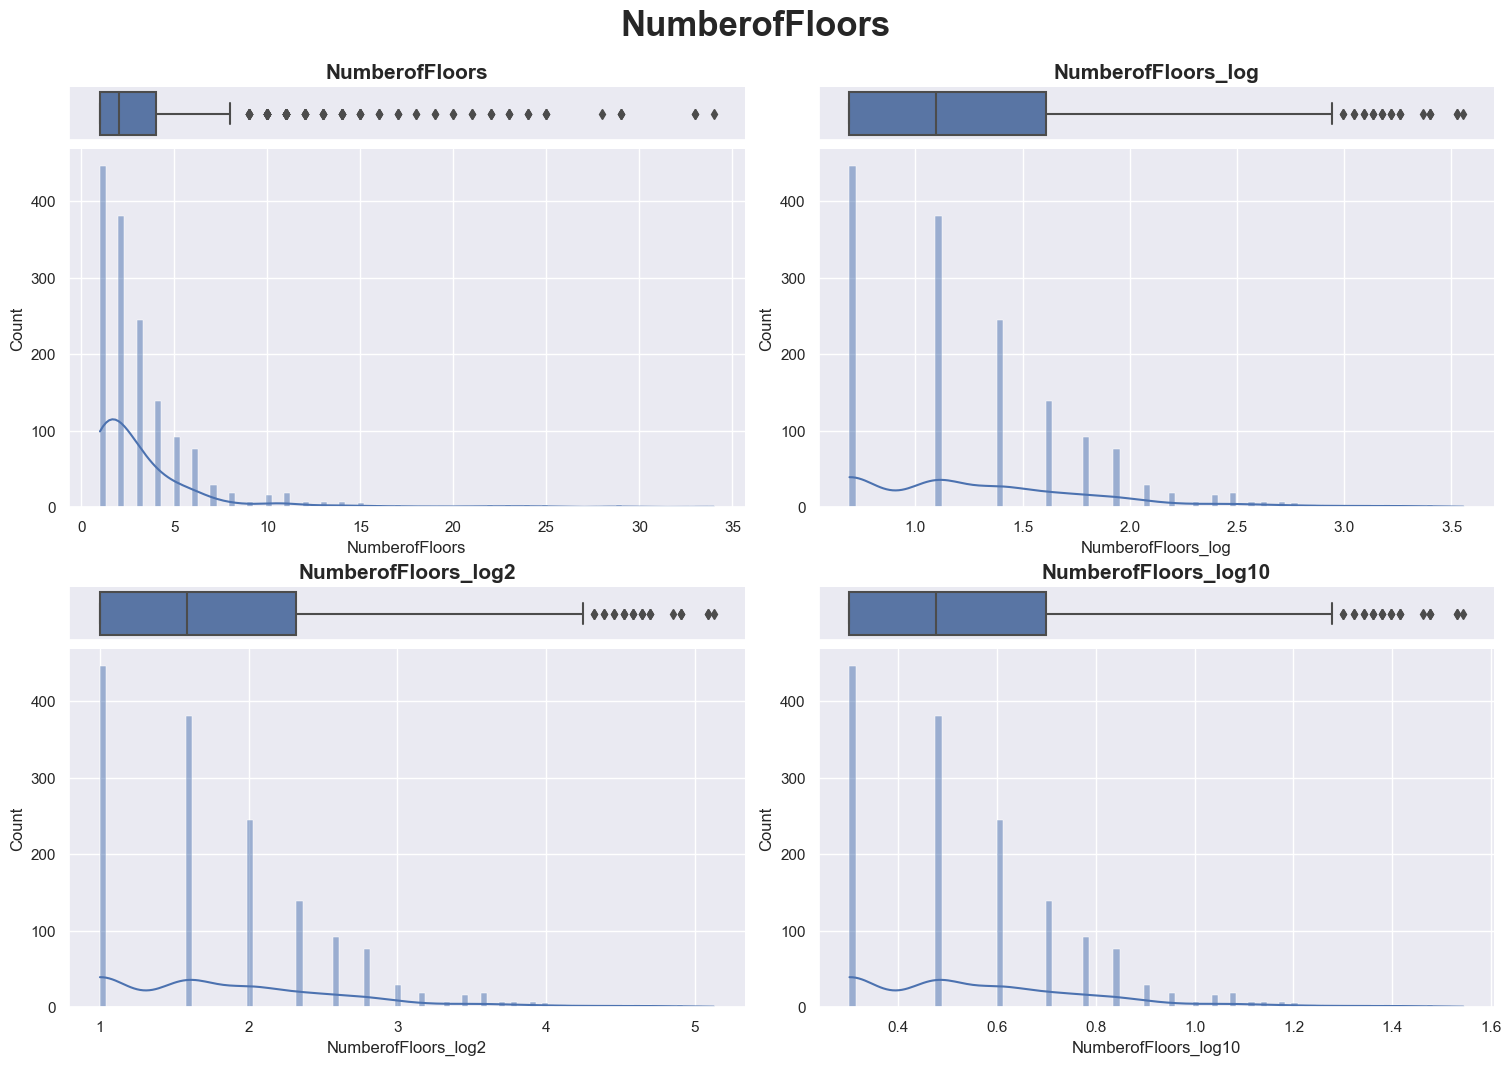


Variance of NumberofFloors
------------------------------------


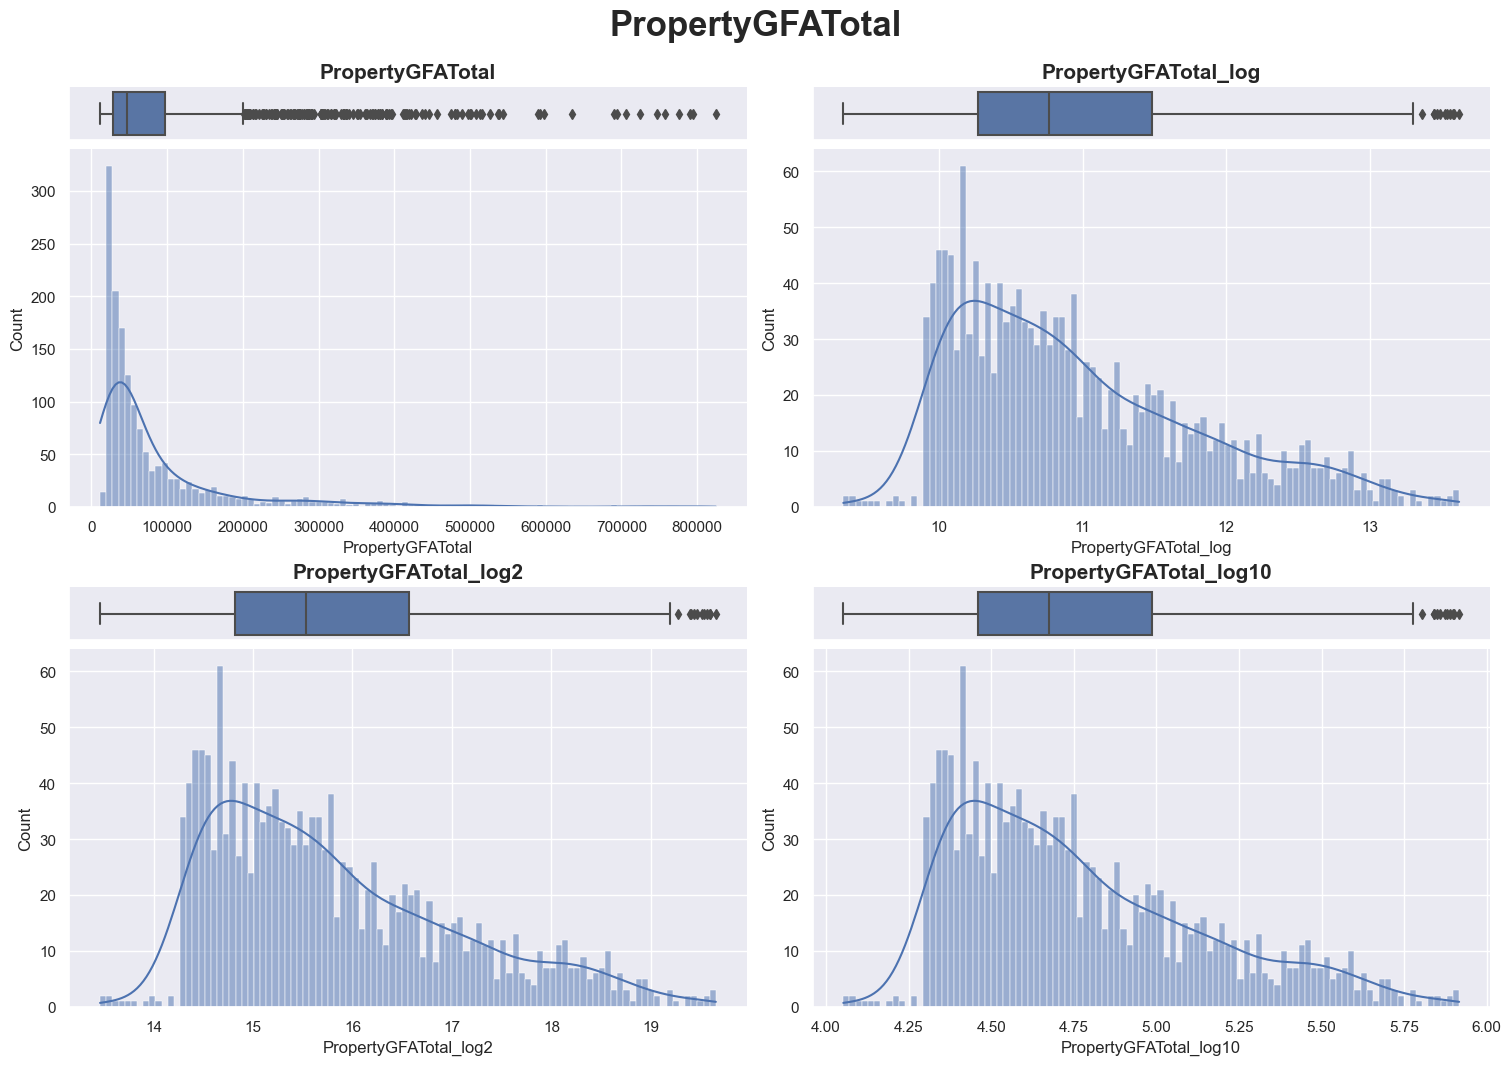


Variance of PropertyGFATotal
------------------------------------


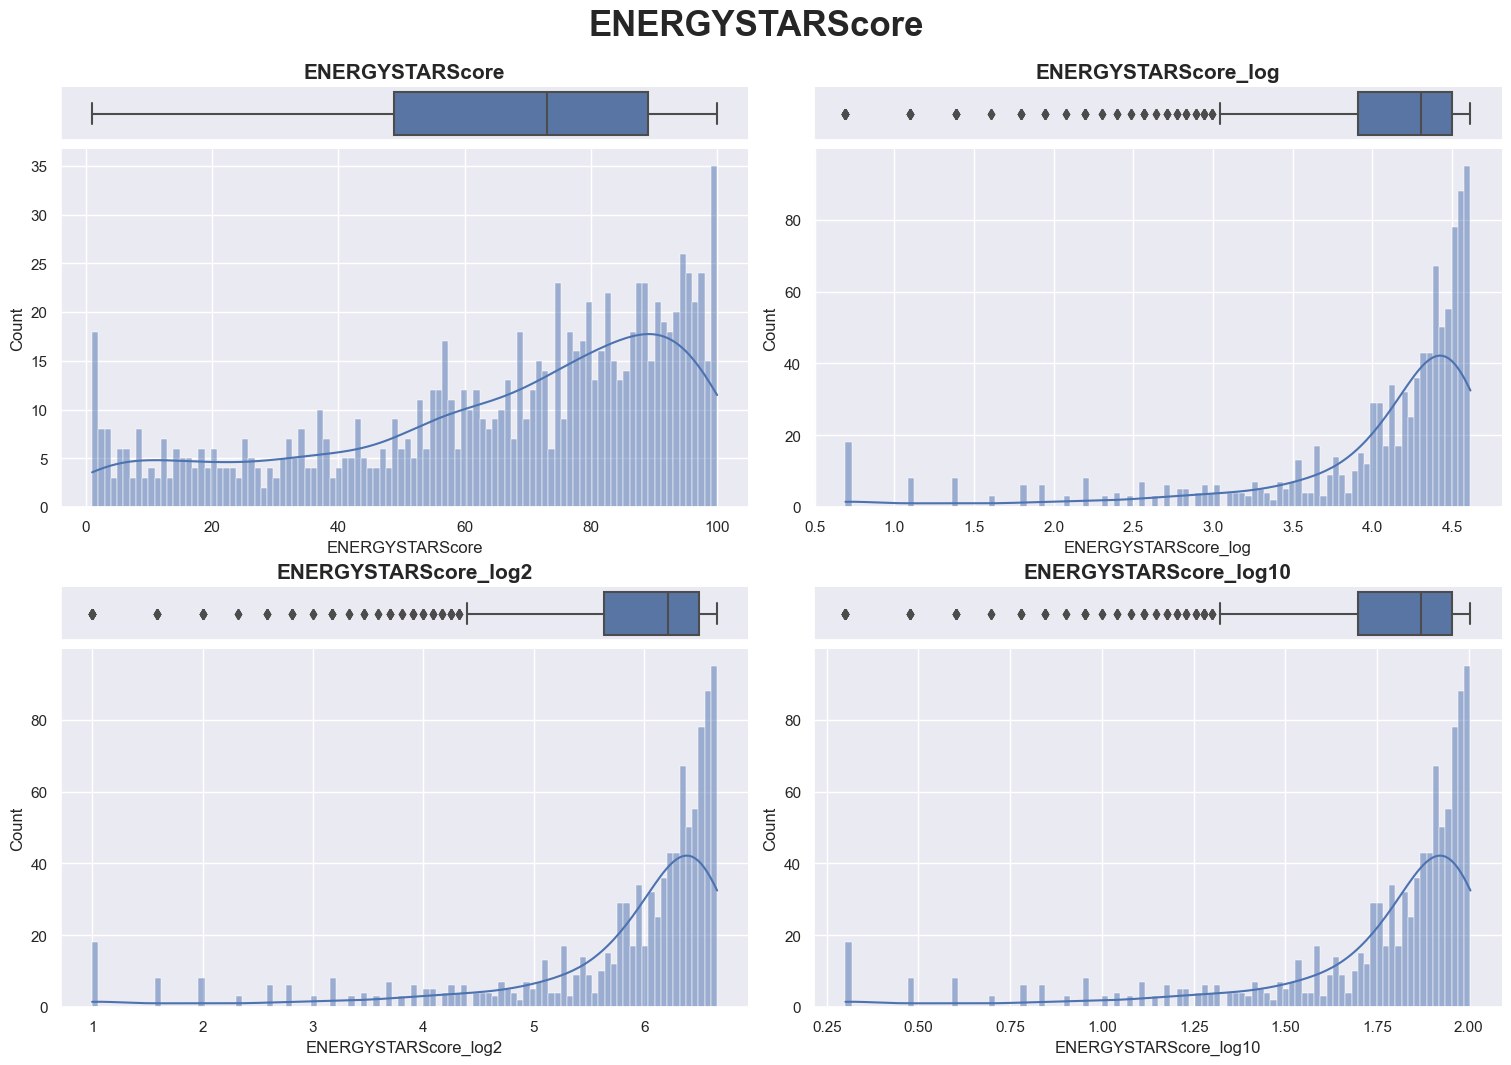


Variance of ENERGYSTARScore
------------------------------------


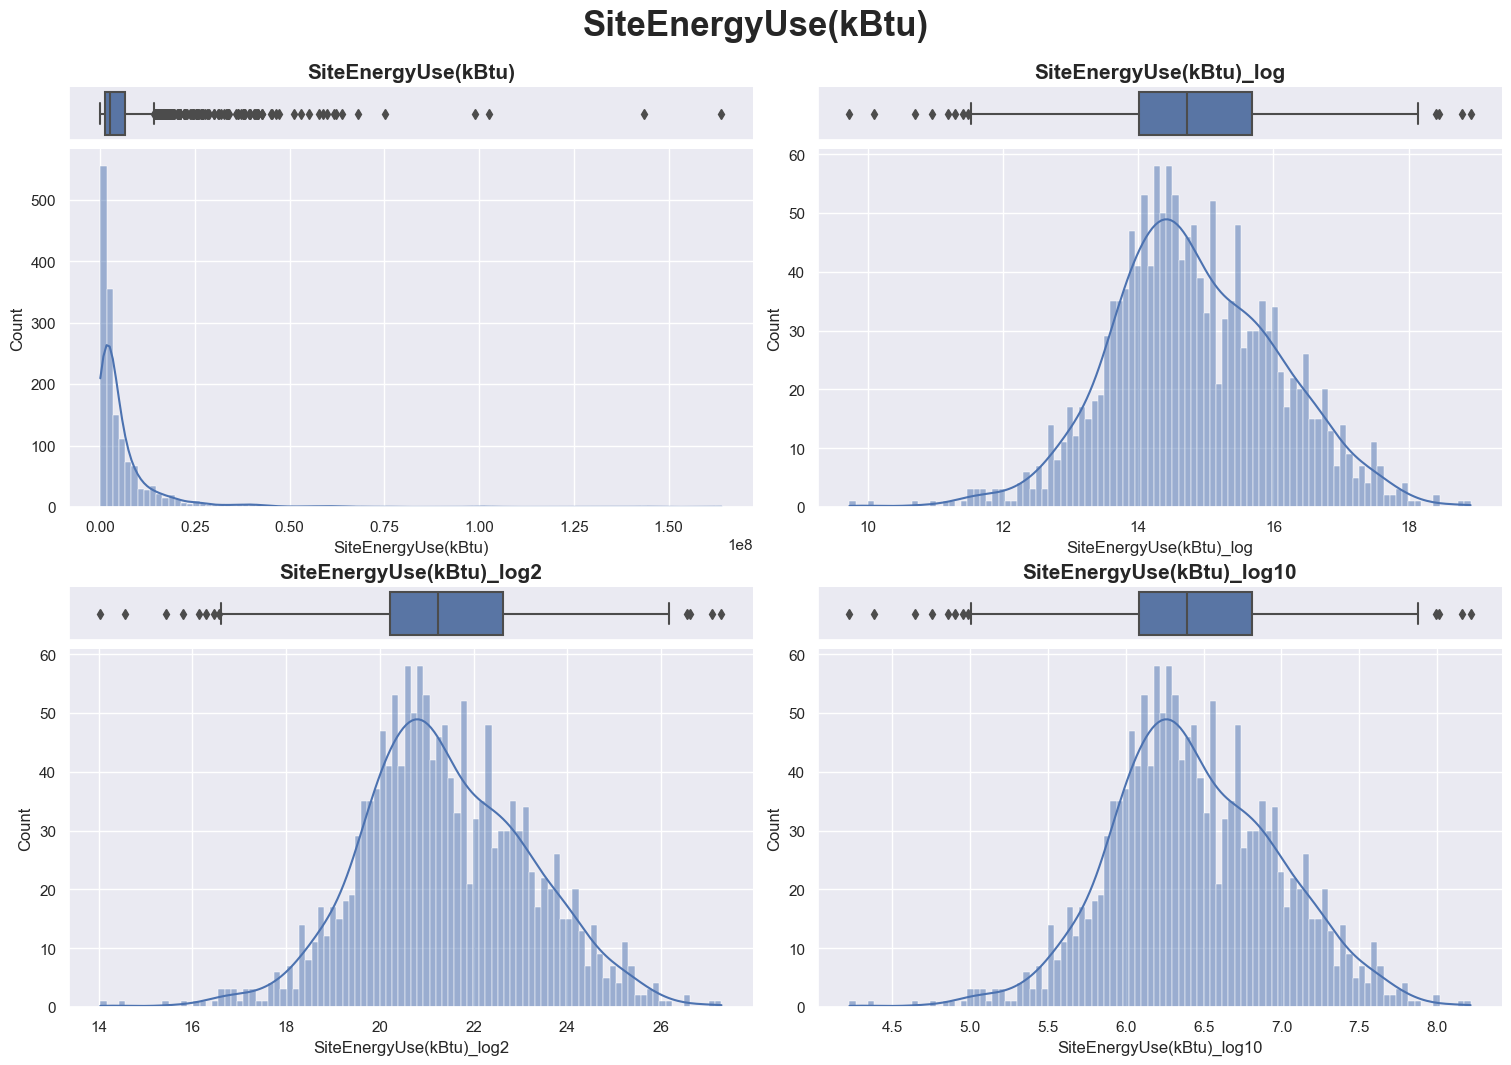


Variance of SiteEnergyUse(kBtu)
------------------------------------


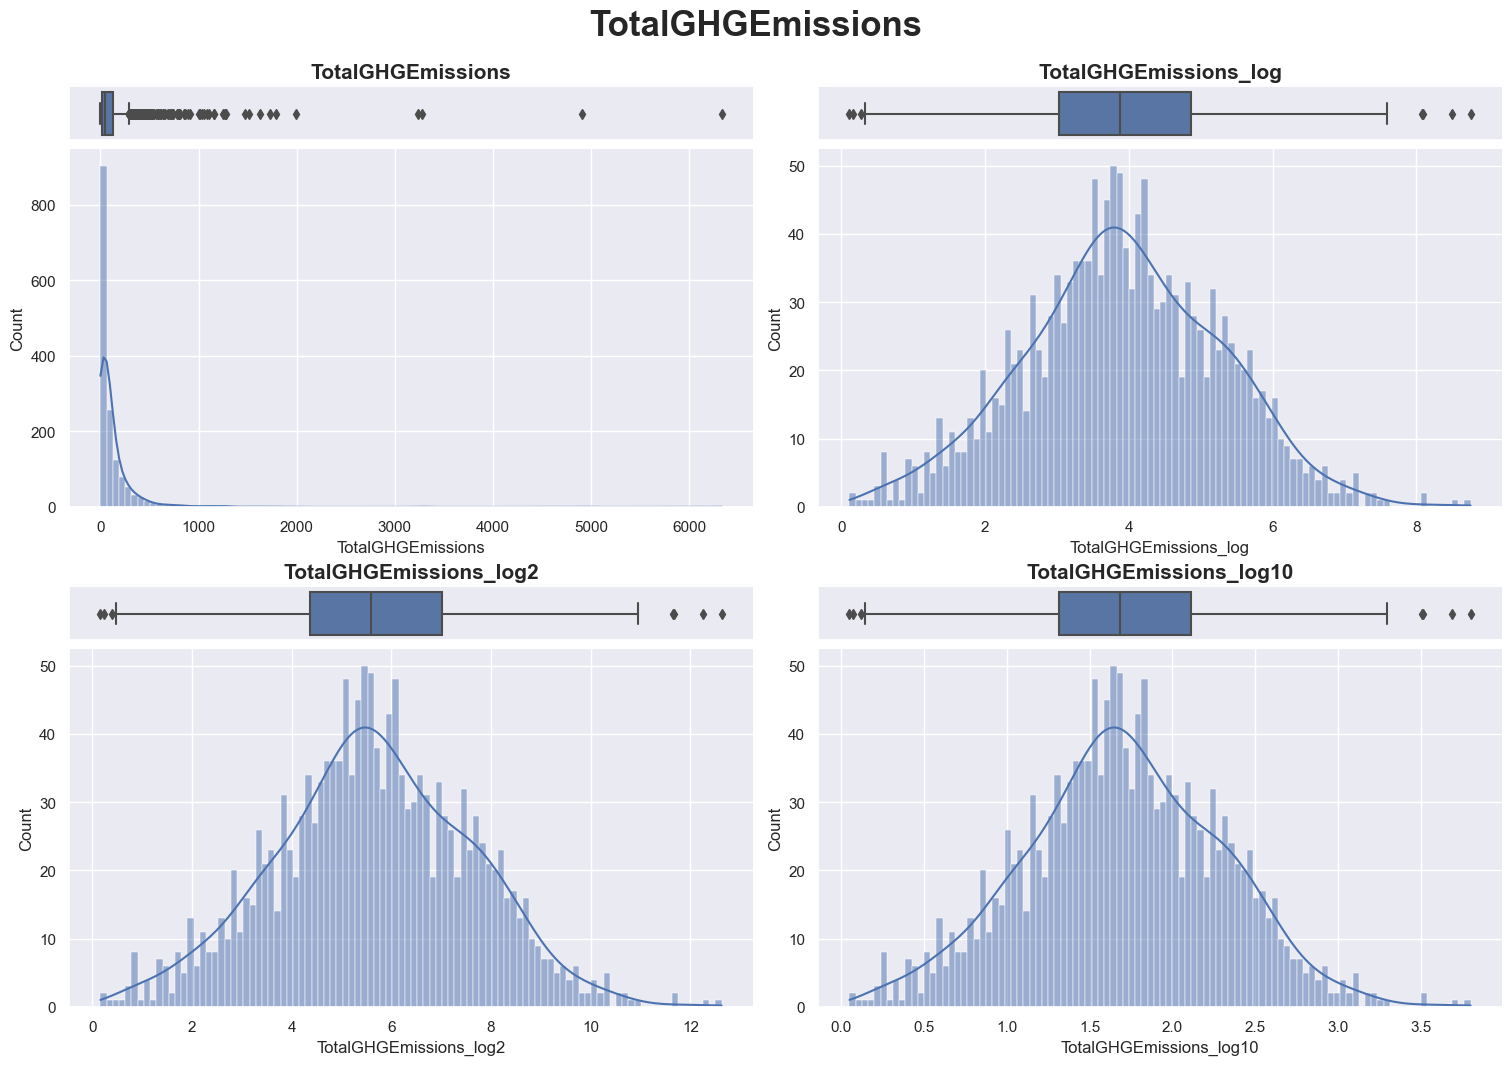


Variance of TotalGHGEmissions
------------------------------------


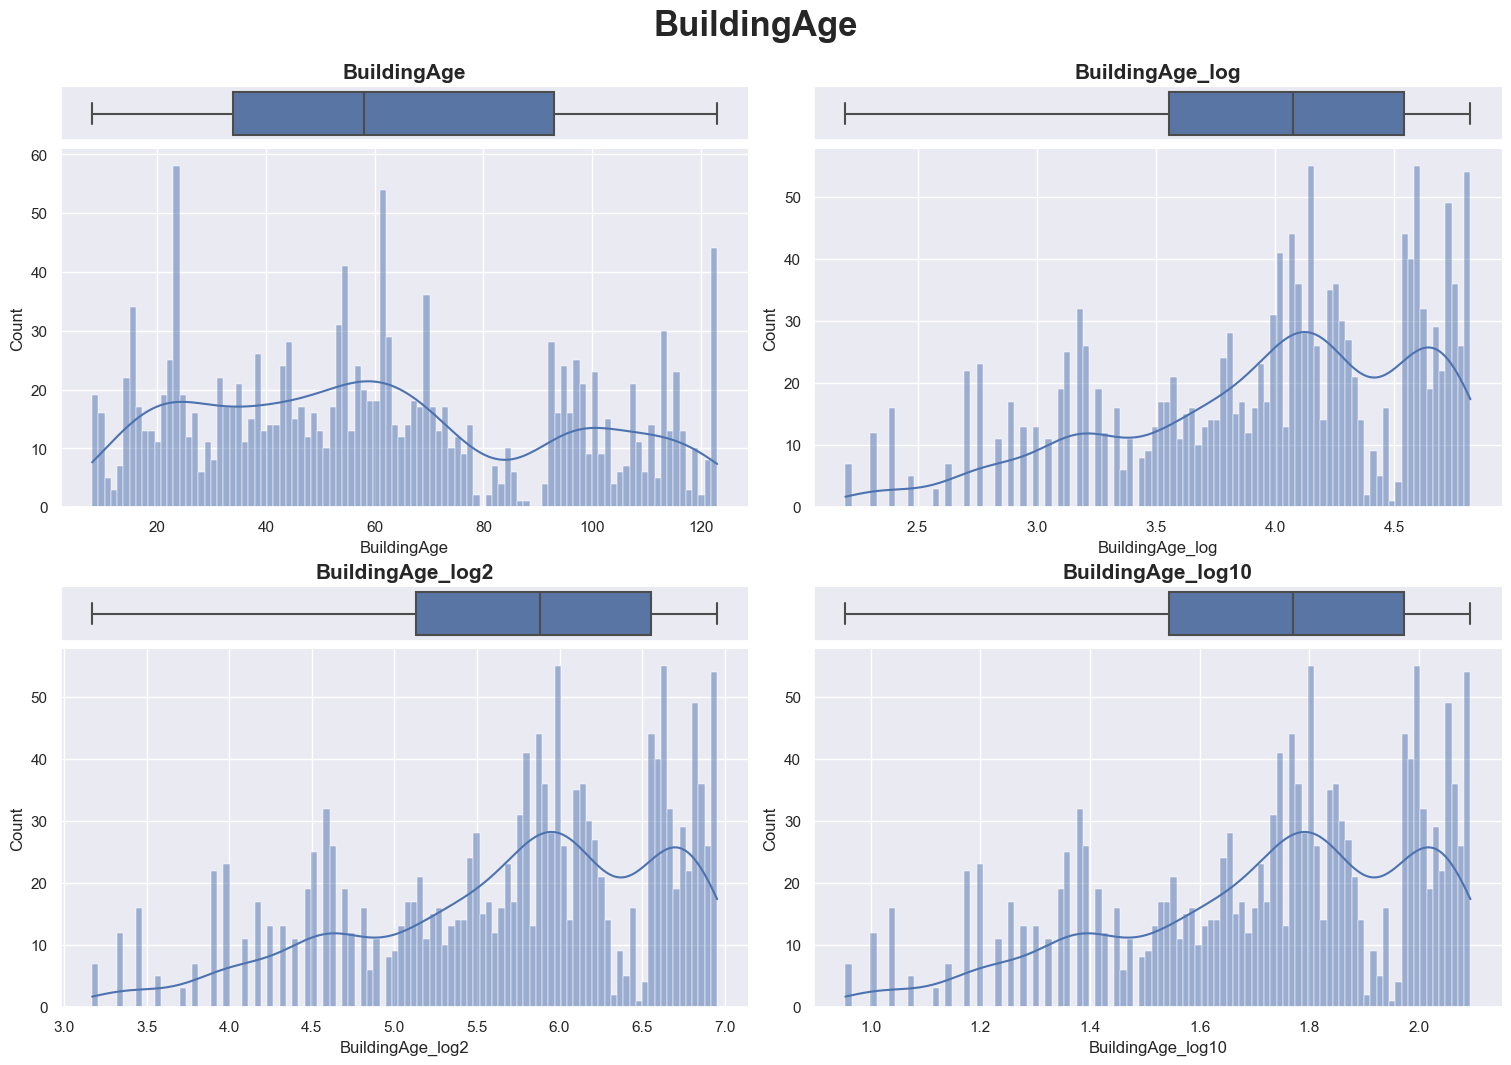


Variance of BuildingAge
------------------------------------


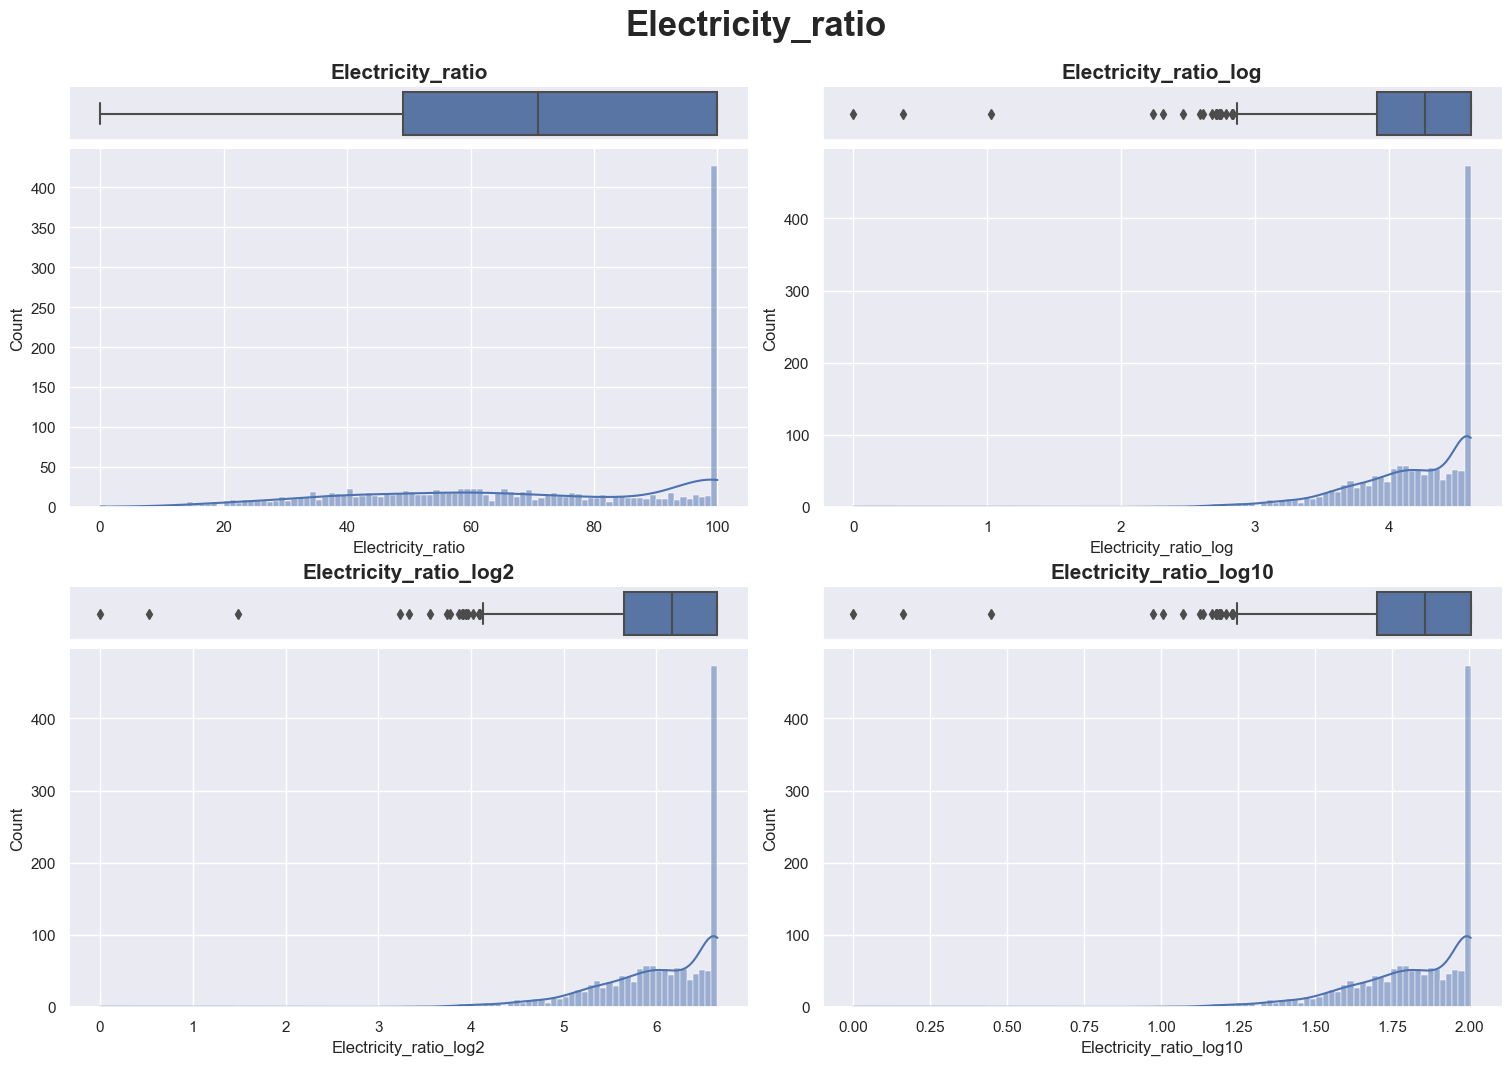


Variance of Electricity_ratio
------------------------------------


In [97]:
for var in NUMERIC_COLS_APP:
    
    # We are going to work only with the rows without missing-values for the features
    df_subset = pd.DataFrame(nrj[nrj[[col]].notnull().all(axis=1)]).reset_index(drop=True)
    
    var_cols = [var + "", var + "_log", var + "_log2", var + "_log10"]
    
    fig = plt.figure(constrained_layout=True, figsize=[15,10])
    fig.suptitle(var, size=25, fontweight="bold", y=1.05)
    spec = fig.add_gridspec(ncols=2, nrows=4, width_ratios=[1,1], height_ratios=[0.3,2,0.3,2])
    
    # to cycle through the columns 
    col_boxplot, col_histplot = 0, 0
    
    for i in range(4):
        
        for j in range(2):
            
            if i % 2 == 0:
                
                if col_boxplot > len(var_cols) - 1:
                    break
                    
                ax_box = fig.add_subplot(spec[i, j])
                boxplot = sns.boxplot(data=df_subset, x=var_cols[col_boxplot], ax=ax_box)
                
                # Remove x axis name for the boxplot
                ax_box.set(xlabel="", xticks=[])
                ax_box.set(yticks=[])
                
                boxplot.set_title(var_cols[col_boxplot], fontdict={ "fontsize": 15, "fontweight": "bold" })
                
                col_boxplot += 1
                
            elif i % 2 != 0:
                
                if col_histplot > len(NUMERIC_COLS_APP) - 1:
                    break
                
                ax_hist = fig.add_subplot(spec[i, j])
                sns.histplot(data=df_subset, x=var_cols[col_histplot], bins=100,  kde=True,  ax=ax_hist)
                ax_hist.set(xlabel=var_cols[col_histplot])
                
                col_histplot += 1
    
    plt.savefig("img/transformation-" + var + ".png", bbox_inches="tight")
    sns.despine(fig)  
    plt.show()
    
    print("\nVariance of", var)
    print("------------------------------------")
    var_cols.remove(var)
    df_temp = pd.DataFrame(nrj[var_cols].var(), columns=["variance"])
    display(df_temp.style.apply(highlight_max))
    print("\n")

<div class="alert alert-block alert-success">
    <b>Observations / Conclusions</b><br><br>
    Based on the description of data and distribution plot before and after transformation, we can notice the following
    <ul style="list-style-type: square;">
        <li>Some features <b>cannot achieve</b> a normal distribution due to much of their data is composed by the same number.<br> 
             So, we are going to <b>exclude</b> these features from the transformation. </li>
            <ul style="list-style-type: disc;">
                <li>NumberofBuildings</li>
                <li>NumberofFloors</li>
                <li>BuildingAge</li>
                <li>Electricity_ratio</li>
                <li>ENERGYSTARScore</li> 
            </ul>  
        <li>For the others features, we are going to work with <b>log_2</b> because is the <b>highest variance</b></li>
            <ul style="list-style-type: disc;">
                <li>PropertyGFATotal</li>            
                <li>SiteEnergyUse(kBtu)</li>
                <li>TotalGHGEmissions</li>
            </ul>  
    </ul>  
</div>

<div class="alert alert-block alert-info">
     Deleting the columns differents to "_log2" and ordering columns
</div>

In [98]:
COL_TO_DELETE = []
for col in nrj.columns:
    if "_log" in nrj[col].name and "_log2" not in nrj[col].name:
        COL_TO_DELETE.append(nrj[col].name)
        
for col in ["NumberofBuildings", "NumberofFloors", "BuildingAge", "Electricity_ratio", "ENERGYSTARScore"]:
    COL_TO_DELETE.append(nrj[col + "_log2"].name)
    
for col in ["PropertyGFATotal", "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]:
    COL_TO_DELETE.append(nrj[col].name)
    
nrj.drop(labels=COL_TO_DELETE, axis=1, inplace=True)

In [99]:
for col in nrj.columns:
    if "log" in col:
        nrj[col[:-5]] = nrj[col]
        del nrj[col]

In [100]:
COL_ORDERED = ["OSEBuildingID", "Neighborhood", "BuildingAge", "NumberofFloors", "NumberofBuildings", 
               "PropertyGFATotal", "renamed_PropertyType", "Electricity_ratio", "NaturalGas", "SteamUse", 
               "ENERGYSTARScore", "SiteEnergyUse(kBtu)", "TotalGHGEmissions"
]

In [101]:
nrj = nrj[COL_ORDERED]

In [102]:
nrj.head()

OSEBuildingID Neighborhood  BuildingAge  NumberofFloors  NumberofBuildings   
0              1     DOWNTOWN         96.0            12.0                1.0  \
1              2     DOWNTOWN         27.0            11.0                1.0   
2              5     DOWNTOWN         97.0            10.0                1.0   
3              8     DOWNTOWN         43.0            18.0                1.0   
4             10     DOWNTOWN         97.0            11.0                1.0   

   PropertyGFATotal renamed_PropertyType  Electricity_ratio  NaturalGas   
0         16.432330                Hotel           54.60599        True  \
1         16.660205                Hotel           38.66091        True   
2         15.904094                Hotel           40.75193        True   
3         17.421777                Hotel           37.88017        True   
4         16.340980                Hotel           48.81603        True   

   SteamUse  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  
0      True             60.0            22.784838           7.971429  
1     False             61.0            22.999884           8.213639  
2      True             56.0            22.695954           8.167067  
3     False             75.0            23.756602           8.983022  
4     False             27.0            22.457336           7.468746

In [103]:
df_analysis(nrj, "nrj", type_analysis="complete")


Analysis of df_bebcs dataset
--------------------------------------------------------------------
- Dataset shape:                  1558 rows and 13 columns
- Total of NaN values:            603
- Percentage of NaN:              2.98 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 116.8 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN   
0          OSEBuildingID     int64     1558    1558      0  0.00000  \
1           Neighborhood  category     1558      13      0  0.00000   
2            BuildingAge   float64     1558     113      0  0.00000   
6   renamed_PropertyType  category     1558       8      0  0.00000   
8             NaturalGas      bool     1558       2      0  0.00000   
9               SteamUse      bool     1558       2      0  0.00000   
11   SiteEnergyUse(kBtu)   float64     1558    1558      0  0.00000   
12     TotalGHGEmissions   float64     1558    1493      0  0.00000   
5       PropertyGFATotal   float64     1550    1478      8  0.51000   
7      Electricity_ratio   float64     1550    1198      8  0.51000   
3         NumberofFloors   float64     1531      29     27  1.73000   
4      NumberofBuildings   float64     1529       9     29  1.86000   
10       ENERGYSTARScore   float64     1027     100    531 34.08000   

          mean      min       25%         50%         75%         max   
0  16570.11874  1.00000 609.25000 21218.50000 24599.75000 50226.00000  \
1          NaN      NaN       NaN         NaN         NaN         NaN   
2     61.45122  8.00000  34.25000    58.00000    93.00000   123.00000   
6          NaN      NaN       NaN         NaN         NaN         NaN   
8          NaN      NaN       NaN         NaN         NaN         NaN   
9          NaN      NaN       NaN         NaN         NaN         NaN   
11    21.39427 14.03702  20.21818    21.23695    22.61357    27.28865   
12     5.63968  0.16350   4.37156     5.59455     7.00982    12.62843   
5     15.81613 13.46225  14.81592    15.52732    16.56210    19.65384   
7     70.27322  0.00009  49.13222    70.97093    99.99980   100.00113   
3      3.45460  1.00000   1.00000     2.00000     4.00000    34.00000   
4      1.03728  0.00000   1.00000     1.00000     1.00000    27.00000   
10    65.56475  1.00000  49.00000    73.00000    89.00000   100.00000   

           std  
0  13619.98338  
1          NaN  
2     32.65890  
6          NaN  
8          NaN  
9          NaN  
11     1.78609  
12     1.97494  
5      1.22763  
7     26.04112  
3      3.84772  
4      0.80447  
10    28.38912

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. Treating missing-values</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. Train/Test split</h3>
</div>

<div class="alert alert-block alert-info">
    Selecting only the rows without missing-values
</div>

In [104]:
df_subset = pd.DataFrame(nrj[nrj[["Electricity_ratio", "NumberofBuildings", "PropertyGFATotal", "NumberofFloors"]].notnull().all(axis=1)]).reset_index(drop=True)

In [105]:
df_subset.drop(columns=["ENERGYSTARScore", "OSEBuildingID"], axis=1, inplace=True)

In [106]:
df_analysis(df_subset, "df_subset")


Analysis of df_subset dataset
--------------------------------------------------------------------
- Dataset shape:                  1493 rows and 11 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 88.6 KB )
--------------------------------------------------------------------


name      type  records  # NaN   % NaN
0           Neighborhood  category     1493      0 0.00000
1            BuildingAge   float64     1493      0 0.00000
2         NumberofFloors   float64     1493      0 0.00000
3      NumberofBuildings   float64     1493      0 0.00000
4       PropertyGFATotal   float64     1493      0 0.00000
5   renamed_PropertyType  category     1493      0 0.00000
6      Electricity_ratio   float64     1493      0 0.00000
7             NaturalGas      bool     1493      0 0.00000
8               SteamUse      bool     1493      0 0.00000
9    SiteEnergyUse(kBtu)   float64     1493      0 0.00000
10     TotalGHGEmissions   float64     1493      0 0.00000

<div class="alert alert-block alert-info">
    <b>Slipt</b> the dataset into <b>train</b> and <b>test</b>.</br> We are goint to work with the configuration below
    <ul style="list-style-type: square;">
        <li>Spliting the dataset without missing-values into <b>70% training dataset</b> and <b>30% testing dataset</b></li>
        <li>Create a <b>copy</b> dataset based on <b>testing dataset</b></li>
        <li><b>To assign NaN 90%</b> of data for <b>Electricity_ratio</b>, <b>PropertyGFATotal</b> and <b>NumberofFloors</b> columns in the <b>copy</b> dataset based on <b>testing dataset</b></li>
        <li><b>Concatenating</b> the <b>training dataset</b> with <b>testing dataset (with 100% of NaN in testing dataset)</b> to make the <b>transform()</b></li>
    </ul>
</div>

In [107]:
test_features_nan = { "electricity" : "Electricity_ratio", "gfa_total" : "PropertyGFATotal", "number_floors" : "NumberofFloors", "number_buildings" : "NumberofBuildings"}

In [123]:
for item in test_features_nan.keys():
    globals()["train_" + item], globals()["test_" + item] = train_test_split(df_subset, test_size=0.3, random_state=0)
    globals()["test_NaN_" + item] = globals()["test_" + item].copy()
    globals()["test_NaN_" + item][test_features_nan.get(item)] = globals()["test_NaN_" + item][test_features_nan.get(item)].mask(np.random.random(globals()["test_NaN_" + item].shape[0]) < 0.99)
    
    globals()["test_" + item].loc[:, "Data"] = "Original"

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.2. Data preprocessing</h3>
</div>

In [124]:
def custom_combiner(feature, category):
    if feature=='Neighborhood':
        return "N_" + str(category)
    elif feature=='renamed_PropertyType':
        return "PT_" + str(category)
    else:
        return str(feature) + '_' + str(category)
    
ohe = OneHotEncoder(feature_name_combiner=custom_combiner, sparse_output=False, drop="first") #

In [125]:
scaler = StandardScaler()

In [126]:
for item in test_features_nan.keys():
    # item = 'electricity'
    for df_type in ["train_", "test_NaN_"]:
        # df_type = "train_"
        # Making OneHotEncoder on categorical columns
        array_ohe = ohe.fit_transform(globals()[df_type + item][["Neighborhood", "renamed_PropertyType"]])
        df_ohe = pd.DataFrame(array_ohe, index=globals()[df_type + item].index)
        df_ohe.columns = ohe.get_feature_names_out()

        # Droping the real columns and concatenating the encoder columns
        globals()[df_type + item] = globals()[df_type + item].drop(columns=["Neighborhood", "renamed_PropertyType"], axis=1)
        globals()[df_type + item] = pd.concat([globals()[df_type + item], df_ohe], axis=1)
        
        # Transforming boolean columns to numeric
        globals()[df_type + item]["NaturalGas"] = globals()[df_type + item]["NaturalGas"].astype(int)
        globals()[df_type + item]["SteamUse"] = globals()[df_type + item]["SteamUse"].astype(int)
        # globals()[df_type + item]["OtherFuelUse"] = globals()[df_type + item]["OtherFuelUse"].astype(int)
        
        # Normalizing the datesets
        scaler_features = scaler.fit_transform(globals()[df_type + item])
        globals()[df_type + item + "_scaled"] = pd.DataFrame(scaler_features, index=globals()[df_type + item].index, columns=globals()[df_type + item].columns)
        

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.3. Make imputations</h3>
</div>

In [127]:
for item in test_features_nan.keys():
    
    for impute in ["SimpleImputer", "KNNImputer", "IterativeImputer"]:
        
        # Making the imputations by each impute
        globals()["result_" + item + "_" + impute] = df_imputations(globals()["train_" + item + "_scaled"], globals()["test_NaN_" + item + "_scaled"], impute, scaler)
        globals()["result_" + item + "_" + impute]["Data"] = impute
        
         # Concatenating the results to compare
        globals()["test_" + item] = pd.concat([globals()["test_" + item], globals()["result_" + item + "_" + impute]])

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.4. Calculating the Root Mean Square Error</h3>
</div>

In [128]:
LIST_METHOD, LIST_FEATURE, LIST_RMSE = [list() for i in range(3)]

for item in test_features_nan.keys():
    
    for data in globals()["test_" + item]["Data"].unique():
        
        if data != "Original":
            
            # Calculating MSE for each feature
            MSE = mean_squared_error((globals()["test_" + item].loc[globals()["test_" + item]["Data"] == "Original", test_features_nan.get(item)]), \
                                 (globals()["test_" + item].loc[globals()["test_" + item]["Data"] == data, test_features_nan.get(item)]))
            
            # Calculating RMSE for each feature
            RMSE = round(math.sqrt(MSE), 2)
            
            LIST_FEATURE.append(test_features_nan.get(item))
            LIST_METHOD.append(data)
            LIST_RMSE.append(RMSE)
            
            
df_RMSE = pd.DataFrame({
    "Feature" : LIST_FEATURE,
    "Method" : LIST_METHOD,
    "RMSE" : LIST_RMSE
})

df_RMSE

Feature            Method   RMSE
0   Electricity_ratio     SimpleImputer  26.40
1   Electricity_ratio        KNNImputer  17.90
2   Electricity_ratio  IterativeImputer   7.32
3    PropertyGFATotal     SimpleImputer   1.21
4    PropertyGFATotal        KNNImputer   0.82
5    PropertyGFATotal  IterativeImputer   0.71
6      NumberofFloors     SimpleImputer   3.75
7      NumberofFloors        KNNImputer   2.59
8      NumberofFloors  IterativeImputer   2.60
9   NumberofBuildings     SimpleImputer   0.18
10  NumberofBuildings        KNNImputer   0.51
11  NumberofBuildings  IterativeImputer   0.24

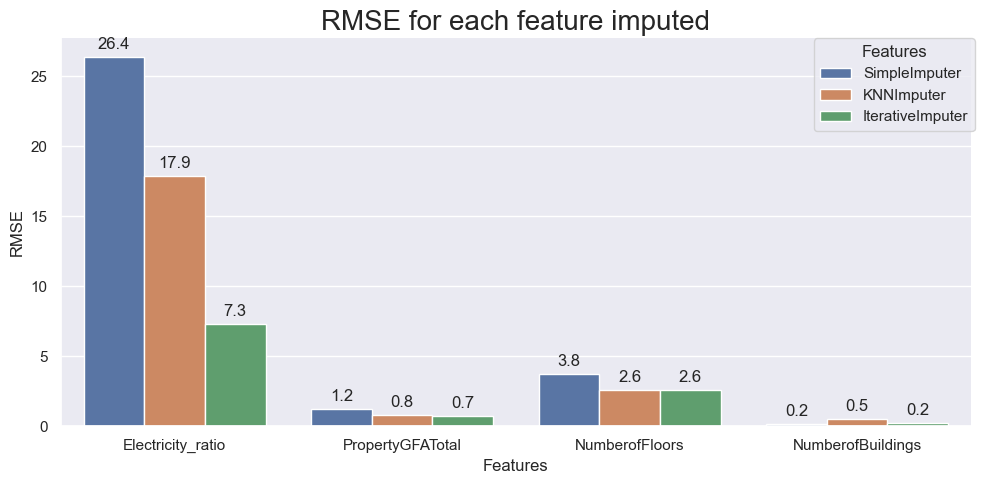

In [129]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title("RMSE for each feature imputed", size=20)
plot = sns.barplot(x="Feature", y="RMSE", hue="Method", data=df_RMSE, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.legend(bbox_to_anchor=(1.004, 1), borderaxespad=0, title="Features")
plt.tight_layout()
plt.xlabel("Features", size=12)
plt.ylabel("RMSE", size=12)
plt.savefig("img/missing-values-imputations-RMSE.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <b>Observations / Conclusions</b><br><br>
    Considering that <b>IterativeImputer</b> is still experimental, we are goingo to treat missing values with <b>KNNImputer</b>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.5. Making final imputations</h3>
</div>

<div class="alert alert-block alert-info">
    Making a <b>mask</b> to filter the records <b>without missing-values</b> to use them to fit the <b>KNN Imputer</b>
</div>

In [130]:
nrj_to_impute_KNN = nrj.drop(columns=["ENERGYSTARScore"], axis=1)

In [131]:
mask = nrj_to_impute_KNN[["Electricity_ratio", "PropertyGFATotal", "NumberofFloors", "NumberofBuildings"]].notnull().all(axis=1)

In [136]:
KNN_trainning_data = nrj_to_impute_KNN[mask].copy()

In [137]:
df_analysis(nrj_to_impute_KNN, "df_subset")


Analysis of df_subset dataset
--------------------------------------------------------------------
- Dataset shape:                  1558 rows and 12 columns
- Total of NaN values:            72
- Percentage of NaN:              0.39 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 104.6 KB )
--------------------------------------------------------------------


name      type  records  # NaN   % NaN
0          OSEBuildingID     int64     1558      0 0.00000
1           Neighborhood  category     1558      0 0.00000
2            BuildingAge   float64     1558      0 0.00000
6   renamed_PropertyType  category     1558      0 0.00000
8             NaturalGas      bool     1558      0 0.00000
9               SteamUse      bool     1558      0 0.00000
10   SiteEnergyUse(kBtu)   float64     1558      0 0.00000
11     TotalGHGEmissions   float64     1558      0 0.00000
5       PropertyGFATotal   float64     1550      8 0.51000
7      Electricity_ratio   float64     1550      8 0.51000
3         NumberofFloors   float64     1531     27 1.73000
4      NumberofBuildings   float64     1529     29 1.86000

<div class="alert alert-block alert-info">
    Preprocessing training data
</div>

In [138]:
# Making OneHotEncoder on categorical columns
array_ohe = ohe.fit_transform(KNN_trainning_data[["Neighborhood", "renamed_PropertyType"]])
df_ohe = pd.DataFrame(array_ohe, index=KNN_trainning_data.index)
df_ohe.columns = ohe.get_feature_names_out()

# Droping the real columns and concatenating the encoder columns
KNN_trainning_data = KNN_trainning_data.drop(columns=["Neighborhood", "renamed_PropertyType"], axis=1)
KNN_trainning_data = pd.concat([KNN_trainning_data, df_ohe], axis=1)

# Transforming boolean columns to numeric
KNN_trainning_data["NaturalGas"] = KNN_trainning_data["NaturalGas"].astype(int)
KNN_trainning_data["SteamUse"] = KNN_trainning_data["SteamUse"].astype(int)

# Normalizing the datesets
scaler_features = scaler.fit_transform(KNN_trainning_data)
KNN_trainning_data_scaled = pd.DataFrame(scaler_features, index=KNN_trainning_data.index, columns=KNN_trainning_data.columns)

<div class="alert alert-block alert-info">
    Preprocessing all data
</div>

In [140]:
# Making OneHotEncoder on categorical columns
array_ohe = ohe.fit_transform(nrj_to_impute_KNN[["Neighborhood", "renamed_PropertyType"]])
df_ohe = pd.DataFrame(array_ohe, index=nrj_to_impute_KNN.index)
df_ohe.columns = ohe.get_feature_names_out()

# Droping the real columns and concatenating the encoder columns
nrj_to_impute_KNN = nrj_to_impute_KNN.drop(columns=["Neighborhood", "renamed_PropertyType"], axis=1)
nrj_to_impute_KNN = pd.concat([nrj_to_impute_KNN, df_ohe], axis=1)

# Transforming boolean columns to numeric
nrj_to_impute_KNN["NaturalGas"] = nrj_to_impute_KNN["NaturalGas"].astype(int)
nrj_to_impute_KNN["SteamUse"] = nrj_to_impute_KNN["SteamUse"].astype(int)


# Normalizing the datesets
scaler_features = scaler.transform(nrj_to_impute_KNN)
nrj_to_impute_KNN_scaled = pd.DataFrame(scaler_features, index=nrj_to_impute_KNN.index, columns=nrj_to_impute_KNN.columns)

<div class="alert alert-block alert-info">
    Making the imputation
</div>

In [141]:
df_imputed = df_imputations(KNN_trainning_data_scaled, nrj_to_impute_KNN_scaled, "KNNImputer", scaler)

<div class="alert alert-block alert-info">
    Refactoring the dataframe as original
</div>

In [142]:
for col in df_imputed.columns:
    if "PT_" in col or "N_" in col:
        del df_imputed[col]

In [143]:
df_imputed = pd.concat([df_imputed, nrj[["Neighborhood", "renamed_PropertyType", "ENERGYSTARScore"]]], axis=1)

In [144]:
df_imputed["NaturalGas"] = df_imputed["NaturalGas"].astype(bool)
df_imputed["SteamUse"] = df_imputed["SteamUse"].astype(bool)

In [145]:
df_analysis(df_imputed, "df_imputed")


Analysis of df_imputed dataset
--------------------------------------------------------------------
- Dataset shape:                  1558 rows and 13 columns
- Total of NaN values:            531
- Percentage of NaN:              2.62 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 116.8 KB )
--------------------------------------------------------------------


name      type  records  # NaN    % NaN
0          OSEBuildingID   float64     1558      0  0.00000
1            BuildingAge   float64     1558      0  0.00000
2         NumberofFloors   float64     1558      0  0.00000
3      NumberofBuildings   float64     1558      0  0.00000
4       PropertyGFATotal   float64     1558      0  0.00000
5      Electricity_ratio   float64     1558      0  0.00000
6             NaturalGas      bool     1558      0  0.00000
7               SteamUse      bool     1558      0  0.00000
8    SiteEnergyUse(kBtu)   float64     1558      0  0.00000
9      TotalGHGEmissions   float64     1558      0  0.00000
10          Neighborhood  category     1558      0  0.00000
11  renamed_PropertyType  category     1558      0  0.00000
12       ENERGYSTARScore   float64     1027    531 34.08000

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">8. Feature engineering II</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.1. Adding a bins for size of buildings </h3>
</div>

In [146]:
bins = np.linspace(min(df_imputed["PropertyGFATotal"]), max(df_imputed["PropertyGFATotal"]), 4)

In [147]:
group_names = ["Small",  "Medium", "Large"]

In [148]:
df_imputed["PropertyGFATotal-binned"] = pd.cut(df_imputed["PropertyGFATotal"], bins, labels=group_names, include_lowest=True)

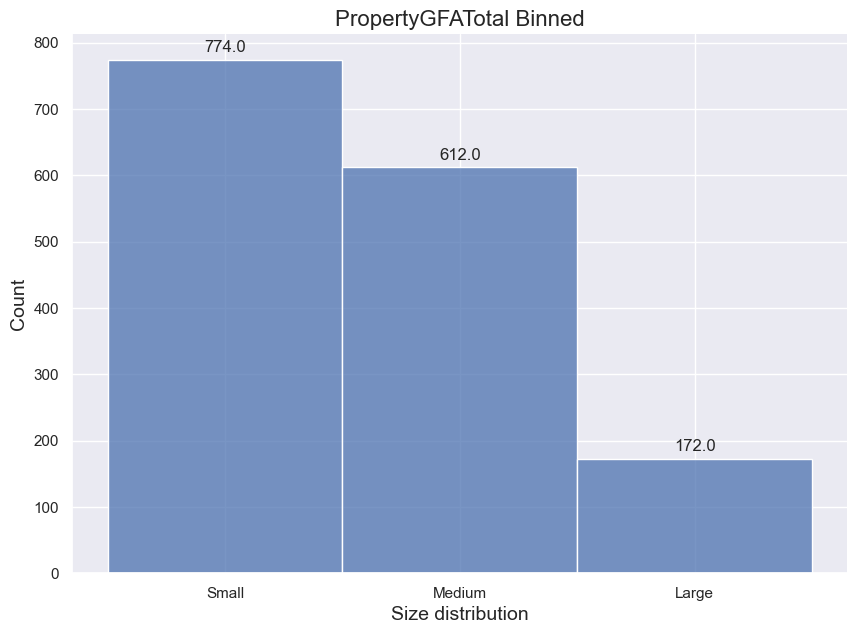

In [149]:
fig, ax1 = plt.subplots(figsize=(10, 7))
plot = sns.histplot(data=df_imputed, x="PropertyGFATotal-binned", ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.title("PropertyGFATotal Binned", size=16)
plt.xlabel("Size distribution", size=14)
plt.ylabel("Count", size=14)
plt.savefig("img/PropertyGFATotal-binned.png")
sns.despine(fig)

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">9. Exploratory Data Analysis II</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.1. Initial analysis</h3>
</div>

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">9.1.1 Primary Property type distribution</h4>
</div>

In [150]:
data_piechart = df_imputed["renamed_PropertyType"].sort_values(ascending=False).value_counts().values
labels_piechart = df_imputed["renamed_PropertyType"].sort_values(ascending=False).value_counts().index.tolist()
textprops = dict(size=16, color="gray")
colors = ["#5975A4", "#CC8963", "#5F9E6E", "#AD5B5E", "#857AAB", "#7D6D5F", "#D095BF", "#C1B37F"]
explode = (0, 0, 0, 0, 0, 0, 0, 0)

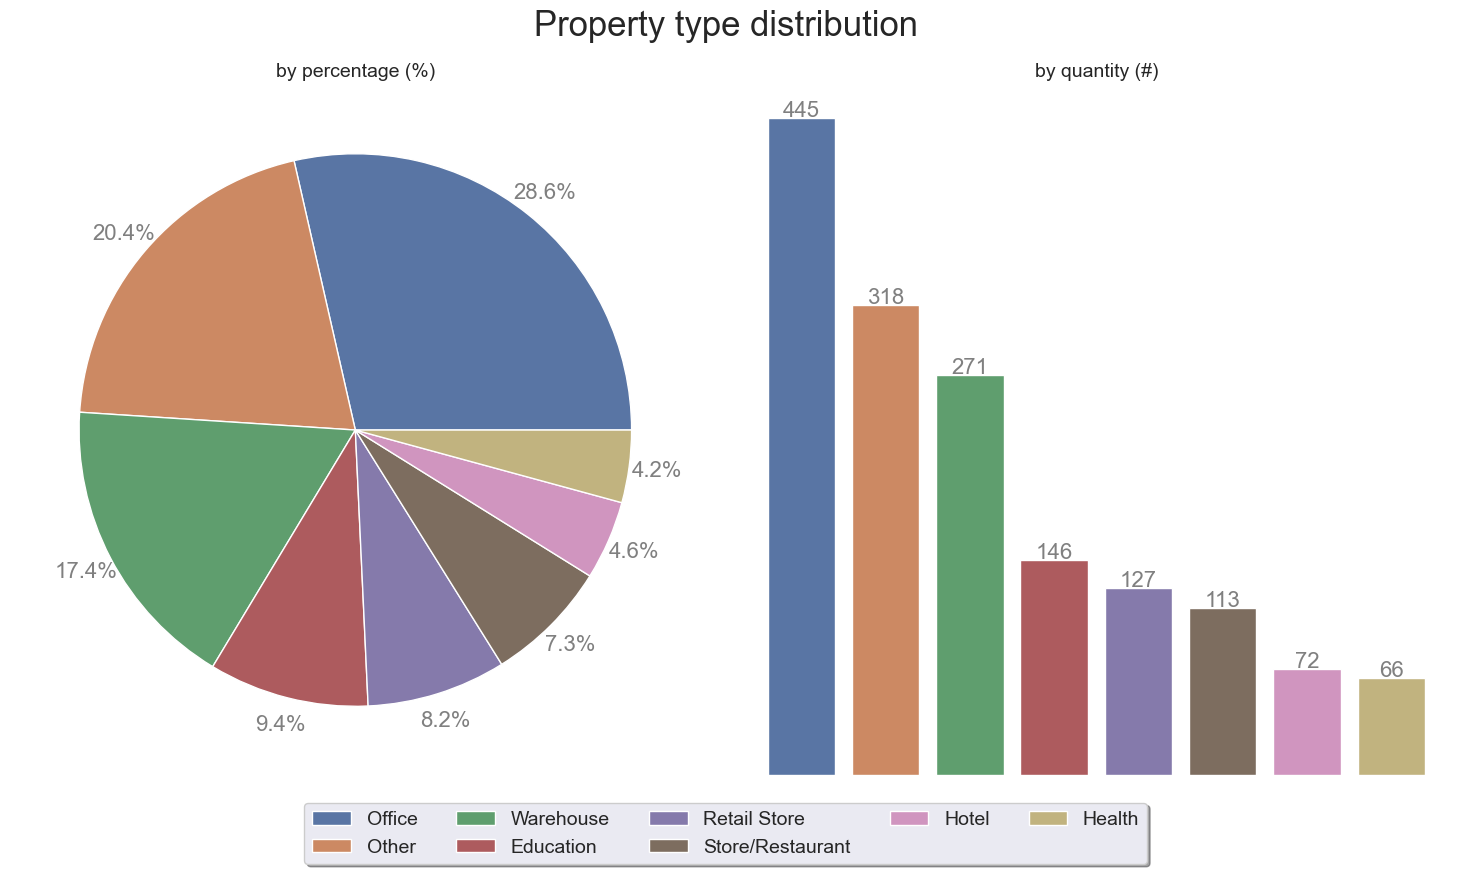

In [151]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[15,8])

fig.suptitle("Property type distribution", size=25)

for lb, data, color in zip(labels_piechart, data_piechart, colors):
    ax2.bar(lb, data, label=lb, color=color)
for index, data in enumerate(data_piechart):
    plt.text(x=index, y=data+1 , s=f"{data}", horizontalalignment="center", fontdict=dict(fontsize=16, color="gray"))
ax2.set_title("by quantity (#)", fontsize=14)
ax2.axis('off')

ax1.pie(x=data_piechart, explode=explode, autopct="%1.1f%%", pctdistance=1.10, 
        textprops=textprops, colors=[color for color in colors], startangle=0)
ax1.set_title("by percentage (%)", fontsize=14)

fig.legend(labels_piechart, loc="center", ncol=5, fontsize=14, bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

plt.tight_layout()
plt.savefig("img/property-type-distribution.png")
plt.show()

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">9.1.2  Comparison of the targets variables in each Property type</h4>
</div>

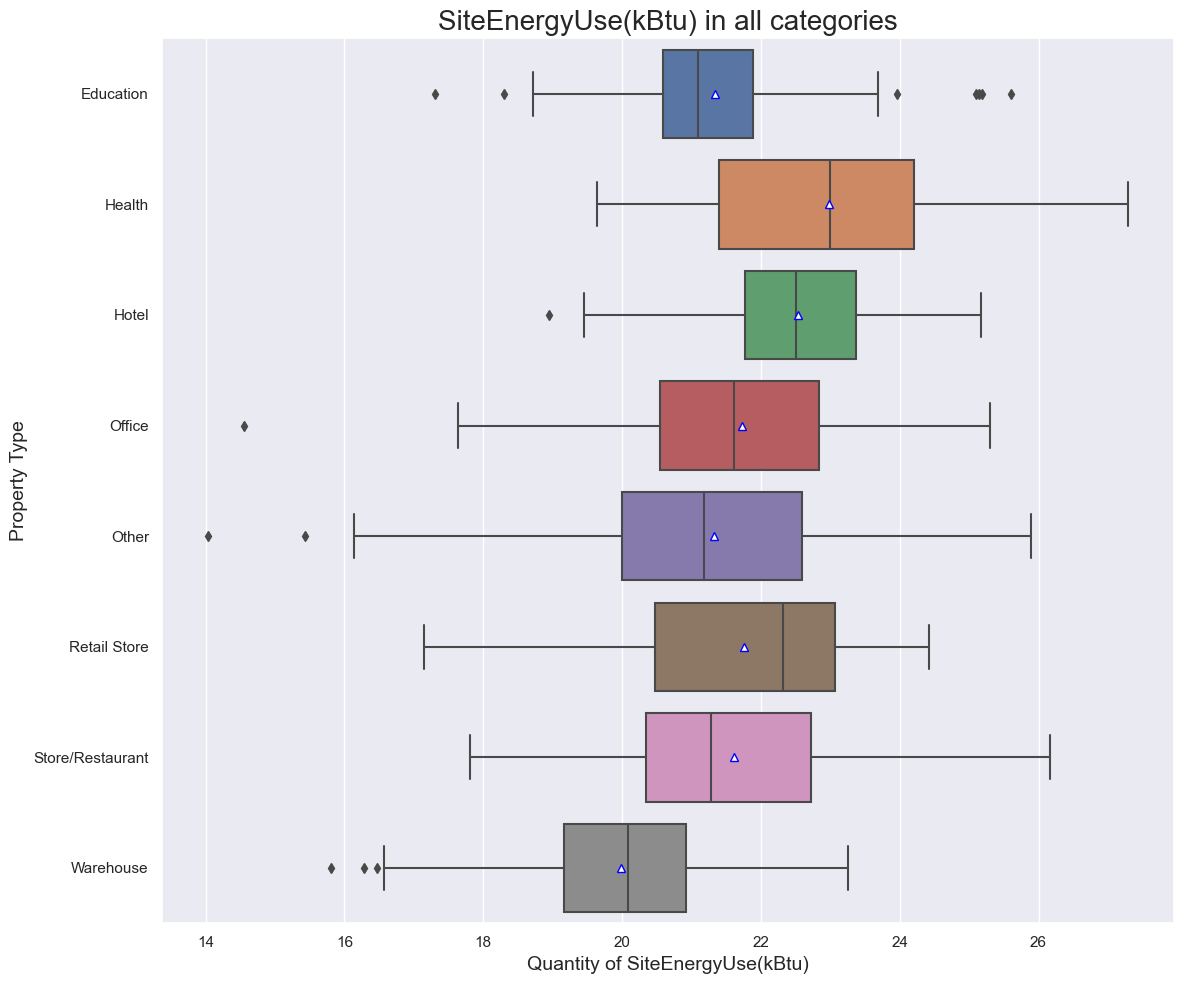

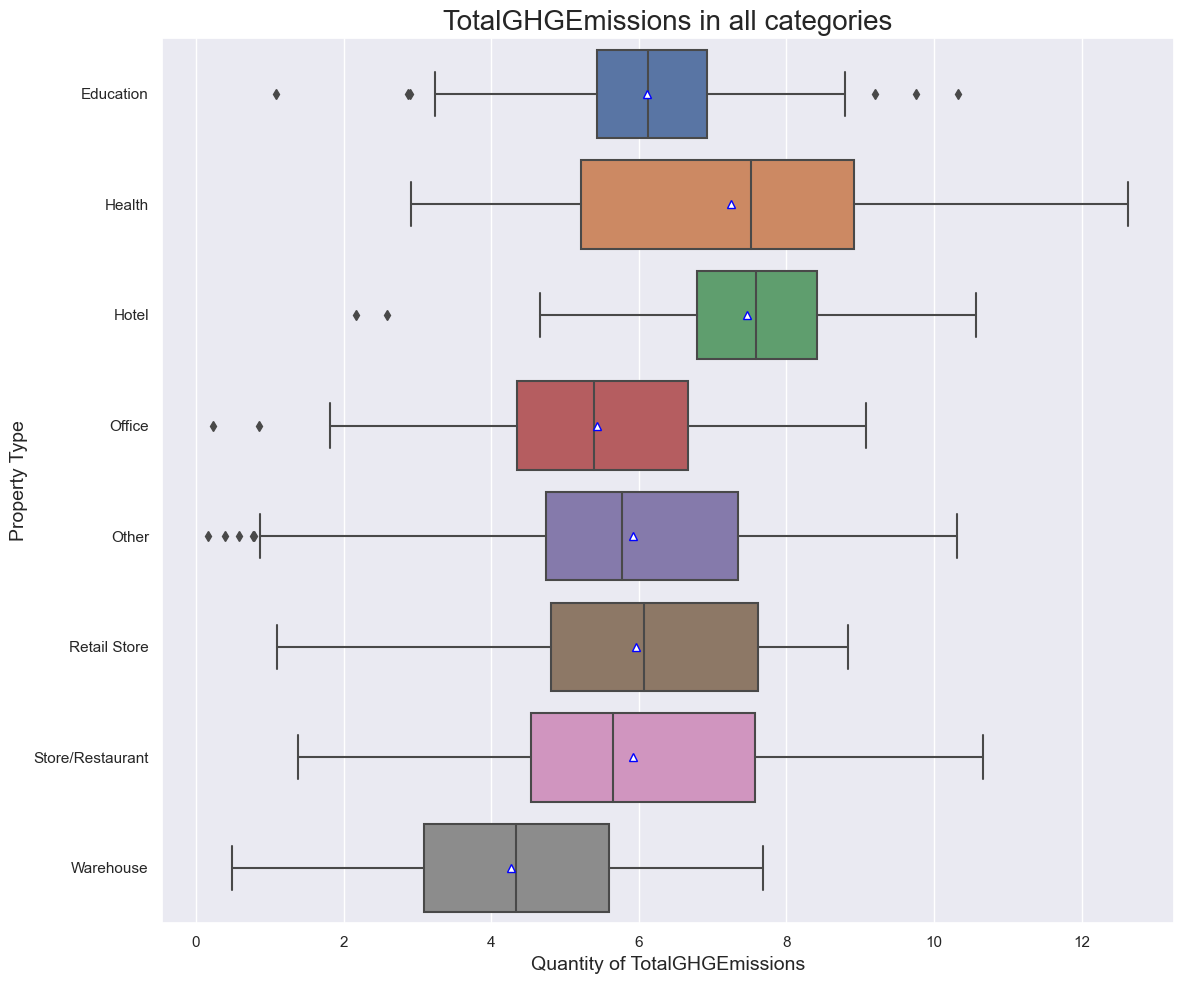

In [152]:
for var in TARGET_VARIABLES:
    if var != "ENERGYSTARScore":
        plt.figure(figsize=[12,10])
        sns.boxplot(x=df_imputed[var], y=df_imputed["renamed_PropertyType"], orient="h", showmeans=True, 
                    meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
        plt.title(var + " in all categories", size=20)
        plt.ylabel("Property Type", size=14)
        plt.xlabel("Quantity of " + var, size=14)
        plt.tight_layout()
        plt.savefig("img/comparison-of-" + var + "-in-each-category.png")
        plt.show()

<div class="alert alert-block alert-success">
    <b>Observations / Conclusions</b><br/><br/>
    Building related to <b>Health</b> have a high <b>SiteEnergyUse(kBtu)</b> and <b>TotalGHGEmissions</b>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.2. Univariate analysis</h3>
</div>

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">9.2.1. UA for Categorical Variables</h4>
</div>

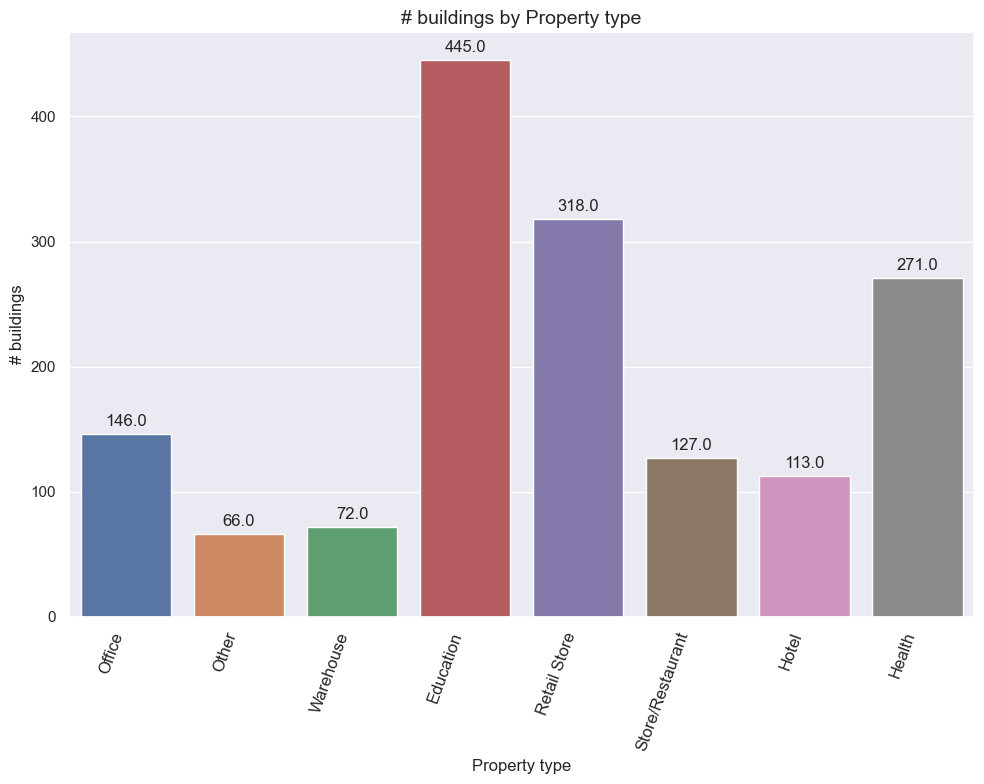

In [153]:
fig = plt.subplots(figsize=(10, 8))
plot = sns.barplot(x=df_imputed["renamed_PropertyType"].value_counts().index, y=df_imputed["renamed_PropertyType"].value_counts(), data=df_imputed)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.xlabel("Property type", size=12)
plt.ylabel("# buildings", size=12)
plt.title("# buildings by Property type", size=14)
plot.set_xticklabels(labels=df_imputed["renamed_PropertyType"].value_counts().index, rotation=70, size=12, horizontalalignment="right")
plt.tight_layout()
plt.savefig("img/buildings-by-property-type.png")
plt.show()

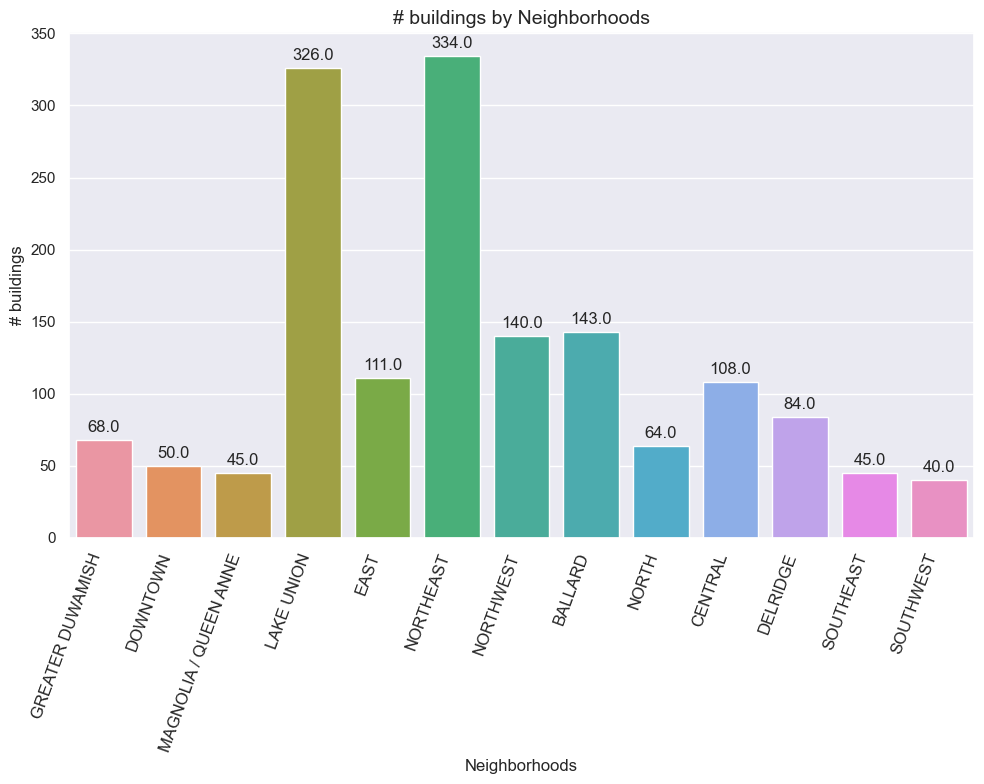

In [154]:
fig = plt.subplots(figsize=(10, 8))
plot = sns.barplot(x=df_imputed["Neighborhood"].value_counts().index, y=df_imputed["Neighborhood"].value_counts(), data=df_imputed)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 9), textcoords="offset points")
plt.xlabel("Neighborhoods", size=12)
plt.ylabel("# buildings", size=12)
plt.title("# buildings by Neighborhoods", size=14)
plot.set_xticklabels(labels=df_imputed["Neighborhood"].value_counts().index, rotation=70, size=12, horizontalalignment="right")
plt.tight_layout()
plt.savefig("img/buildings-by-neighborhoods.png")
plt.show()

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Bivariate analysis</h3>
</div>

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">9.3.1. Pearson correlation</h4>
</div>

In [155]:
FEATURES = [
    "PropertyGFATotal", "BuildingAge", "NumberofFloors", "NumberofBuildings", "Electricity_ratio"
]

In [156]:
TARGETS = [
    "SiteEnergyUse(kBtu)", "TotalGHGEmissions"
]

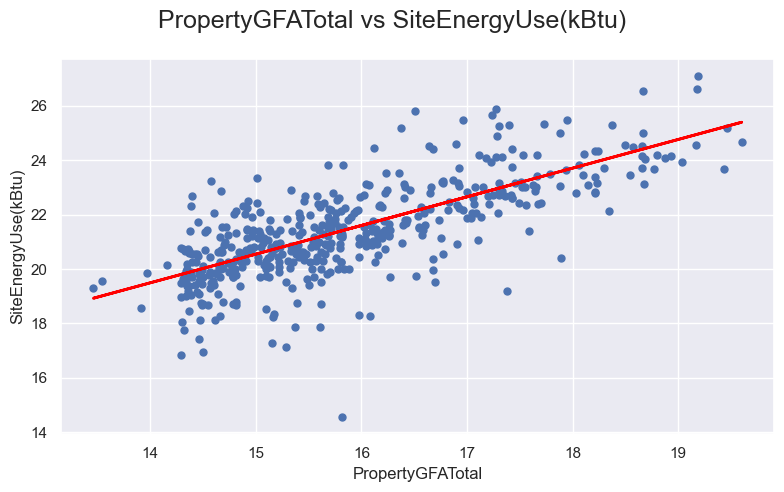

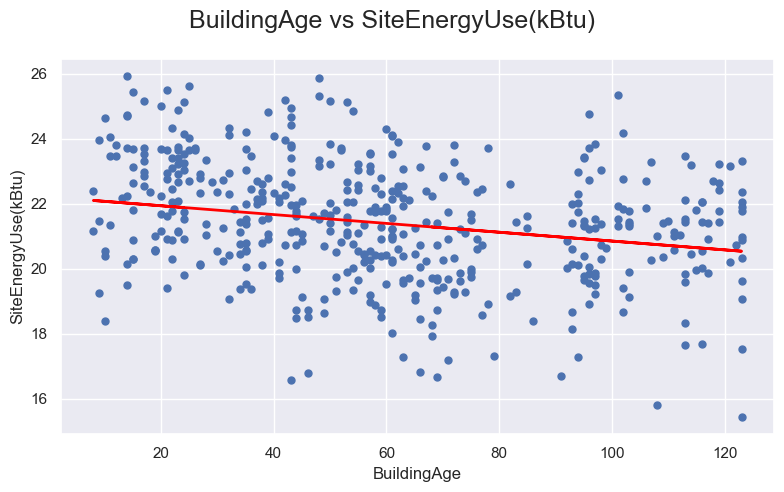

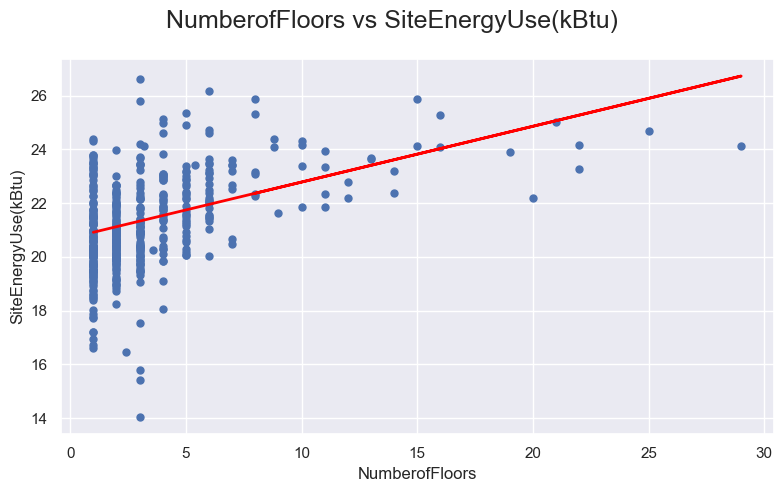

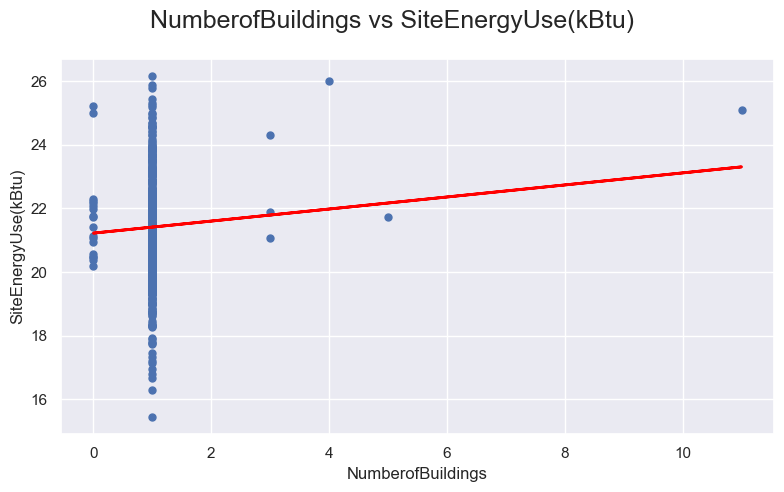

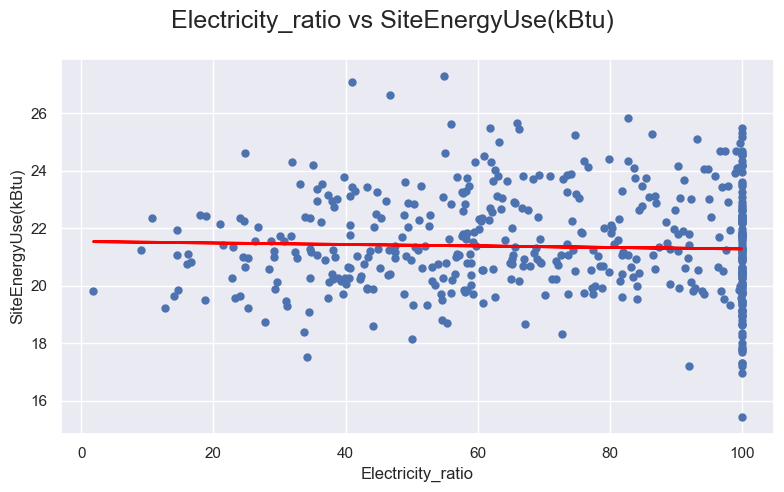

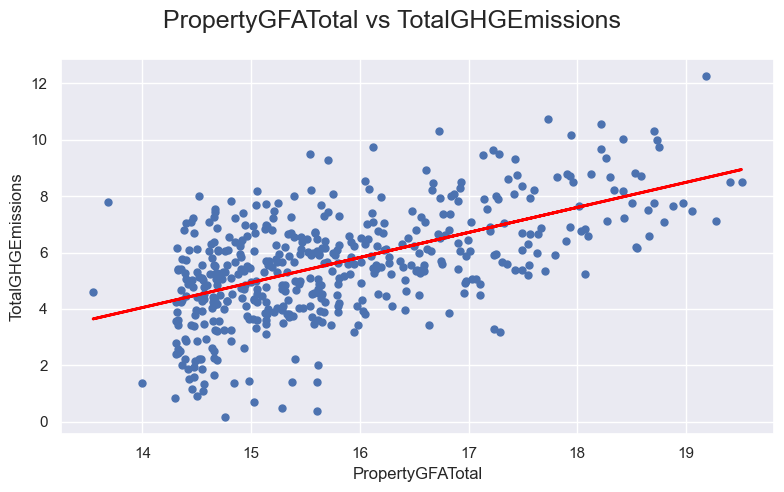

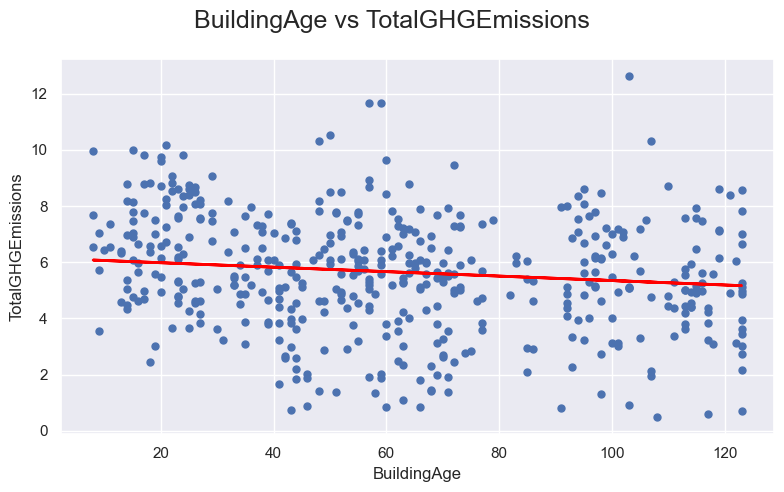

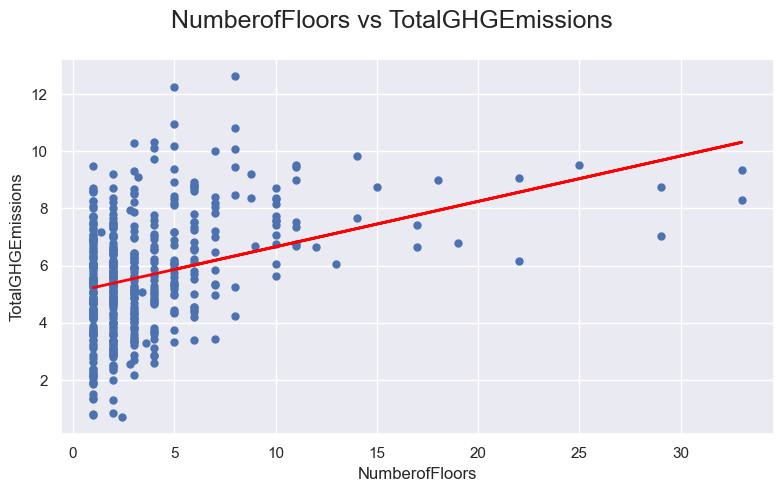

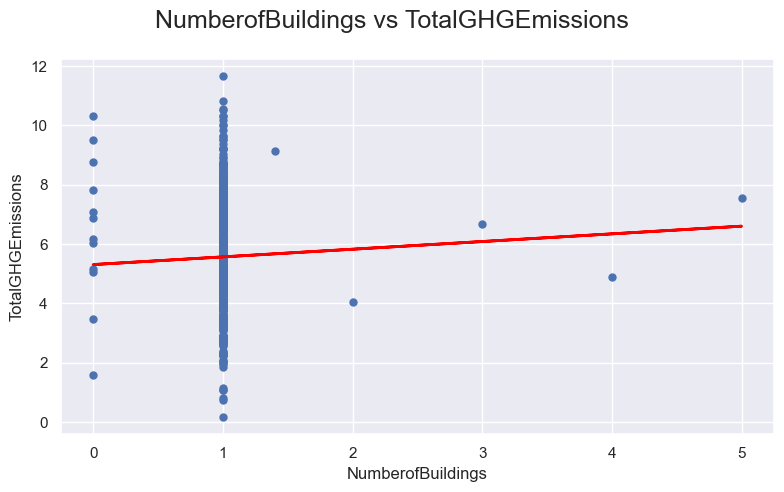

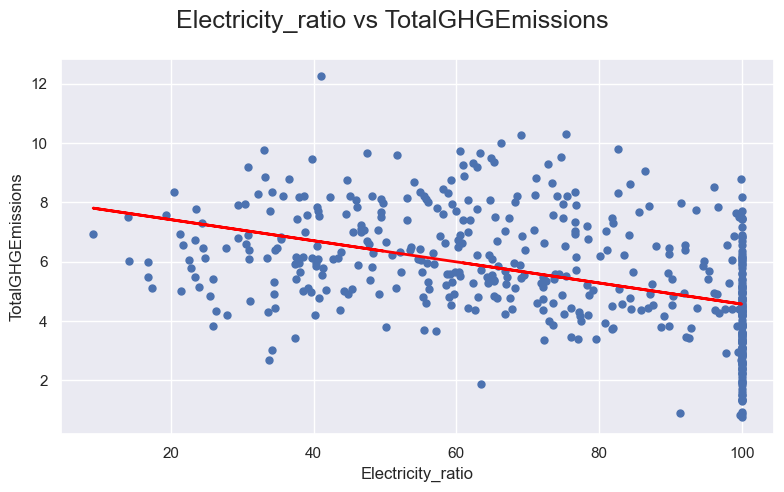

In [157]:
list_variables, list_COEF, list_MSE, list_RMSE, list_R2SCORE = ([] for i in range(5))

for target in TARGETS:
    
    for feature in FEATURES:
    
        # initializing Linear Regression by Pearson
        lr = LinearRegression()
        xtrain, xtest, ytrain, ytest = train_test_split(df_imputed[[feature]], df_imputed[[target]], test_size=0.3)
        lr = LinearRegression()
        lr_baseline = lr.fit(xtrain, ytrain)
        pred_baseline = lr_baseline.predict(xtest)

        list_variables.append(feature + " vs " + target)
        list_COEF.append(round(lr_baseline.coef_[0,0], 4))
        list_MSE.append(round(mean_squared_error(ytest, pred_baseline), 2))
        list_RMSE.append(round(math.sqrt(mean_squared_error(ytest, pred_baseline)), 2))
        list_R2SCORE.append(round(r2_score(ytest, pred_baseline), 2))

        # PLotting the graph
        plt.figure(figsize=(8,5))
        ax = plt.gca()

        plt.suptitle(feature + " vs " + target, fontsize=18)
        plt.plot(xtest, ytest, 'bo', markersize = 5)
        plt.plot(xtest, pred_baseline, color="red", linewidth = 2)
        plt.xlabel(feature, size=12)
        plt.ylabel(target, size=12)
        plt.tight_layout()
        plt.savefig("img/correlation-" + feature + "-vs-" + target + ".png")
        plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Here, we got that the dataset is <b>Non-linear Dataset</b> based on the relation among some features and target variables</p>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.4. Multivariate Analysis</h3>
</div>

<div style="background-color: #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">9.4.1. Correlation Matrix</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the Correlation matrix for numeric features
</div>

In [158]:
FEATURES_IN_MATRIX_CORR = [
    "NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "BuildingAge",
    "Electricity_ratio", "SiteEnergyUse(kBtu)", "TotalGHGEmissions"
]
RENAME_COLS = {
    "NumberofBuildings":"# buildings", "NumberofFloors":"# floors", "PropertyGFATotal":"GFA Total", 
     "BuildingAge":"Age", "Electricity_ratio":"Elec. ratio", "SiteEnergyUse(kBtu)":"Energy Use", "TotalGHGEmissions":"CO2"
}

In [159]:
df_temp = pd.DataFrame(df_imputed[FEATURES_IN_MATRIX_CORR]).copy()
df_temp.rename(columns=RENAME_COLS, inplace=True)

In [160]:
df_correlation_matrix = pd.DataFrame(df_temp.corr()).round(2)

In [161]:
mask = np.zeros_like(df_correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True 

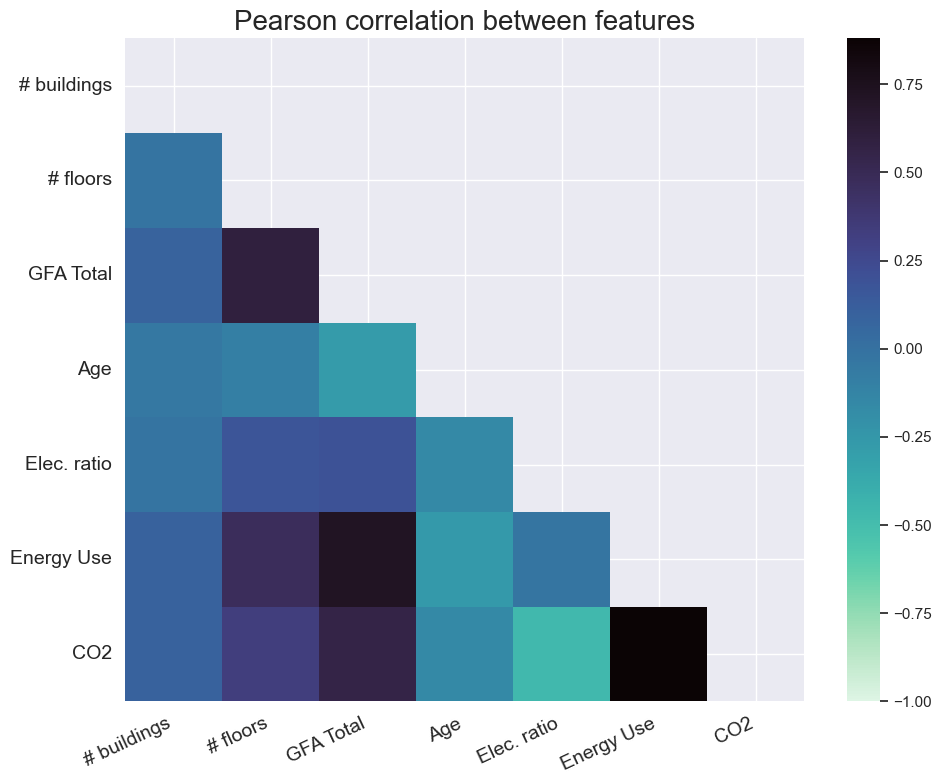

In [162]:
plt.figure(figsize=(10,8))
plt.title("Pearson correlation between features", size=20)

ax = sns.heatmap(df_correlation_matrix, mask=mask, vmin=-1, cmap="mako_r")

plt.xticks(rotation=25, size=14, horizontalalignment="right")
plt.yticks(rotation=0, size=14)
plt.tight_layout()
plt.savefig("img/pearson-correlation-between-features.png")
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations / Conclusions</b>
    <ul style="list-style-type: square;">
            <li>There are some correlation among <b>GFA Total</b> and <b># floors</b> and <b>Target feautres</b></li>
        </ul>               
</div>

In [187]:
print("Pearson correlation")
print("---------------------------------------------")

for threshold in [ 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    
    features_correlated = df_correlation_matrix[((np.abs(df_correlation_matrix) > threshold) & (np.abs(df_correlation_matrix) < 1)).any()].index
    
    print("- Threshold  of: " + str(threshold))
    print("  · Numbers of features with correlatin in the threshold: "  + "{}".format(str(len(features_correlated))))
    
    flag = True
    count = 0

    for val in list(features_correlated):
        
        if count == len(features_correlated) - 1:
            print(val)
        elif flag:
            print("   ", val, end=", ")
            flag = False
        else:
            print(val, end=", ")
            
        count += 1
    print("\n")

Pearson correlation
---------------------------------------------
- Threshold  of: 0.3
  · Numbers of features with correlatin in the threshold: 5
    # floors, GFA Total, Elec. ratio, Energy Use, CO2


- Threshold  of: 0.4
  · Numbers of features with correlatin in the threshold: 5
    # floors, GFA Total, Elec. ratio, Energy Use, CO2


- Threshold  of: 0.5
  · Numbers of features with correlatin in the threshold: 4
    # floors, GFA Total, Energy Use, CO2


- Threshold  of: 0.6
  · Numbers of features with correlatin in the threshold: 3
    GFA Total, Energy Use, CO2


- Threshold  of: 0.7
  · Numbers of features with correlatin in the threshold: 3
    GFA Total, Energy Use, CO2


- Threshold  of: 0.8
  · Numbers of features with correlatin in the threshold: 2
    Energy Use, CO2


- Threshold  of: 0.9
  · Numbers of features with correlatin in the threshold: 0




<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.5. Principal component analysis - PCA</h3>
</div>

In [188]:
df_analysis(df_imputed, "df_imputed")


Analysis of df_imputed dataset
--------------------------------------------------------------------
- Dataset shape:                  1558 rows and 14 columns
- Total of NaN values:            531
- Percentage of NaN:              2.43 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 118.4 KB )
--------------------------------------------------------------------


name      type  records  # NaN    % NaN
0             OSEBuildingID   float64     1558      0  0.00000
1               BuildingAge   float64     1558      0  0.00000
2            NumberofFloors   float64     1558      0  0.00000
3         NumberofBuildings   float64     1558      0  0.00000
4          PropertyGFATotal   float64     1558      0  0.00000
5         Electricity_ratio   float64     1558      0  0.00000
6                NaturalGas      bool     1558      0  0.00000
7                  SteamUse      bool     1558      0  0.00000
8       SiteEnergyUse(kBtu)   float64     1558      0  0.00000
9         TotalGHGEmissions   float64     1558      0  0.00000
10             Neighborhood  category     1558      0  0.00000
11     renamed_PropertyType  category     1558      0  0.00000
13  PropertyGFATotal-binned  category     1558      0  0.00000
12          ENERGYSTARScore   float64     1027    531 34.08000

<div class="alert alert-block alert-info">
    We are <b>not</b> going to <b>consider</b> the following features
    <ul style="list-style-type: square;">
        <li><b>OSEBuildingID:</b> Not interesting for the mission</li>
        <li><b>SiteEnergyUse(kBtu): </b> Features target</li>
        <li><b>SiteEnergyUse(kBtu)_log2: </b>Transformed features target</li>
        <li><b>TotalGHGEmissions: </b> Features target</li>
        <li><b>TotalGHGEmissions_log2: </b> Transformed features target</li>
        <li><b>ENERGYSTARScore: </b>Other features</li>
    </ul>  
</div>

<div class="alert alert-block alert-info">
    <b>Encoding</b> through <b>LabelEncoder</b> the booleans features
</div>

In [189]:
le = LabelEncoder()

In [190]:
df_le = df_imputed[["Neighborhood", "renamed_PropertyType", "PropertyGFATotal-binned"]].copy().apply(le.fit_transform)

In [191]:
df_le.head(5)

Neighborhood  renamed_PropertyType  PropertyGFATotal-binned
0             3                     2                        1
1             3                     2                        1
2             3                     2                        1
3             3                     2                        1
4             3                     2                        1

<div class="alert alert-block alert-info">
    <b>The numeric</b> features <br>
</div>

In [192]:
df_numeric_features = df_imputed.loc[:, ["NumberofFloors", "NumberofBuildings", "PropertyGFATotal", "BuildingAge", "Electricity_ratio"]]

<div class="alert alert-block alert-info">
    <b>The boolean</b> features <br>
</div>

In [193]:
df_boolean_features = df_imputed.loc[:, ["NaturalGas", "SteamUse"]]

<div class="alert alert-block alert-info">
    <b>Concatenating</b> dataframes to <b>Normalize</b>
</div>

In [194]:
df_subset = pd.concat([df_numeric_features, df_boolean_features, df_le], axis=1)

In [195]:
df_subset.head()

NumberofFloors  NumberofBuildings  PropertyGFATotal  BuildingAge   
0            12.0                1.0         16.432330         96.0  \
1            11.0                1.0         16.660205         27.0   
2            10.0                1.0         15.904094         97.0   
3            18.0                1.0         17.421777         43.0   
4            11.0                1.0         16.340980         97.0   

   Electricity_ratio  NaturalGas  SteamUse  Neighborhood   
0           54.60599        True      True             3  \
1           38.66091        True     False             3   
2           40.75193        True      True             3   
3           37.88017        True     False             3   
4           48.81603        True     False             3   

   renamed_PropertyType  PropertyGFATotal-binned  
0                     2                        1  
1                     2                        1  
2                     2                        1  
3                     2                        1  
4                     2                        1

<div class="alert alert-block alert-info">
    <b>Normalizing</b> the features <br>
    None of the numerical variables follow a normal distribution, so we will use StandardScaler
    
</div>

In [196]:
scaler = StandardScaler()

In [197]:
scaler_features = scaler.fit_transform(df_subset)

In [198]:
df_scaler = pd.DataFrame(scaler_features, index=df_subset.index, columns=df_subset.columns)
df_scaler.head(5)

NumberofFloors  NumberofBuildings  PropertyGFATotal  BuildingAge   
0        2.151567          -0.047184          0.495013     1.058207  \
1        1.898112          -0.047184          0.680334    -1.055219   
2        1.644658          -0.047184          0.065424     1.088836   
3        3.672295          -0.047184          1.299685    -0.565149   
4        1.898112          -0.047184          0.420723     1.088836   

   Electricity_ratio  NaturalGas  SteamUse  Neighborhood   
0          -0.601375    0.632313  3.968966     -0.828137  \
1          -1.214901    0.632313 -0.251955     -0.828137   
2          -1.134444    0.632313  3.968966     -0.828137   
3          -1.244941    0.632313 -0.251955     -0.828137   
4          -0.824158    0.632313 -0.251955     -0.828137   

   renamed_PropertyType  PropertyGFATotal-binned  
0             -0.904099                -0.571017  
1             -0.904099                -0.571017  
2             -0.904099                -0.571017  
3             -0.904099                -0.571017  
4             -0.904099                -0.571017

<div class="alert alert-block alert-info">
   Numbers of components to calculate to PCA            
</div>

In [199]:
n_comp = 9

<div class="alert alert-block alert-info">
    Selecting the features to analyse with PCA
</div>

In [200]:
X = df_scaler.values
index_values = df_scaler.index
features = df_scaler.columns

<div class="alert alert-block alert-info">
   Principal components determination      
</div>

In [201]:
pca = PCA(n_components=n_comp).fit(X)

In [202]:
df_pca = pd.DataFrame(pca.components_, 
                      index=["PC" + str(i+1) for i in range(n_comp)],
                      columns=features ).T

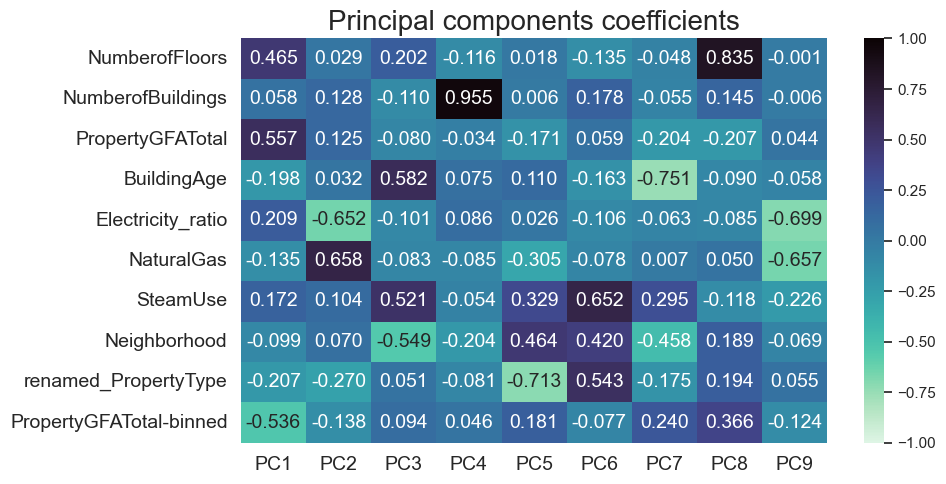

In [203]:
plt.figure(figsize=(10,5))
plt.title("Principal components coefficients", size=20)

ax = sns.heatmap(df_pca, vmin=-1, vmax=1, center=0, cmap="mako_r",
                annot=True, annot_kws={"size": 14}, fmt=".3f")

plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig("img/principal-components-coefficients.png")
plt.show()

<div class="alert alert-block alert-info">
    Plotting the <b>Scree of eigenvalues</b>
</div>

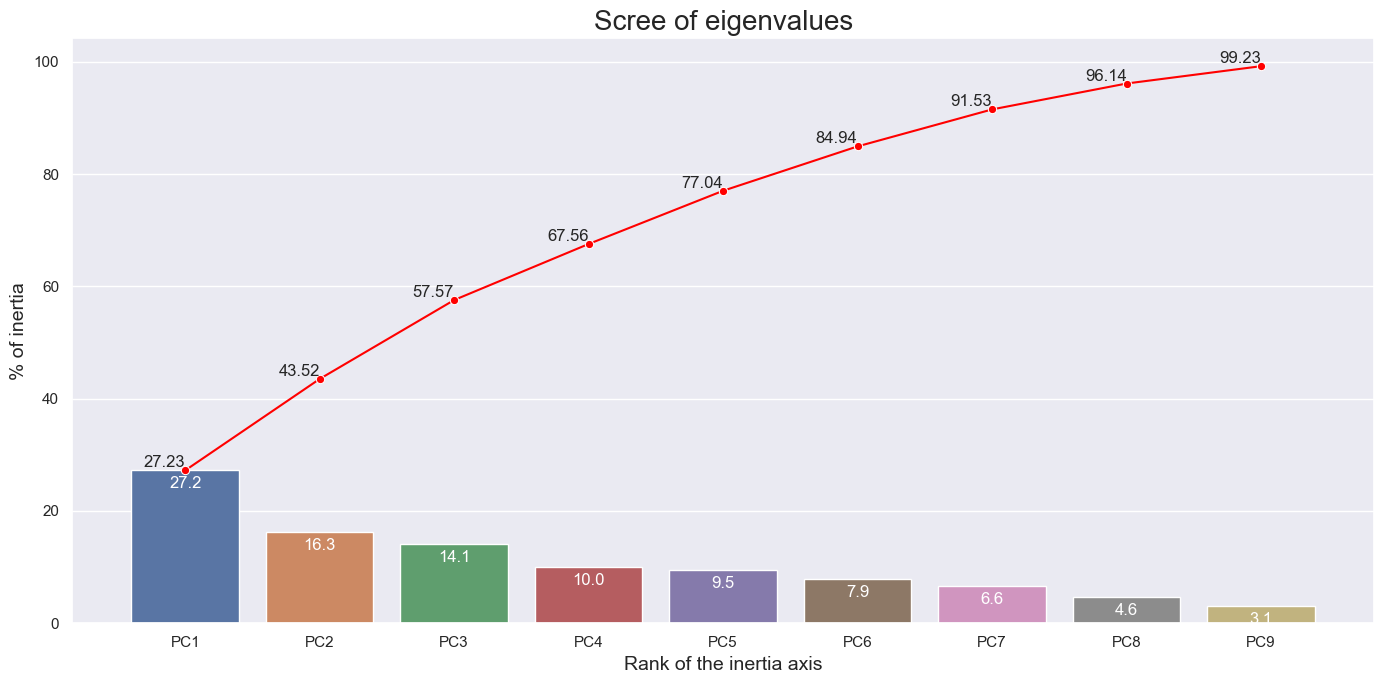

In [204]:
scree = pca.explained_variance_ratio_*100

fig = plt.subplots(figsize=(14, 7))
plot_bar = sns.barplot(x=df_pca.columns, y=scree)
for p in plot_bar.patches:
    plot_bar.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="bottom", xytext=(0, -15), textcoords="offset points", color="white")
plot_line = sns.lineplot(x=df_pca.columns, y=scree.cumsum(), marker="o", color="red")

for x, y in zip(df_pca.columns, scree.cumsum()):
    plot_line.text(x, y, "{:.2f}".format(y), ha="right", va="bottom")

plt.xlabel("Rank of the inertia axis", size=14)
plt.ylabel("% of inertia", size=14)
plt.title("Scree of eigenvalues", size=20)
plt.tight_layout()
plt.savefig("img/scree-of-eigenvalues.png")
plt.show()

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b>
</div>

In [205]:
display_circles(pca.components_, n_comp, pca, [(0,1),(2,3),(4,5)], labels=np.array(features))

NameError: name 'display_circles' is not defined

<div class="alert alert-block alert-info">
    Plotting the <b>Projection of individuals</b>
</div>

In [206]:
X_projected = pca.transform(X)
index_values_sample = pd.Series(index_values).sample(100)

In [207]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], 
                         labels=np.array(index_values_sample), illus_var=nrj.loc[index_values_sample, "renamed_PropertyType"], 
                         lab_on=False, alpha = 0.5)

NameError: name 'display_factorial_planes' is not defined

<div class="alert alert-block alert-info">
    Keeping the <b>90% of the variance of the components</b>
</div>

In [208]:
var_threshold=0.90

# Processing the PCA
pca = decomposition.PCA()
pca.fit(X)

# Getting the explained variance ratio for each principal component
scree = pca.explained_variance_ratio_

# Getting the number of principal components to reach variance thresholds
mask = scree.cumsum() > var_threshold
nb_selected_components = len(scree[~mask]) + 1
print("Number of selected components:", nb_selected_components)

# Compute and displays the actual ratio of explained variance
explained_variance_sum = scree.cumsum()[nb_selected_components-1]
print("Cumulative explained variance:  {:.2f}%".format(explained_variance_sum*100))

# Getting the projection of the data on the first components
X_PCA = pca.transform(X)[:,:nb_selected_components]

Number of selected components: 7
Cumulative explained variance:  91.53%


In [209]:
COL_TO_PC =  ["PC" + str(i + 1) for i in range(nb_selected_components)]

In [210]:
df_worked = pd.DataFrame(data=X_PCA, columns=COL_TO_PC, index=index_values)

In [211]:
df_worked.head(5)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  2.109018  1.635670  3.445829 -0.335235  1.326122  1.365751  0.617946
1  1.661122  1.547600  0.013292 -0.295939 -0.348609 -0.931158  0.972728
2  1.516325  1.915612  3.449866 -0.305774  1.379897  1.460433  0.739981
3  2.727870  1.711383  0.609916 -0.487830 -0.369524 -1.210944  0.395962
4  1.173120  1.327941  1.243449 -0.092546 -0.058478 -1.338399 -0.609308

<div class="alert alert-block alert-info">
    <b>Concatenating</b> the final dataset
</div>

In [212]:
df_subset = pd.concat([df_worked, df_imputed.loc[:, ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]]], axis=1)

In [213]:
df_subset.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0  2.109018  1.635670  3.445829 -0.335235  1.326122  1.365751  0.617946  \
1  1.661122  1.547600  0.013292 -0.295939 -0.348609 -0.931158  0.972728   
2  1.516325  1.915612  3.449866 -0.305774  1.379897  1.460433  0.739981   
3  2.727870  1.711383  0.609916 -0.487830 -0.369524 -1.210944  0.395962   
4  1.173120  1.327941  1.243449 -0.092546 -0.058478 -1.338399 -0.609308   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  
0            22.784838           7.971429  
1            22.999884           8.213639  
2            22.695954           8.167067  
3            23.756602           8.983022  
4            22.457336           7.468746

In [214]:
df_subset.shape

(1558, 9)

In [216]:
df_subset.to_csv("Dataset\df_PCA.csv", index=False)

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Features to work in the prediction models</h2>
</div>

<div class="alert alert-block alert-info">
    We are going to work with features without transformation and missing-values imputed
</div>

In [218]:
nrj_without_transformation = nrj_without_transformation[[
    "NumberofFloors", "NumberofBuildings", "BuildingAge", "PropertyGFATotal", "Neighborhood", 
    "renamed_PropertyType", "Electricity_ratio", "NaturalGas", "SteamUse", 
    "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore"
]]

In [219]:
nrj_without_transformation.head()

NumberofFloors  NumberofBuildings  BuildingAge  PropertyGFATotal   
0            12.0                1.0         96.0           88434.0  \
1            11.0                1.0         27.0          103566.0   
2            10.0                1.0         97.0           61320.0   
3            18.0                1.0         43.0          175580.0   
4            11.0                1.0         97.0           83008.0   

  Neighborhood renamed_PropertyType  Electricity_ratio  NaturalGas  SteamUse   
0     DOWNTOWN                Hotel           54.60599        True      True  \
1     DOWNTOWN                Hotel           38.66091        True     False   
2     DOWNTOWN                Hotel           40.75193        True      True   
3     DOWNTOWN                Hotel           37.88017        True     False   
4     DOWNTOWN                Hotel           48.81603        True     False   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
0            7226362.5             249.98             60.0  
1            8387933.0             295.86             61.0  
2            6794584.0             286.43             56.0  
3           14172606.0             505.01             75.0  
4            5758795.0             176.14             27.0

In [220]:
nrj_without_transformation = pd.concat([nrj_without_transformation, df_imputed[["PropertyGFATotal-binned"]]], axis=1)

In [222]:
nrj_without_transformation = nrj_without_transformation[[
    "NumberofFloors", "NumberofBuildings", "BuildingAge", "PropertyGFATotal", "PropertyGFATotal-binned",
    "Neighborhood", "renamed_PropertyType", "Electricity_ratio", "NaturalGas", "SteamUse", 
    "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore"
]]

In [223]:
nrj_without_transformation.head()

NumberofFloors  NumberofBuildings  BuildingAge  PropertyGFATotal   
0            12.0                1.0         96.0           88434.0  \
1            11.0                1.0         27.0          103566.0   
2            10.0                1.0         97.0           61320.0   
3            18.0                1.0         43.0          175580.0   
4            11.0                1.0         97.0           83008.0   

  PropertyGFATotal-binned Neighborhood renamed_PropertyType   
0                  Medium     DOWNTOWN                Hotel  \
1                  Medium     DOWNTOWN                Hotel   
2                  Medium     DOWNTOWN                Hotel   
3                  Medium     DOWNTOWN                Hotel   
4                  Medium     DOWNTOWN                Hotel   

   Electricity_ratio  NaturalGas  SteamUse  SiteEnergyUse(kBtu)   
0           54.60599        True      True            7226362.5  \
1           38.66091        True     False            8387933.0   
2           40.75193        True      True            6794584.0   
3           37.88017        True     False           14172606.0   
4           48.81603        True     False            5758795.0   

   TotalGHGEmissions  ENERGYSTARScore  
0             249.98             60.0  
1             295.86             61.0  
2             286.43             56.0  
3             505.01             75.0  
4             176.14             27.0

In [224]:
df_analysis(nrj_without_transformation, "nrj_without_transformation", type_analysis="complete")


Analysis of df_bebcs_without_transformation dataset
--------------------------------------------------------------------
- Dataset shape:                  1558 rows and 13 columns
- Total of NaN values:            603
- Percentage of NaN:              2.98 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 106.2 KB )
--------------------------------------------------------------------


name      type  records  unique  # NaN    % NaN   
2               BuildingAge   float64     1558     113      0  0.00000  \
4   PropertyGFATotal-binned  category     1558       3      0  0.00000   
5              Neighborhood  category     1558      13      0  0.00000   
6      renamed_PropertyType  category     1558       8      0  0.00000   
8                NaturalGas      bool     1558       2      0  0.00000   
9                  SteamUse      bool     1558       2      0  0.00000   
10      SiteEnergyUse(kBtu)   float64     1558    1558      0  0.00000   
11        TotalGHGEmissions   float64     1558    1493      0  0.00000   
3          PropertyGFATotal   float64     1550    1478      8  0.51000   
7         Electricity_ratio   float64     1550    1198      8  0.51000   
0            NumberofFloors   float64     1531      29     27  1.73000   
1         NumberofBuildings   float64     1529       9     29  1.86000   
12          ENERGYSTARScore   float64     1027     100    531 34.08000   

            mean         min           25%           50%           75%   
2       61.45122     8.00000      34.25000      58.00000      93.00000  \
4            NaN         NaN           NaN           NaN           NaN   
5            NaN         NaN           NaN           NaN           NaN   
6            NaN         NaN           NaN           NaN           NaN   
8            NaN         NaN           NaN           NaN           NaN   
9            NaN         NaN           NaN           NaN           NaN   
10 6015828.60495 16808.90039 1219774.34375 2471496.12500 6417449.25000   
11     125.99421     0.12000      19.70000      47.32000     127.87500   
3    89242.63161 11285.00000   28841.75000   47226.00000   96757.50000   
7       70.27322     0.00009      49.13222      70.97093      99.99980   
0        3.45460     1.00000       1.00000       2.00000       4.00000   
1        1.03728     0.00000       1.00000       1.00000       1.00000   
12      65.56475     1.00000      49.00000      73.00000      89.00000   

               max            std  
2        123.00000       32.65890  
4              NaN            NaN  
5              NaN            NaN  
6              NaN            NaN  
8              NaN            NaN  
9              NaN            NaN  
10 163945984.00000 10680949.19250  
11      6330.91000      298.95283  
3     824887.00000   109447.08793  
7        100.00113       26.04112  
0         34.00000        3.84772  
1         27.00000        0.80447  
12       100.00000       28.38912

In [225]:
nrj_without_transformation.to_csv("Dataset\df_to_work.csv", index=False)